# **Progetto Data Analytics: Ants**

---

**Dataset utilizzato**: [Ant colony 1](https://networkrepository.com/insecta-ant-colony1.php)

**Link dati aggiuntivi**: [Ant colony](https://github.com/bansallab/asnr/tree/master/Networks)

**Articolo di riferimento**: https://www.science.org/doi/full/10.1126/science.1234316#body-ref-R22

In [ ]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph
!pip install chart_studio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import igraph as ig
import pandas as pd
import chart_studio
import numpy as np
import random
import csv

from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import label_binarize
from scipy.stats import ranksums, ks_2samp
from collections import defaultdict
from collections import Counter
from plotly.graph_objs import *
from google.colab import drive
from itertools import product
from tqdm import tqdm

%matplotlib inline
plt.style.use('ggplot')
drive.mount('/content/drive')

Mounted at /content/drive


## **Preprocessing**

In [ ]:
colonies = ['1', '2', '3', '4', '5', '6']
days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
        '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
        '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
        '41']

"""days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
        '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
        '31', '32', '33', '34', '35', '36', '37', '38', '39']"""

colony_idx = 2
day_idx = 0
print(colonies[colony_idx], days[day_idx])

3 01


In [ ]:
path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{days[day_idx]}.graphml"
print (path)

/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/insecta-ant-colony3/ant_mersch_col3_day01.graphml


Creiamo un dizionario con i grafi dei giorni: 1, 11, 21, 31 e 41

In [ ]:
paths = {}
if colony_idx == 5:
  days_list = [1, 11, 21, 31, 39]
else:
  days_list = [1, 11, 21, 31, 41]
for i in days_list:
    day_key = f'day{i}'
    file_path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{i:02d}.graphml"
    paths[day_key] = file_path

print(paths)

{'day1': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day01.graphml', 'day11': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day11.graphml', 'day21': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day21.graphml', 'day31': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day31.graphml', 'day41': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day41.graphml'}


In [ ]:
graphs = {}

for day, path in paths.items():
    print(f"Processing {day}...")
    graph = ig.Graph.Read_GraphML(path)
    print(graph.summary())
    graphs[day] = graph

Processing day1...
IGRAPH U-W- 160 11139 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_queen (v), tag_id (v), visits_to_brood (v), visits_to_nest_entrance (v), visits_to_rubbishpile (v), weight (e)
Processing day11...
IGRAPH U-W- 160 8451 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_queen (v), tag_id (v), visits_to_brood (v), visits_to_nest_entrance (v), visits_to_rubbishpile (v), weight (e)
Processing day21...
IGRAPH U-W- 140 6480 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), i

In [ ]:
day = 'day1'
Graph = graphs[day]
print(Graph.summary())

IGRAPH U-W- 160 11139 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_queen (v), tag_id (v), visits_to_brood (v), visits_to_nest_entrance (v), visits_to_rubbishpile (v), weight (e)


In [ ]:
Graph.vs.attribute_names()

['nb_interaction_queen',
 'nb_interaction_foragers',
 'nb_interaction_cleaners',
 'nb_interaction_nurses',
 'visits_to_rubbishpile',
 'visits_to_nest_entrance',
 'visits_to_brood',
 'group_period4',
 'group_period3',
 'group_period2',
 'group_period1',
 'nb_foraging_events',
 'age(days)',
 'body_size',
 'tag_id',
 'colony',
 'id']

Per rendere più semplici le fasi di analisi, creiamo un dataframe con tutte le informazioni contenute nei nodi

In [ ]:
ants_data_dict = {v.index: v.attributes() for v in Graph.vs}

ants_data_df = pd.DataFrame.from_dict(ants_data_dict, orient='index').set_index('id')

# Nelle fasi di analisi ci siamo accori che nella colonia 5 c'è una formica con
# 39000 giorni, il che risulta impossibile.
if colonies[colony_idx] == '5':
  ants_data_df = ants_data_df[ants_data_df['age(days)'] != ants_data_df['age(days)'].max()]

# Possiamo anche rimuovere i campi 'tag_id' e 'colony' che non servono per l'analisi
ants_data_df.drop(['tag_id', 'colony'], axis=1, inplace=True)

ants_data_df.head()

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant621                 1.273               225.454550   
Ant580                 7.545                21.181818   
Ant356                 1.909                96.454545   
Ant118                 1.182               210.272730   
Ant540                13.450                67.363636   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant621               228.000000              125.72727               1.636360   
Ant580                51.090909              484.18182               0.909091   
Ant356               166.000000              353.18182               0.090909   
Ant118               205.090910              146.81818               0.909091   
Ant540               139.727270              555.45455               0.090909   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant621                 0.181818          75.4545             F             F   
Ant580                 0.090909        1175.0900             N             N   
Ant356                 0.000000         405.2730                               
Ant118                 1.727270          36.1818                               
Ant540                 0.454545         399.5450             N             N   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant621             F             F                 0.0       64.0    146.000  
Ant580             N             N                 0.0       14.0    142.004  
Ant356                           N                 0.0        5.0    163.218  
Ant118             C             C                 0.0      169.0    197.773  
Ant540             N             N                 0.0       40.0    175.960

In [ ]:
# colonia 1 'Ant311', 'Ant44', 'Ant117'
# colonia 2 'Ant126', 'Ant311', 'Ant191', 'Ant540'
# colonia 3 'Ant227', 'Ant663', 'Ant243'
# colonia 4 'Ant117', 'Ant176', 'Ant14', 'Ant120'
# colonia 5 'Ant650', 'Ant137', 'Ant111'
# colonia 6 'Ant614', 'Ant301'
more_centrality = ants_data_df[ants_data_df.index.isin(['Ant311', 'Ant44', 'Ant117'])]

more_centrality.head()

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant117               1.18200                353.90909   
Ant44                0.09091                254.36364   
Ant311               0.27270                249.36364   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant117               216.363640             100.909090                1.72727   
Ant44                135.000000              54.090909                0.00000   
Ant311                33.090909              23.181818                0.00000   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant117                 87.63640         32.00000             F             F   
Ant44                   3.09091          2.72727                               
Ant311                 80.00000          1.27273                               

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant117             F             F                18.0       64.0    142.622  
Ant44              F             F                 0.0       40.0    137.317  
Ant311                           F                36.0        5.0    135.506

In [ ]:
for column in ants_data_df.columns:
    rows_with_nan = ants_data_df[ants_data_df[column].isna()]
    num_rows_with_nan = len(rows_with_nan)

    print(f"Number of rows with NaN in {column}: {num_rows_with_nan}")

Number of rows with NaN in nb_interaction_queen: 3
Number of rows with NaN in nb_interaction_foragers: 3
Number of rows with NaN in nb_interaction_cleaners: 3
Number of rows with NaN in nb_interaction_nurses: 3
Number of rows with NaN in visits_to_rubbishpile: 3
Number of rows with NaN in visits_to_nest_entrance: 3
Number of rows with NaN in visits_to_brood: 3
Number of rows with NaN in group_period4: 0
Number of rows with NaN in group_period3: 0
Number of rows with NaN in group_period2: 0
Number of rows with NaN in group_period1: 0
Number of rows with NaN in nb_foraging_events: 3
Number of rows with NaN in age(days): 3
Number of rows with NaN in body_size: 3


In [ ]:
ants_data_df.shape

(160, 14)

## **Visualizzazione della rete**

In [ ]:
visual_style = {}

edge_threshold = 20
layout= Graph.layout_kamada_kawai()

visual_style["vertex_size"] = 30
visual_style["vertex_label"] = Graph.vs["id"]
visual_style["vertex_color"] = "green"
visual_style["edge_width"] = 1
visual_style["edge_color"] = "grey"
visual_style["layout"] = layout

In [ ]:
ig.plot(Graph, **visual_style)

Output hidden; open in https://colab.research.google.com to view.

## **Analisi statica**

### **Ricerca della regina**

**Dato che nell'articolo viene detto che la regina ha 4 anni vogliamo sfruttare questa informazione per individuarla nella colonia.**

Analizziamo la distribuzione delle età delle formiche che compongono la colonia

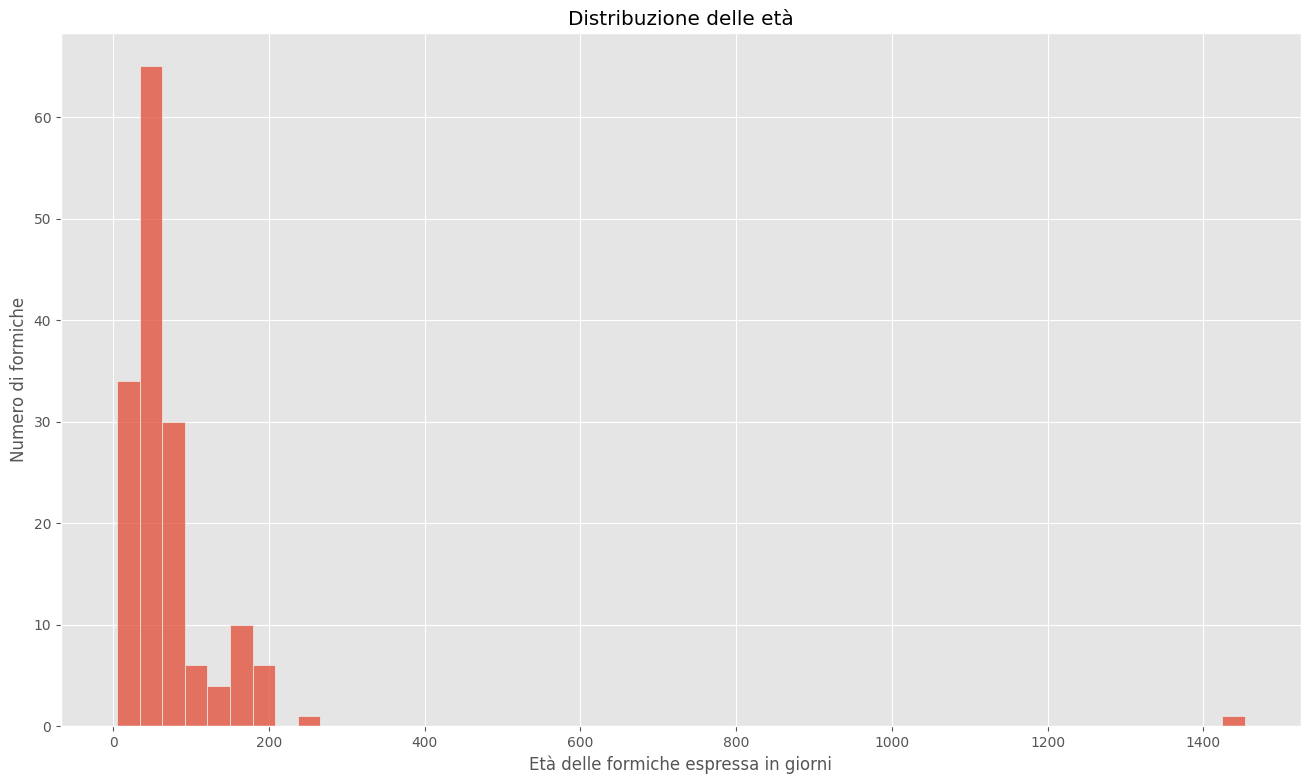

In [ ]:
plt.figure(figsize=(16, 9))
fig = sns.histplot(data = ants_data_df['age(days)'], stat='count', bins=50)
plt.title("Distribuzione delle età")
plt.xlabel("Età delle formiche espressa in giorni");
plt.ylabel("Numero di formiche")
plt.show()

Come si può notare dal grafico, si ha un solo picco a 1400 giorni che corrispondo a circa 4 anni. Inoltre, essendo longevità delle formiche usate per l'esperimento, ovvero *Camponotus fellah*, di 9 mesia - 2 anni possiamo dire che abbiamo trovato la regina.

In [ ]:
queen = ants_data_df[ants_data_df['age(days)'] == ants_data_df['age(days)'].max()]
queen

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant604                   0.0                32.272727   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant604                122.90909              754.36364                1.81818   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant604                      0.0          13.3636             Q             Q   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant604             Q             Q                 0.0     1453.0    301.204

Un ragionameto analogo può essere fatto anche considerando le dimensioni delle formiche

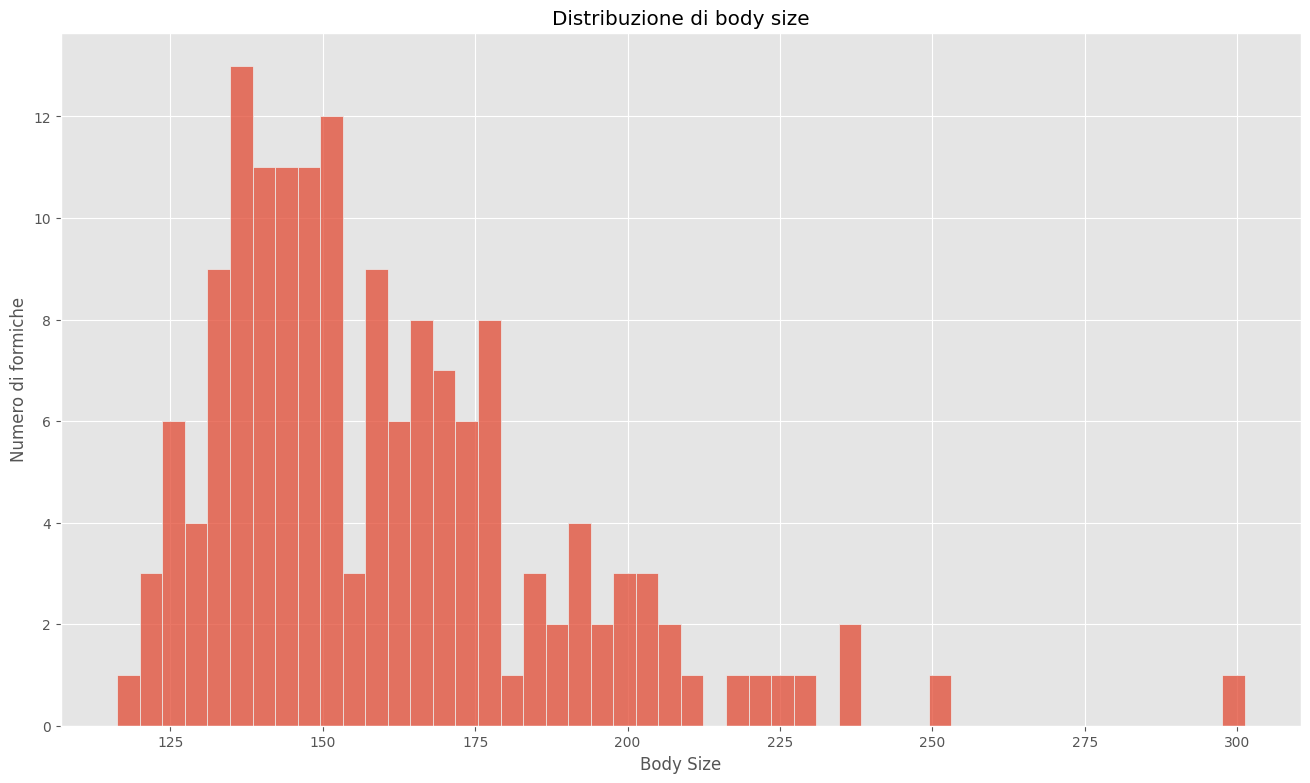

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant604                   0.0                32.272727   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant604                122.90909              754.36364                1.81818   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant604                      0.0          13.3636             Q             Q   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant604             Q             Q                 0.0     1453.0    301.204

In [ ]:
plt.figure(figsize=(16, 9))
fig = sns.histplot(data = ants_data_df['body_size'], bins=50)
plt.title("Distribuzione di body size")
plt.xlabel("Body Size");
plt.ylabel("Numero di formiche")
plt.show()

ants_data_df[ants_data_df['body_size'] == ants_data_df['body_size'].max()]

### **Analisi dei pesi degli archi**

In [ ]:
weights = Graph.es['weight']

mean_weight = np.mean(weights)
median_weight = np.median(weights)
min_weight = np.min(weights)
max_weight = np.max(weights)

print(f"Peso medio degli archi: {mean_weight}")
print(f"Peso mediano degli archi: {median_weight}")
print(f"Peso minimo degli archi: {min_weight}")
print(f"Peso massimo degli archi: {max_weight}")

output_lines = [
    f"Peso medio degli archi: {mean_weight}\n",
    f"Peso mediano degli archi: {median_weight}\n",
    f"Peso minimo degli archi: {min_weight}\n",
    f"Peso massimo degli archi: {max_weight}\n"
]

# Scrittura su file
with open(f'gg{day_idx+1} - descrizione.txt', 'w') as f:
    f.writelines(output_lines)

print("I dati sono stati salvati nel file 'output_pesi.txt'.")

Peso medio degli archi: 7.078373283059521
Peso mediano degli archi: 5.0
Peso minimo degli archi: 1.0
Peso massimo degli archi: 74.0
I dati sono stati salvati nel file 'output_pesi.txt'.


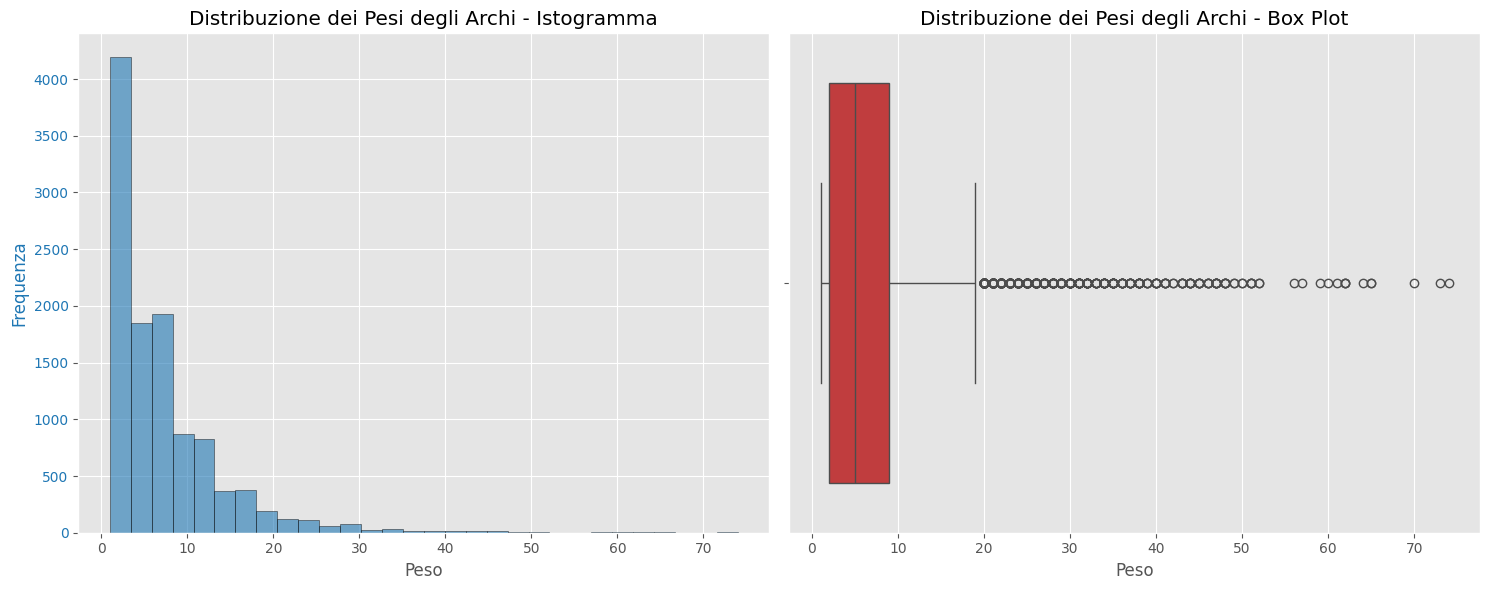

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Peso')
ax1.set_ylabel('Frequenza', color=color)
ax1.hist(weights, bins=30, edgecolor='black', color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Distribuzione dei Pesi degli Archi - Istogramma')

color = 'tab:red'
ax2.set_xlabel('Peso')
sns.boxplot(x=weights, ax=ax2, color=color)
ax2.set_title('Distribuzione dei Pesi degli Archi - Box Plot')

plt.tight_layout()


plt.savefig(f'gg{day_idx+1}-distribuzione.png', dpi=300)
plt.show()

Per ogni coppia di fomiche la maggior parte interagiscono in media 8 volte. Tuttavia ci sono delle delle formiche che interagisco fino a 157 volte.

Facciamo un'analisi delle formiche che hanno più di 50 interazioni il primo giorno:

In [ ]:
print(Graph.summary())

IGRAPH U-W- 160 11139 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_queen (v), tag_id (v), visits_to_brood (v), visits_to_nest_entrance (v), visits_to_rubbishpile (v), weight (e)


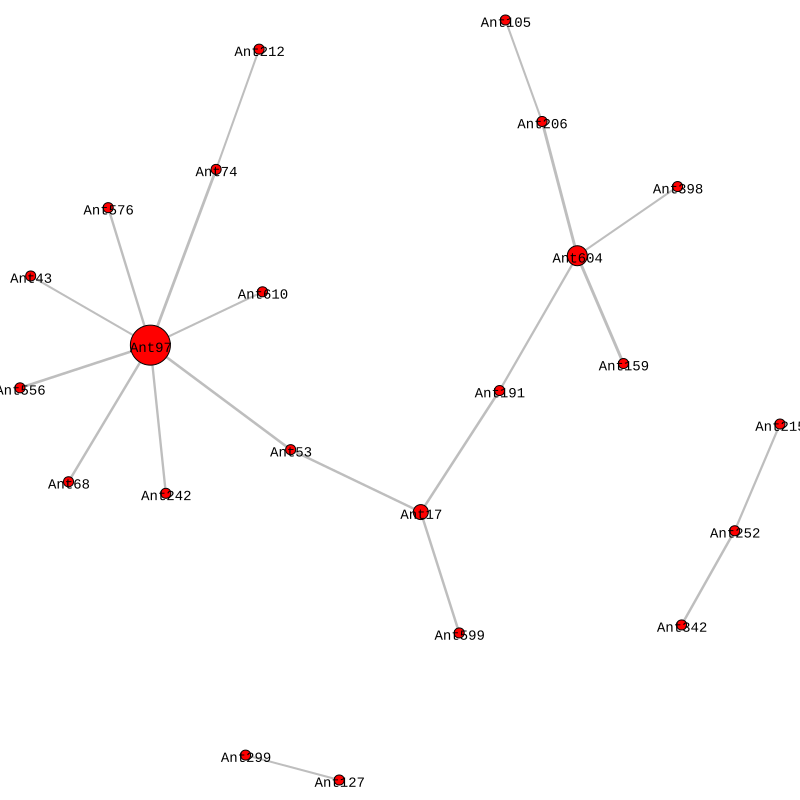

In [ ]:
# Filtra gli archi con peso superiore a 50, eliminiamo i nodi che non hanno archi
edges_to_keep = [e.index for e in Graph.es if e['weight'] > 50]

subgraph = Graph.subgraph_edges(edges_to_keep, delete_vertices=True)
subgraph.vs["label"]=subgraph.vs["id"]
degrees = subgraph.degree()

layout = subgraph.layout(layout='auto')

# Con il visual style mettiamo in luce gli archi più pesanti e i vertici con grado maggiore
visual_style= {}
visual_style["vertex_size"] = [d * 5 if d != 1 else 10 for d in degrees]
visual_style["vertex_color"] = "red"
visual_style["vertex_label"] = subgraph.vs["label"]
visual_style["edge_width"] = [element / 25 for element in subgraph.es["weight"]]
visual_style["edge_color"] = "gray"
visual_style["layout"] = layout
visual_style["bbox"] = (800, 800)
visual_style["margin"] = 20

ig.plot(subgraph, **visual_style, target=f'gg{day_idx+1}-sottografi.png')

Capiamo chi sono queste formiche che interagiscono di più tra di loro e se hanno caratteristiche in comune.

Guardiamo a che gruppo appartengono questo componenti connesse:

In [ ]:
def define_color(group):
    color_dict = {
        'F': "red",
        'C': "blue",
        'N': "green",
        'Q': "yellow",
    }
    return color_dict.get(group, "gray")

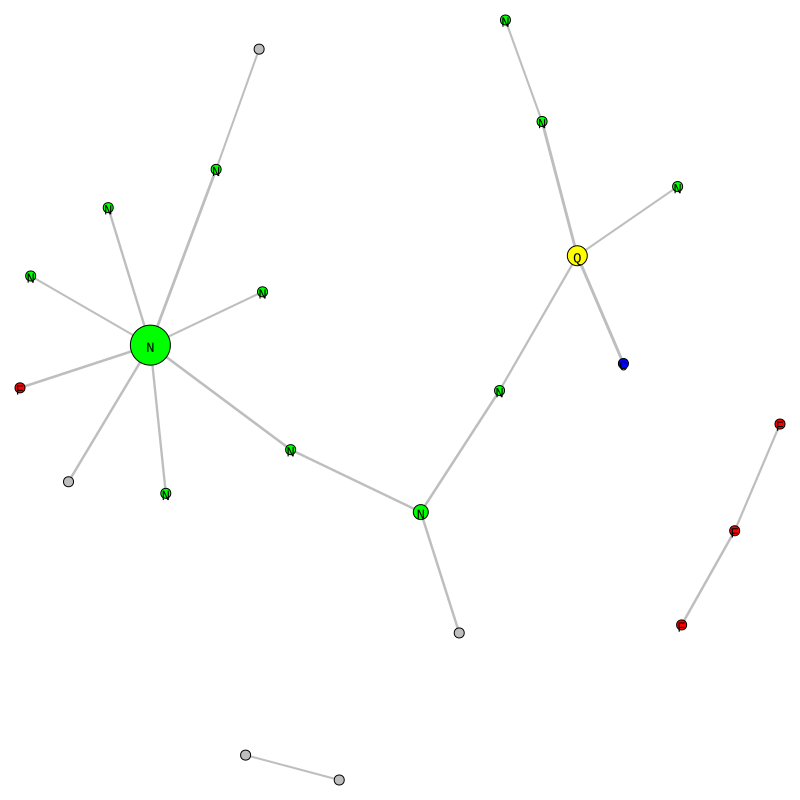

In [ ]:
periodo_analizzato = "group_period4"

vertex_colors = [define_color(group) for group in subgraph.vs[periodo_analizzato]]

subgraph.vs["label"] = subgraph.vs[periodo_analizzato]
visual_style["vertex_color"] = vertex_colors
visual_style["vertex_label"] = subgraph.vs["label"] = ["Nil" if label == '' else label for label in subgraph.vs["label"]]

ig.plot(subgraph, **visual_style, target=f'gg{day_idx+1}-sottografi gruppi.png')

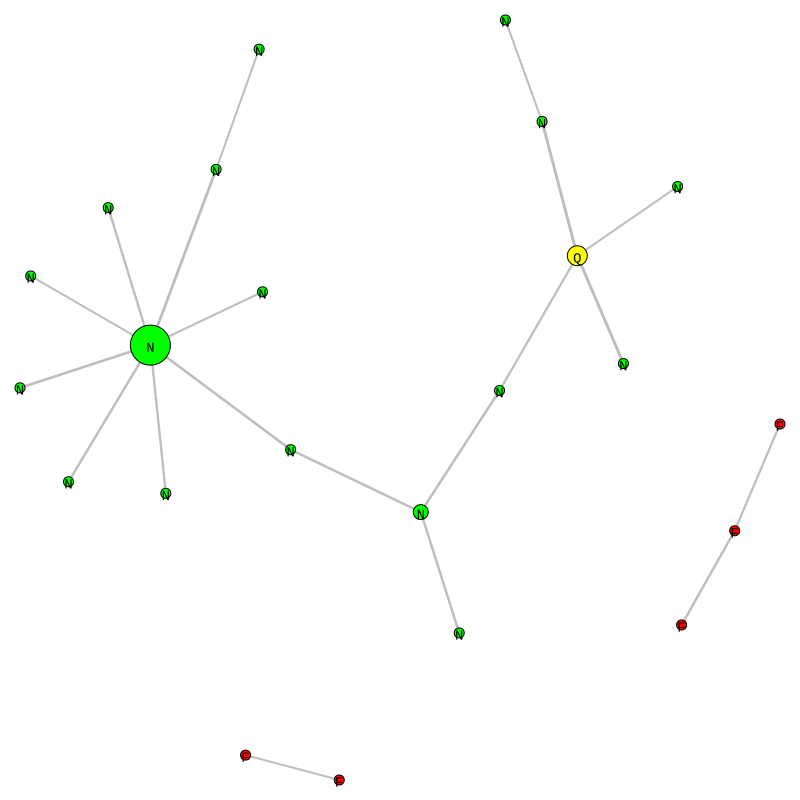

In [ ]:
vertex_colors = [define_color(group) for group in subgraph.vs["group_period1"]]

subgraph.vs["label"] = subgraph.vs["group_period1"]
visual_style["vertex_color"] = vertex_colors
visual_style["vertex_label"] = subgraph.vs["label"] = ["Nil" if label == '' else label for label in subgraph.vs["label"]]

ig.plot(subgraph, **visual_style, target=f'gg{day_idx+1}-sottografi gruppi (periodo1).png')

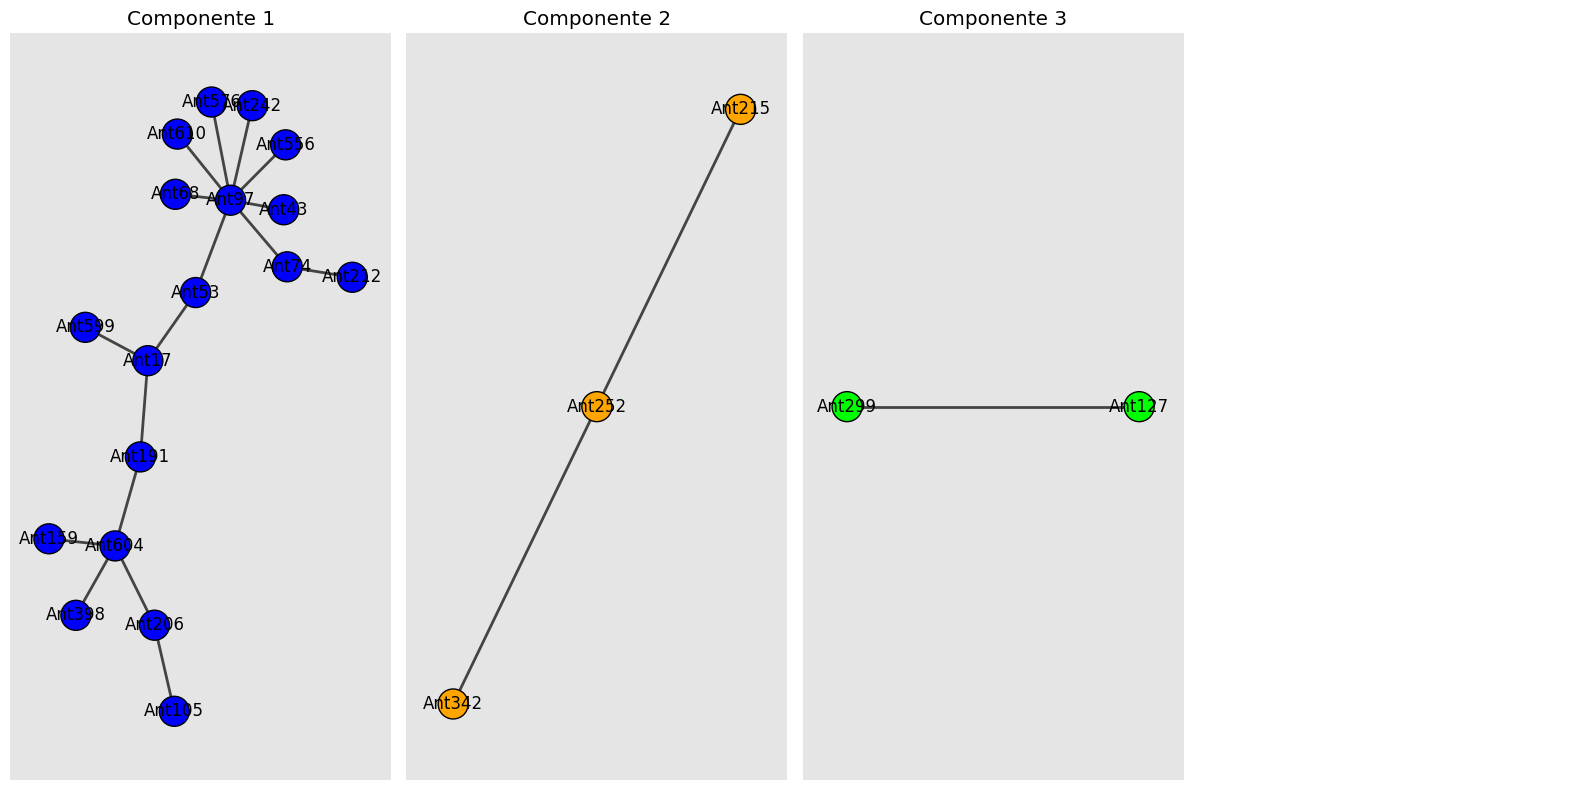

In [ ]:
components = subgraph.connected_components()
num_components = len(components)

num_plots_per_row = 4
num_rows = (len(components) - 1) // num_plots_per_row + 1

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(16, 8))


color_list = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "cyan", "magenta"]
component_colors = {i: color_list[i % len(color_list)] for i in range(num_components)}

for i, component in enumerate(components, 1):
    component_vertices = [subgraph.vs[v] for v in component]
    component_graph = ig.Graph.subgraph(subgraph, component)

    layout = component_graph.layout()
    if num_rows != 1:
      ax = axes[(i - 1) // num_plots_per_row, (i - 1) % num_plots_per_row]
    else:
      ax = axes[(i - 1) % num_plots_per_row]

    vertex_labels = [v['id'] for v in component_vertices]
    vertex_color = [component_colors.get(i - 1, "gray") for _ in component_vertices]

    ig.plot(component_graph, layout=layout, target=ax, bbox=(400, 400), vertex_label=vertex_labels, vertex_color=vertex_color, margin=20)
    ax.set_title(f"Componente {i}")

if num_components % num_plots_per_row > 0:
    for i in range(num_components % num_plots_per_row, num_plots_per_row):
      if num_rows != 1:
        axes[num_rows-1, i].axis('off')
      else:
        axes[i].axis('off')

plt.tight_layout()
plt.savefig(f'gg{day_idx+1}-componenti.png', dpi=300)
plt.show()

Confrontiamole anche in base all'età, grandezza, visits_to_nest_entrance, visits_to_brood e nb_foraging_events:

In [ ]:
alpha = 0.05

Per ogni componentente connessa creo un dizionario con age, body_size, visits_to_nest_entrance, visits_to_brood e nb_foraging_events

In [ ]:
components_ages = {}
components_size = {}
components_visits_to_rubbishpile = {}
components_visits_to_nest_entrance = {}
components_visits_to_brood = {}
components_nb_foraging_events= {}

for i, component in enumerate(components):
    ages = [subgraph.vs[v]["age(days)"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    sizes = [subgraph.vs[v]["body_size"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    visits_to_rubbishpile = [subgraph.vs[v]["visits_to_rubbishpile"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    visits_to_nest_entrance = [subgraph.vs[v]["visits_to_nest_entrance"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    visits_to_brood = [subgraph.vs[v]["visits_to_brood"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    nb_foraging_events = [subgraph.vs[v]["nb_foraging_events"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']

    components_ages[i+1] = ages
    components_size[i+1] = sizes
    components_visits_to_rubbishpile[i+1] = visits_to_rubbishpile
    components_visits_to_nest_entrance[i+1] = visits_to_nest_entrance
    components_visits_to_brood[i+1] = visits_to_brood
    components_nb_foraging_events[i+1] = nb_foraging_events


In [ ]:
components_attribute = components_ages
print("")
for i, (key, ages) in enumerate(components_attribute.items()):
    print(f"Componente {key + 1}: {ages}")


Componente 2: [40.0, 40.0, 50.0, 40.0, 14.0, 50.0, 5.0, 40.0, 5.0, 40.0, 40.0, 40.0, 40.0, 5.0, 40.0, 64.0, 64.0]
Componente 3: [64.0, 183.0, 148.0]
Componente 4: [64.0, 71.0]


In [ ]:
for key in components_attribute:
    components_attribute[key] = [attribute for attribute in components_attribute[key] if not np.isnan(attribute)]

ks_results = {}
rs_results = {}

# Confronto tra tutte le coppie di componenti
component_keys = list(components_attribute.keys())
n_components = len(component_keys)

for i in range(n_components):
    for j in range(i + 1, n_components):
        key_i = component_keys[i]
        key_j = component_keys[j]

        attribute_i = components_attribute[key_i]
        attribute_j = components_attribute[key_j]

        # Test di Kolmogorov-Smirnov
        ks_stat, ks_pvalue = ks_2samp(attribute_i, attribute_j)
        ks_results[(key_i, key_j)] = (ks_stat, ks_pvalue)

        # Test di Wilcoxon-Mann-Whitney (ranksums)
        rs_stat, rs_pvalue = ranksums(attribute_i, attribute_j)
        rs_results[(key_i, key_j)] = (rs_stat, rs_pvalue)

In [ ]:
for (key_i, key_j), (ks_stat, ks_pvalue) in ks_results.items():
    print(f"Confronto tra componente {key_i} e componente {key_j} (Kolmogorov-Smirnov Test):")
    print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
    if ks_pvalue < alpha:
        print("  -> Distribuzioni differenti.")
    else:
        print("  -> Distribuzioni NON differenti.")
    print()

for (key_i, key_j), (rs_stat, rs_pvalue) in rs_results.items():
    print(f"Confronto tra componente {key_i} e componente {key_j} (Ranksums Test):")
    print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
    if rs_pvalue < alpha:
        print("  -> Distribuzioni differenti.")
    else:
        print("  -> Distribuzioni NON differenti.")
    print()

Confronto tra componente 1 e componente 2 (Kolmogorov-Smirnov Test):
  Statistic = 0.8824, P-value = 0.0175
  -> Distribuzioni differenti.

Confronto tra componente 1 e componente 3 (Kolmogorov-Smirnov Test):
  Statistic = 0.8824, P-value = 0.0702
  -> Distribuzioni NON differenti.

Confronto tra componente 2 e componente 3 (Kolmogorov-Smirnov Test):
  Statistic = 0.6667, P-value = 0.6000
  -> Distribuzioni NON differenti.

Confronto tra componente 1 e componente 2 (Ranksums Test):
  Statistic = -2.5934, P-value = 0.0095
  -> Distribuzioni differenti.

Confronto tra componente 1 e componente 3 (Ranksums Test):
  Statistic = -2.1255, P-value = 0.0335
  -> Distribuzioni differenti.

Confronto tra componente 2 e componente 3 (Ranksums Test):
  Statistic = 0.8660, P-value = 0.3865
  -> Distribuzioni NON differenti.



In [ ]:
e = "età"
g = "grandezza"
with open(f'confronto {e}.txt', 'w') as f:
    # Itera sui risultati del test di Kolmogorov-Smirnov
    for (key_i, key_j), (ks_stat, ks_pvalue) in ks_results.items():
        f.write(f"Confronto tra componente {key_i} e componente {key_j} (Kolmogorov-Smirnov Test):\n")
        f.write(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}\n")
        if ks_pvalue < alpha:
            f.write("  -> Distribuzioni differenti.\n")
        else:
            f.write("  -> Distribuzioni NON differenti.\n")
        f.write("\n")

    # Itera sui risultati del test di Ranksums
    for (key_i, key_j), (rs_stat, rs_pvalue) in rs_results.items():
        f.write(f"Confronto tra componente {key_i} e componente {key_j} (Ranksums Test):\n")
        f.write(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}\n")
        if rs_pvalue < alpha:
            f.write("  -> Distribuzioni differenti.\n")
        else:
            f.write("  -> Distribuzioni NON differenti.\n")
        f.write("\n")

# Informazione opzionale per l'utente
print("I risultati dei test sono stati salvati in 'test_results.txt'.")

I risultati dei test sono stati salvati in 'test_results.txt'.


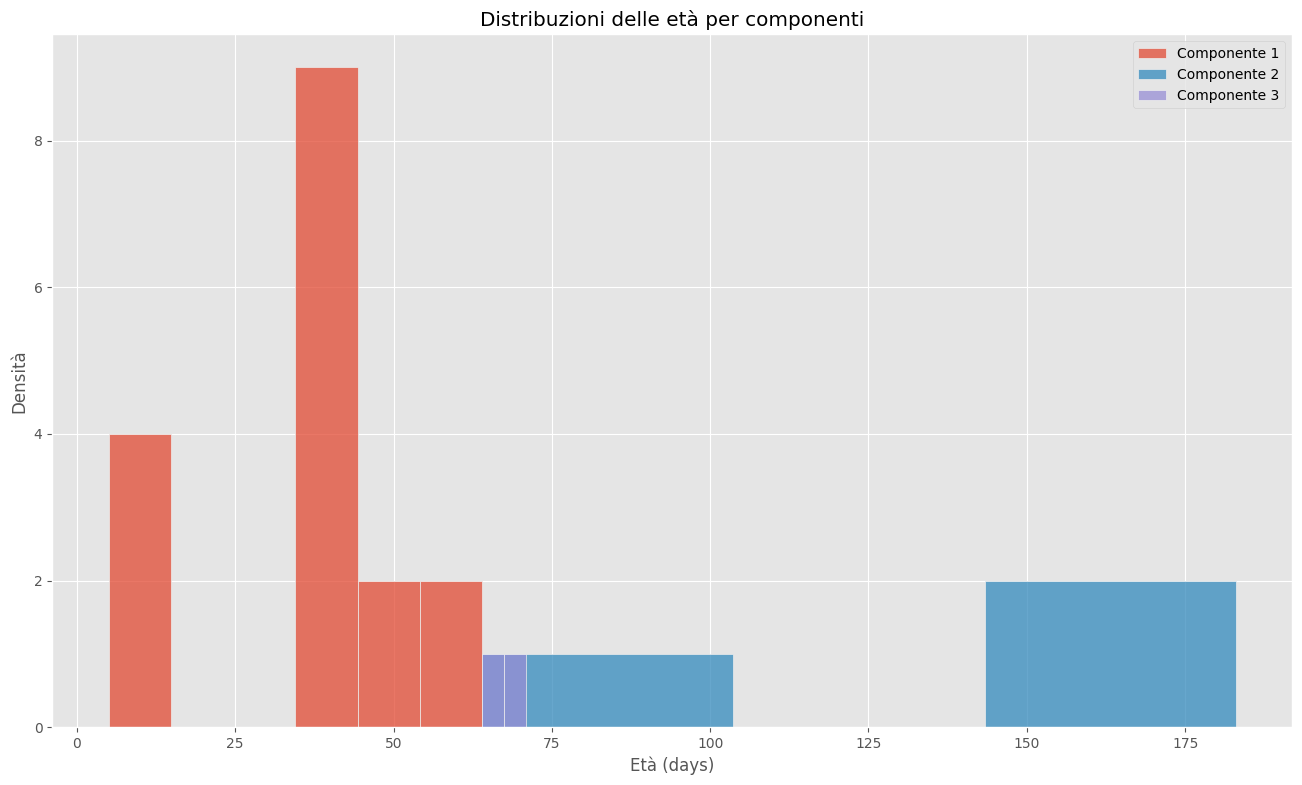

In [ ]:
plt.figure(figsize=(16,9))

for i, component in enumerate(components):
    ages = [subgraph.vs[v]["age(days)"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    sns.histplot(ages, fill=True, label=f"Componente {i + 1}")

plt.xlabel('Età (days)')
plt.ylabel('Densità')
plt.title('Distribuzioni delle età per componenti')
plt.legend()
plt.savefig(f'gg{day_idx+1}-eta.png', dpi=300)
plt.show()

In [ ]:
for i, component in enumerate(components):
    ages = [subgraph.vs[v]["age(days)"] for v in component if subgraph.vs[v][periodo_analizzato] != 'Q']
    print(f"Componente {i + 1}:  ages: {ages}")

Componente 1:  ages: [40.0, 40.0, 50.0, 40.0, 14.0, 50.0, 5.0, 40.0, 5.0, 40.0, 40.0, 40.0, 40.0, 5.0, 40.0, 64.0, 64.0]
Componente 2:  ages: [64.0, 183.0, 148.0]
Componente 3:  ages: [64.0, 71.0]


La componente 3 non viene mostrata nel grafico perchè hanno esattamente la stessa età.

Vediamo la distribuzione della body size delle componenti.

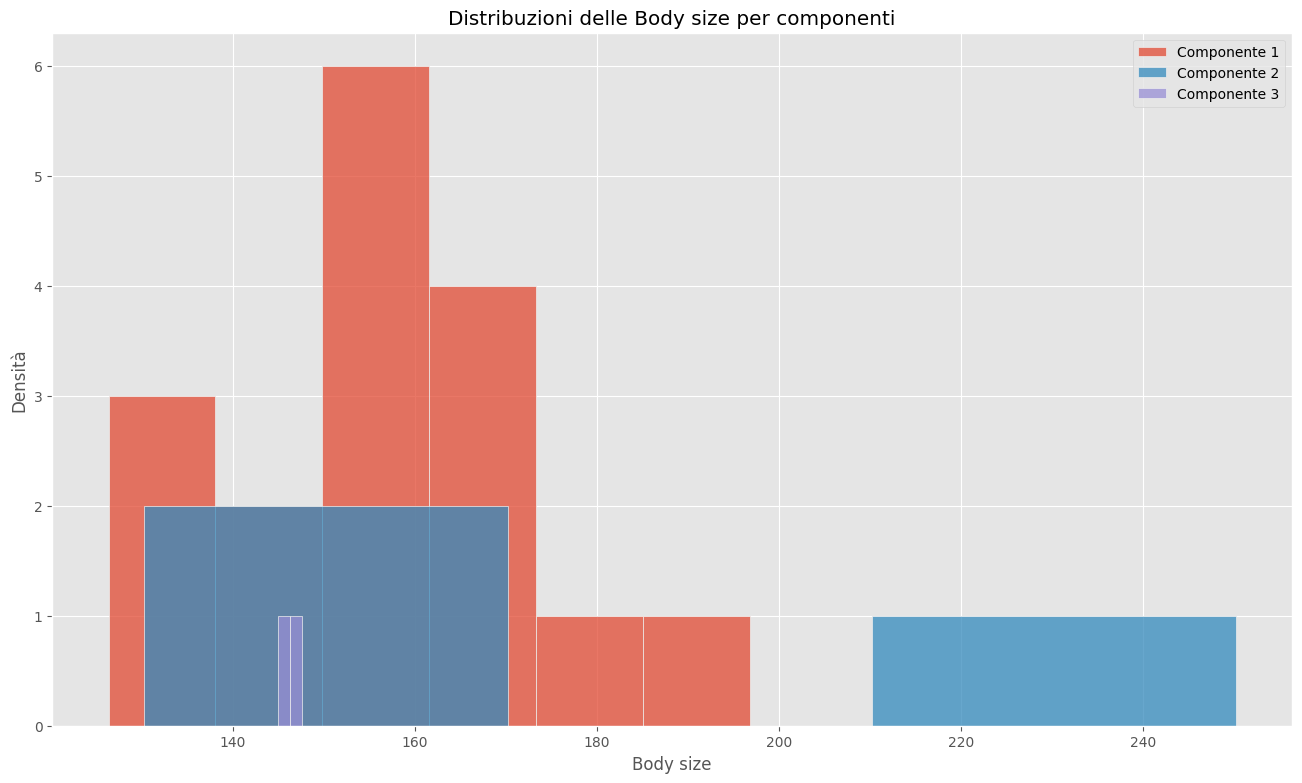

In [ ]:
plt.figure(figsize=(16, 9))
for i, component in enumerate(components):
    body_size = [subgraph.vs[v]["body_size"] for v in component if subgraph.vs[v]["group_period1"] != 'Q']
    sns.histplot(body_size, fill=True, label=f"Componente {i + 1}")

plt.xlabel('Body size')
plt.ylabel('Densità')
plt.title('Distribuzioni delle Body size per componenti')
plt.legend()
plt.savefig(f'gg{day_idx+1}-grandezza.png', dpi=300)
plt.show()

In [ ]:
for i, component in enumerate(components):
    body_size = [subgraph.vs[v]["body_size"] for v in component if subgraph.vs[v][periodo_analizzato] != 'Q']
    print(f"Componente {i + 1}:  body_size: {body_size}")

Componente 1:  body_size: [167.296, 133.6, 161.245, 151.21200000000002, 126.384, 196.84799999999998, 184.678, 151.327, 166.50799999999998, 150.376, 152.971, 146.328, 137.441, 146.031, 152.086, 171.283, 169.614]
Componente 2:  body_size: [130.3, 250.15400000000002, 158.90200000000002]
Componente 3:  body_size: [147.679, 144.941]


Sono tutti in realà molto simili quindi non so quanto abbia senso

In [ ]:
components = subgraph.connected_components()

for i, component in enumerate(components):
    print(f"Componente {i + 1}:")
    for vertex in component:
        print(f"ID: {subgraph.vs[vertex]['id']}, Age: {subgraph.vs[vertex]['age(days)']}")
    print()

Componente 1:
ID: Ant191, Age: 40.0
ID: Ant556, Age: 40.0
ID: Ant242, Age: 50.0
ID: Ant53, Age: 40.0
ID: Ant576, Age: 14.0
ID: Ant159, Age: 50.0
ID: Ant74, Age: 5.0
ID: Ant610, Age: 40.0
ID: Ant599, Age: 5.0
ID: Ant17, Age: 40.0
ID: Ant97, Age: 40.0
ID: Ant398, Age: 40.0
ID: Ant212, Age: 40.0
ID: Ant68, Age: 5.0
ID: Ant604, Age: 1453.0
ID: Ant206, Age: 40.0
ID: Ant43, Age: 64.0
ID: Ant105, Age: 64.0

Componente 2:
ID: Ant252, Age: 64.0
ID: Ant215, Age: 183.0
ID: Ant342, Age: 148.0

Componente 3:
ID: Ant127, Age: 64.0
ID: Ant299, Age: 71.0



### **Analisi centralità**

In questa sezione vogliamo identificare la formica che ha un ruolo centrale nella colonia. Per fare questo abbiamo deciso di analizzare le diverse tipologie di centralità:


*   Degree Centrality
*   Betweeness Centrality
*   Eigenvector Centrality


Infine, avendo precedentemente identificato la regina, possiamo vedere se essa può essere identificata come quella più centrale per qualche metrica.

Iniziamo con il definire una funzione che permette di assegnare dei colori diversi ai nodi più centrali e alla regina.

In [ ]:
def select_colors(queen, max_degree, data_df):
  colors = []

  for id, _ in data_df.iterrows():
    if id == queen:
      colors.append('red')
    elif id == Graph.vs()[max_degree]['id']:
      colors.append('cyan')
    else:
      colors.append('green')
  return colors

In [ ]:
layout = Graph.layout_kamada_kawai()
visual_style = {}

visual_style["vertex_size"] = 30
visual_style["vertex_label"] = Graph.vs["id"]
visual_style["edge_color"] = "grey"
visual_style["layout"] = layout

#### **Degree Centrality**

Essenodo il grafo in analisi non orientato, possiamo calcolare la centralità con la mode 'all'

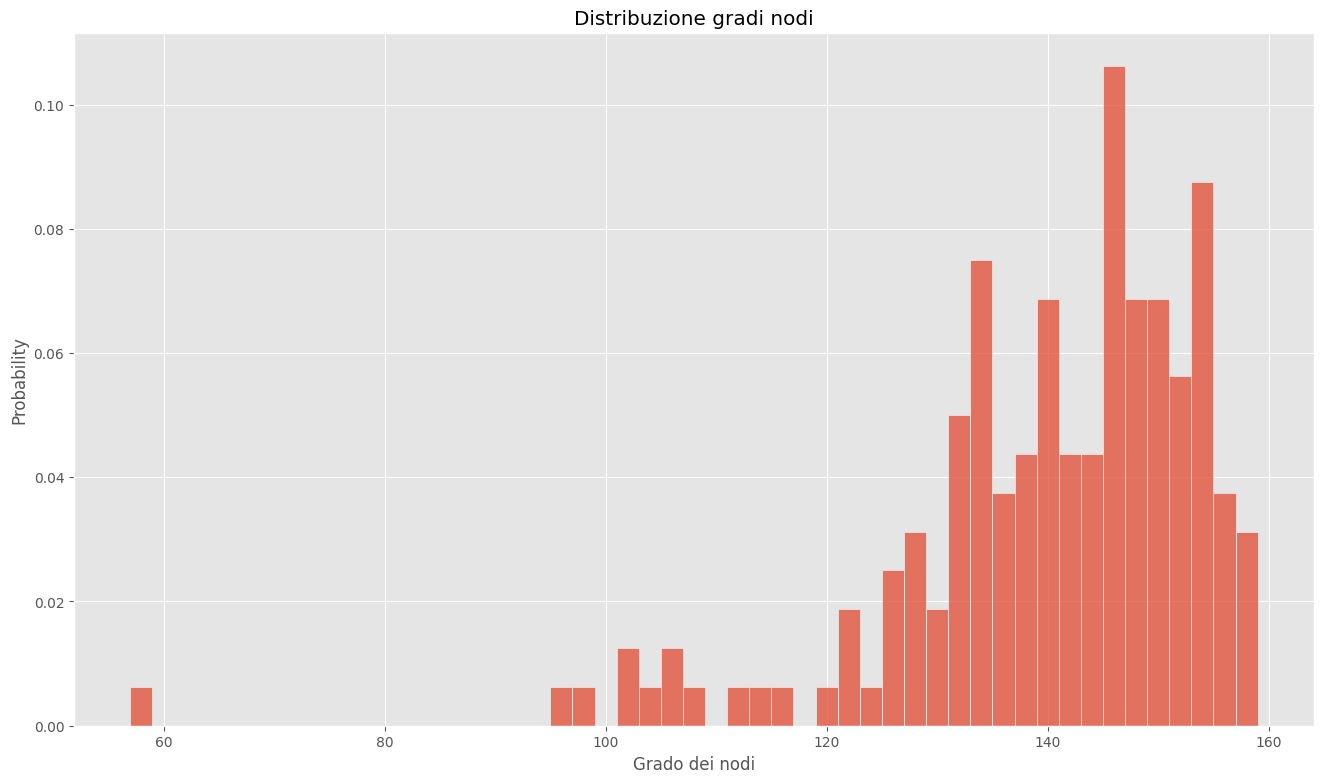

In [ ]:
nodes_degrees = Graph.degree(Graph.vs, mode="all")

plt.figure(figsize=(16, 9))
fig = sns.histplot(data = np.array(nodes_degrees), binwidth=2, stat="probability")
plt.title("Distribuzione gradi nodi")
plt.xlabel("Grado dei nodi");

In [ ]:
mean_degree = np.mean(nodes_degrees)
median_degree = np.median(nodes_degrees)
min_degree = np.min(nodes_degrees)
max_degree = np.max(nodes_degrees)

print(f"Grado medio dei vertici: {round(mean_degree, 2)}")
print(f"Grado mediano dei vertici: {median_degree}")
print(f"Grado minimo dei vertici: {min_degree}")
print(f"Grado massimo dei vertici: {max_degree}")

Grado medio dei vertici: 139.24
Grado mediano dei vertici: 142.5
Grado minimo dei vertici: 57
Grado massimo dei vertici: 159


Vogliamo ora identificare la formica più centrale della rete

In [ ]:
idx_max_degree_centrality = np.argmax(nodes_degrees)

ants_data_df[ants_data_df.index == Graph.vs()[idx_max_degree_centrality]['id']]

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant252                 3.727                505.81818   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant252                237.36364              129.90909                5.18182   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant252                  236.818          47.1818             F             F   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant252             F             F                38.0       64.0      130.3

Rappresentiamo graficamente i risultati.

Per rendere la visualizzazione più comprensibile, abbiamo deciso di mantenere solamente gli archi con un peso maggiore di 20

In [ ]:
print(Graph.summary())

IGRAPH U-W- 160 11139 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_queen (v), tag_id (v), visits_to_brood (v), visits_to_nest_entrance (v), visits_to_rubbishpile (v), weight (e)


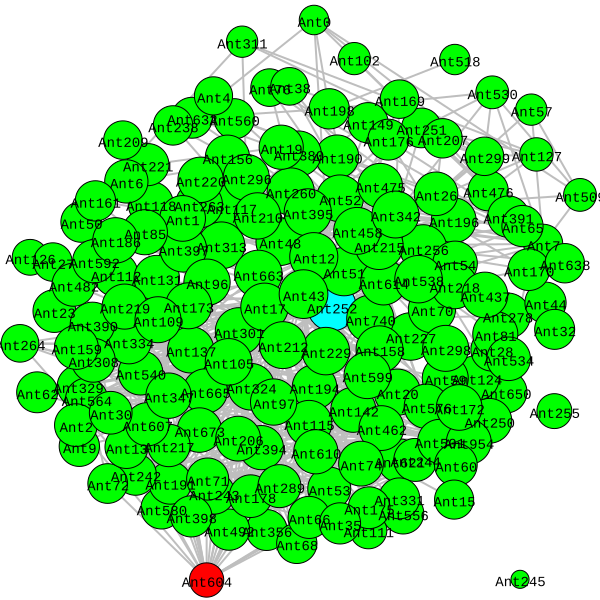

In [ ]:
visual_style["vertex_size"] = 0.3*np.array(nodes_degrees) + 1
visual_style["vertex_color"] = select_colors(queen.index, idx_max_degree_centrality, ants_data_df)
visual_style["edge_width"] = [0 if w < edge_threshold else 2 for w in Graph.es['weight']]

ig.plot(Graph, **visual_style)

Calcolo della centralizzazione

In [ ]:
sum([Graph.maxdegree() - node for node in nodes_degrees]) / ((Graph.vcount() - 1)*(Graph.vcount() - 2))

0.12586577501791257

Come si può osservare dall'istogramma della distribuzione dei nodi, non esiste un nodo con un valore nettamente superiore di tutti. Come anche osservato per le distanze, le formiche sono molto connesse tra loro.

Questo pattern evidenzia una rete distribuita sotto il profilo della centralità di grado, dove i nodi hanno un numero simile di collegamenti.

Avendo osservato questo, ci aspettiamo un grado di assortatività basso in quanto il numero di spoke è molto basso.

In [ ]:
Graph.assortativity_degree()

-0.03496468444063336

#### **Betweenness centrality**

In questa sezione, vogliamo individuare il nodo più importante da cui passano le informazioni. Dato che la rete rappresenta le interazioni tra le formiche, un nodo con betweenness alta rappresenta un punto importante per il passaggio di informazioni.

Ci aspettiamo che non sia la regina, ma magari formiche che fanno da tramite tra i gruppi.

In [ ]:
betweenness_centrality = Graph.betweenness()
print(betweenness_centrality)

[10.529346374483461, 7.360365595149634, 7.60062675231687, 11.071924207630572, 9.338046262325735, 14.426543337599197, 14.22995708082812, 5.610916161012419, 9.330744550234215, 9.6261589920335, 10.519576158501128, 11.224701863554829, 6.650064543212422, 9.871374376554598, 8.94282399327311, 4.335662452090715, 7.868136789676913, 12.56818493329807, 6.785373123537349, 8.177051203392736, 7.215195483487504, 16.29033622329679, 9.827000818473623, 7.990112057012254, 10.183527050130499, 6.148536981828025, 5.867821811041664, 12.884644847536363, 5.9678083839454175, 12.751559387378594, 9.989278547969494, 8.991522542001158, 14.311686737791119, 4.935743768985373, 12.726683080164575, 12.542936603559406, 9.39983825886992, 11.00915819003278, 5.55306932953729, 9.179735721664537, 7.608580283027081, 6.673992875532866, 6.938900082512184, 0.7186109020748912, 8.708581008319905, 16.03308473197115, 8.740239084358198, 7.743035321056093, 12.476009183039647, 10.294818130906505, 4.041406727377868, 11.703205064055531, 6

In [ ]:
mean_betweenness = np.mean(betweenness_centrality)
median_betweenness = np.median(betweenness_centrality)
min_betweenness = np.min(betweenness_centrality)
max_betweenness = np.max(betweenness_centrality)

print(f"Centralità di betweenness media: {mean_betweenness}")
print(f"Centralità di betweenness mediana: {median_betweenness}")
print(f"Centralità di betweenness minima: {min_betweenness}")
print(f"Centralità di betweenness massima: {max_betweenness}")

Centralità di betweenness media: 9.881249999999998
Centralità di betweenness mediana: 9.765883391524156
Centralità di betweenness minima: 0.7186109020748912
Centralità di betweenness massima: 16.29033622329679


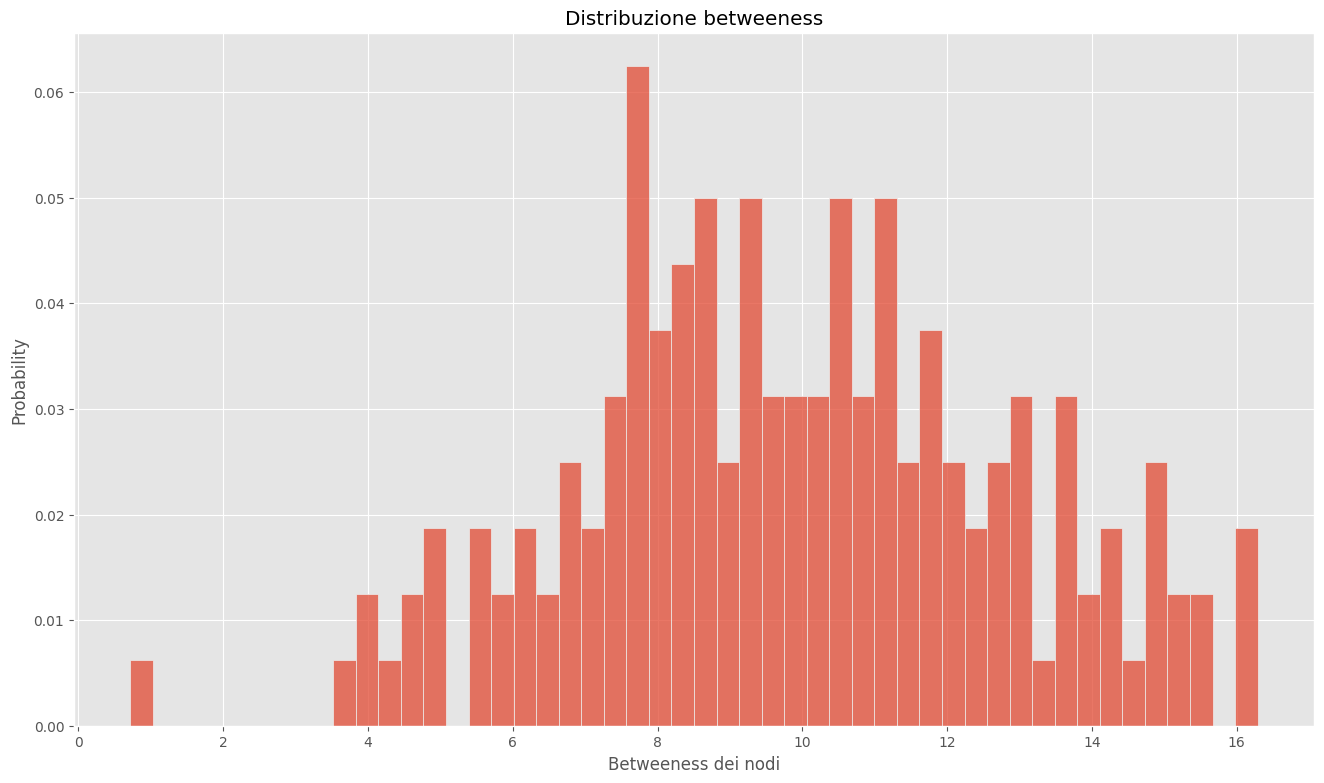

In [ ]:
plt.figure(figsize=(16, 9))
fig = sns.histplot(data = pd.Series(betweenness_centrality), bins=50, stat="probability")
plt.title("Distribuzione betweeness")
plt.xlabel("Betweeness dei nodi");

In [ ]:
index_max_betweenness_centrality = np.argmax(betweenness_centrality)
ants_data_df[ants_data_df.index == Graph.vs()[index_max_betweenness_centrality]['id']]

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant252                 3.727                505.81818   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant252                237.36364              129.90909                5.18182   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant252                  236.818          47.1818             F             F   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant252             F             F                38.0       64.0      130.3

Rappresentiamo graficamente i dati ottenuti

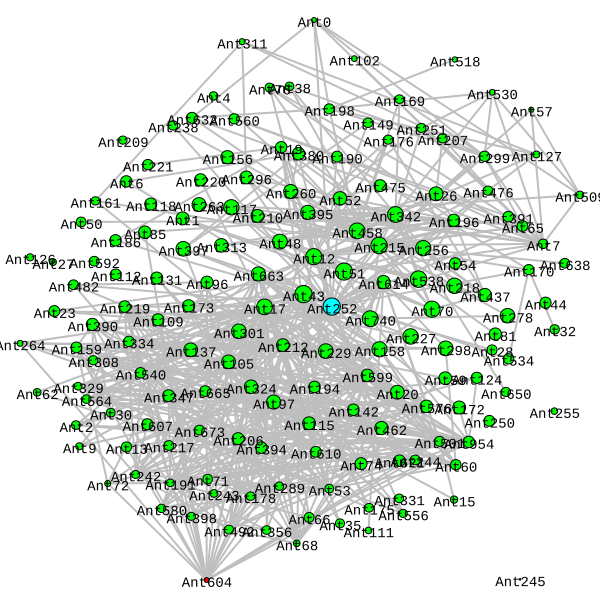

In [ ]:
visual_style["vertex_size"] = np.array(betweenness_centrality) + 1
visual_style["vertex_color"] = select_colors(queen.index, index_max_betweenness_centrality, ants_data_df)

ig.plot(Graph, **visual_style)

Analizziamo ora se quanto ipotizzato è vero, ovvero se la formica con betweeness maggiore, rispetto le altre del suo gruppo ha anche molte interazioni con le altre

In [ ]:
def count_interaction(vertex_id):
  interactions_dict = {'F':0, 'N':0, 'C':0, 'Q':0, ' ': 0, '':0}

  incident_edges = Graph.incident(vertex_id, mode='ALL')

  for edge_id in incident_edges:
      edge = Graph.es[edge_id]
      if edge.source_vertex == vertex_id:
        dest = edge.target_vertex
      else:
        dest = edge.source_vertex
      interactions_dict[Graph.vs[dest.index]['group_period1']] += edge['weight']
  return interactions_dict

In [ ]:
count_interaction(index_max_betweenness_centrality)

{'F': 2328.0, 'N': 70.0, 'C': 80.0, 'Q': 0, ' ': 0, '': 0}

In [ ]:
ant_max_betweenness_centrality = ants_data_df[ants_data_df.index == Graph.vs()[index_max_betweenness_centrality]['id']]
print(ant_max_betweenness_centrality['group_period1'].item())

F


In [ ]:
other_foragers_interaction = {'F':[], 'N':[], 'C':[], 'Q':[], ' ': [], '':[]}

for vertex in Graph.vs:
  if vertex['group_period1'] == ant_max_betweenness_centrality['group_period1'].item():
    tmp_dict = count_interaction(vertex.index)

    for key in tmp_dict.keys():
      other_foragers_interaction[key].append(tmp_dict[key])


for key in other_foragers_interaction.keys():
  other_foragers_interaction[key] = round(np.mean(other_foragers_interaction[key]), 2)

other_foragers_interaction

{'F': 668.44, 'N': 69.53, 'C': 111.63, 'Q': 0.14, ' ': 0.0, '': 8.78}

#### **Eigenvector Centrality**

In [ ]:
eigenvector_centrality = Graph.eigenvector_centrality(directed=False)
print(eigenvector_centrality)

mean_eigenvector_centrality = np.mean(eigenvector_centrality)
median_eigenvector_centrality = np.median(eigenvector_centrality)
min_eigenvector_centrality = np.min(eigenvector_centrality)
max_eigenvector_centrality = np.max(eigenvector_centrality)

print(f"Centralità di eigenvector media: {mean_eigenvector_centrality}")
print(f"Centralità di eigenvector mediana: {median_eigenvector_centrality}")
print(f"Centralità di eigenvector minima: {min_eigenvector_centrality}")
print(f"Centralità di eigenvector massima: {max_eigenvector_centrality}")

[0.9042452979793582, 0.8607283742136917, 0.8527357746105972, 0.9339870719400972, 0.9262283642838331, 0.9791976245333462, 0.966230720754098, 0.7645740531012506, 0.8711981423435027, 0.9256498566824353, 0.9216920698350709, 0.9252508225510125, 0.8958964743135724, 0.8970369157327204, 0.8296573659054449, 0.6189724223995855, 0.8591912216654933, 0.9646743523835756, 0.8754501384860597, 0.8774599473793457, 0.8602526315353614, 1.0, 0.9319304836387698, 0.8204036479502334, 0.9302883077415495, 0.7418632471828817, 0.6834536446889405, 0.8937952035899039, 0.8058495695898665, 0.9575851243972446, 0.8858808880918734, 0.8802630139786761, 0.9653884857886877, 0.7879655312717974, 0.9579923896231752, 0.9694236964335788, 0.9333938561846814, 0.9410481728103471, 0.7233553327206705, 0.8299265411530885, 0.8791098831467031, 0.8691973779195205, 0.8676600812594879, 0.3733036904371091, 0.895438077358806, 0.9939839158884362, 0.8395629899857833, 0.8983221051034683, 0.9692460343526309, 0.9233400045784713, 0.64304960780705

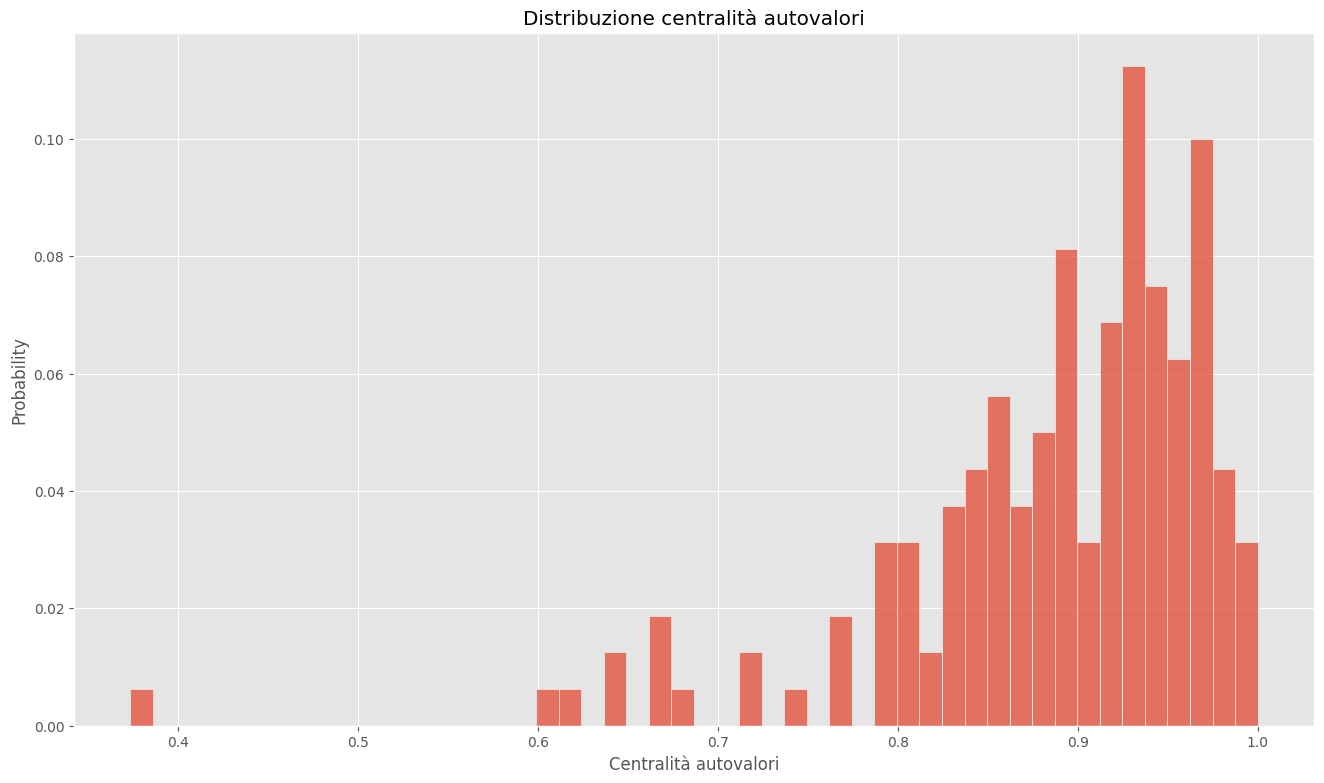

In [ ]:
plt.figure(figsize=(16, 9))
fig = sns.histplot(data = pd.Series(eigenvector_centrality), bins=50, stat="probability")
plt.title("Distribuzione centralità autovalori")
plt.xlabel("Centralità autovalori");

La formica con centralità maggiore usando gli autovettori

In [ ]:
index_max_eigen_centrality = np.argmax(eigenvector_centrality)
ants_data_df[ants_data_df.index == Graph.vs()[index_max_eigen_centrality]['id']]

nb_interaction_queen  nb_interaction_foragers  \
id                                                      
Ant252                 3.727                505.81818   

        nb_interaction_cleaners  nb_interaction_nurses  visits_to_rubbishpile  \
id                                                                              
Ant252                237.36364              129.90909                5.18182   

        visits_to_nest_entrance  visits_to_brood group_period4 group_period3  \
id                                                                             
Ant252                  236.818          47.1818             F             F   

       group_period2 group_period1  nb_foraging_events  age(days)  body_size  
id                                                                            
Ant252             F             F                38.0       64.0      130.3

Rappresentiamo a livello grafico le formiche

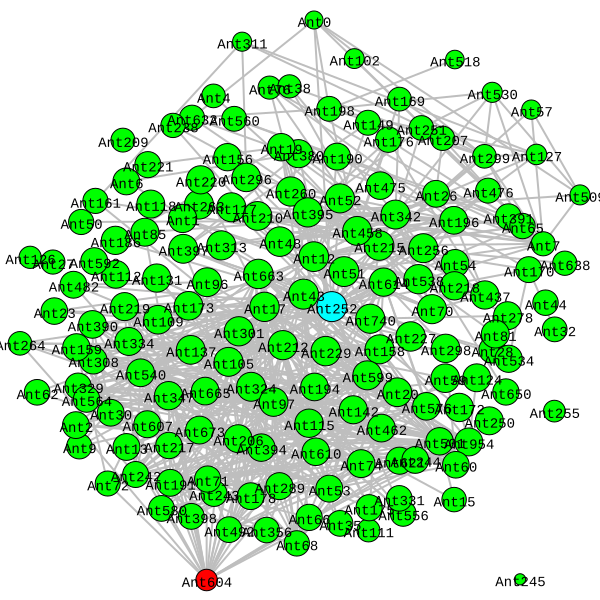

In [ ]:
visual_style["vertex_size"] = 30*np.array(eigenvector_centrality)
visual_style["vertex_color"] = select_colors(queen.index, index_max_eigen_centrality, ants_data_df)

ig.plot(Graph, **visual_style)

#### **Centralità nel tempo**

Dato che le reti che stiamo analizzando hanno anche una componente temporale, vogliamo analizzare come i valori della centralità variano nel tempo.

In [ ]:
centrality_over_time = pd.DataFrame(columns=['Queen', 'Degree', 'Betweenness', 'Eigenvector'])

for d in days:
  # Read Graph
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{d}.graphml"
  day_graph = ig.Graph.Read_GraphML(path)

  row = {}
  row['Queen'] = list(queen.index)[0]

  # Degree Centrality
  row['Degree'] = day_graph.vs()[np.argmax(day_graph.degree(day_graph.vs, mode="all"))]['id']

  # Betweenness Centrality
  row['Betweenness'] = day_graph.vs()[np.argmax(day_graph.betweenness())]['id']

  # Eigenvector Centrality
  row['Eigenvector'] = day_graph.vs()[np.argmax(day_graph.eigenvector_centrality(directed=False))]['id']

  centrality_over_time = pd.concat([centrality_over_time, pd.DataFrame([row])], ignore_index=True)

centrality_over_time.head()

Queen  Degree Betweenness Eigenvector
0  Ant604  Ant252      Ant252      Ant252
1  Ant604  Ant252       Ant17      Ant227
2  Ant604  Ant172      Ant252      Ant172
3  Ant604  Ant229      Ant229      Ant492
4  Ant604  Ant227      Ant198      Ant227

#### **Confronto metriche centralità**

In [ ]:
Graph.vs['centrality'] = Graph.degree(Graph.vs, mode="all")
selected_nodes_c = [v.index for v in Graph.vs if v['centrality'] > mean_degree]

Graph.vs['centrality'] = Graph.betweenness(Graph.vs, directed=False)
selected_nodes_b = [v.index for v in Graph.vs if v['centrality'] > mean_betweenness]

Graph.vs['centrality'] = Graph.eigenvector_centrality(directed=False)
selected_nodes_e = [v.index for v in Graph.vs if v['centrality'] > mean_eigenvector_centrality]

del Graph.vs['centrality']

print(f"Numero di nodi con grado maggiore della media: {len(selected_nodes_c)}")
print(f"Numero di nodi con betweenness centrality maggiore delle media: {len(selected_nodes_b)}")
print(f"Numero di nodi con eigenvectors centrality maggiore delle media: {len(selected_nodes_e)}")

Numero di nodi con grado maggiore della media: 92
Numero di nodi con betweenness centrality maggiore delle media: 76
Numero di nodi con eigenvectors centrality maggiore delle media: 97


In [ ]:
subgraph_centrality = Graph.subgraph(selected_nodes_c)
subgraph_centrality.vs["label"]=subgraph_centrality.vs["id"]

subgraph_betweenness = Graph.subgraph(selected_nodes_b)
subgraph_betweenness.vs["label"]=subgraph_betweenness.vs["id"]

subgraph_eigenvectors = Graph.subgraph(selected_nodes_e)
subgraph_eigenvectors.vs["label"]=subgraph_eigenvectors.vs["id"]

nodes_c_ids = set(subgraph_centrality.vs['id'])
nodes_b_ids = set(subgraph_betweenness.vs['id'])
nodes_e_ids = set(subgraph_eigenvectors.vs['id'])

common_nodes = nodes_c_ids.intersection(nodes_b_ids).intersection(nodes_e_ids)
non_common_nodes_c = nodes_c_ids - common_nodes
non_common_nodes_b = nodes_b_ids - common_nodes
non_common_nodes_e = nodes_e_ids - common_nodes

In [ ]:
print("ID dei nodi comuni:")
for node_id in common_nodes:
    print(f"ID: {node_id}")

print(f"Numero di nodi comuni tra i tre sottografi: {len(common_nodes)}")

ID dei nodi comuni:
ID: Ant576
ID: Ant118
ID: Ant229
ID: Ant301
ID: Ant137
ID: Ant298
ID: Ant296
ID: Ant218
ID: Ant458
ID: Ant124
ID: Ant954
ID: Ant538
ID: Ant173
ID: Ant324
ID: Ant263
ID: Ant210
ID: Ant12
ID: Ant131
ID: Ant74
ID: Ant115
ID: Ant614
ID: Ant256
ID: Ant26
ID: Ant186
ID: Ant105
ID: Ant117
ID: Ant142
ID: Ant380
ID: Ant206
ID: Ant252
ID: Ant51
ID: Ant278
ID: Ant475
ID: Ant663
ID: Ant19
ID: Ant96
ID: Ant194
ID: Ant599
ID: Ant48
ID: Ant52
ID: Ant219
ID: Ant212
ID: Ant70
ID: Ant215
ID: Ant347
ID: Ant156
ID: Ant85
ID: Ant17
ID: Ant1
ID: Ant59
ID: Ant97
ID: Ant740
ID: Ant81
ID: Ant6
ID: Ant342
ID: Ant172
ID: Ant54
ID: Ant621
ID: Ant390
ID: Ant260
ID: Ant395
ID: Ant607
ID: Ant462
ID: Ant397
ID: Ant394
ID: Ant43
ID: Ant196
ID: Ant20
ID: Ant158
ID: Ant220
ID: Ant109
ID: Ant437
ID: Ant227
ID: Ant313
Numero di nodi comuni tra i tre sottografi: 74


In [ ]:
def filter_common_nodes(subgraph, common_nodes):
    common_vertex_indices = [v.index for v in subgraph.vs if v['id'] in common_nodes]
    return subgraph.subgraph(common_vertex_indices)

In [ ]:
common_graph_c = filter_common_nodes(subgraph_centrality, common_nodes)
common_graph_b = filter_common_nodes(subgraph_betweenness, common_nodes)
common_graph_e = filter_common_nodes(subgraph_eigenvectors, common_nodes)

combined_common_graph = common_graph_c + common_graph_b + common_graph_e
combined_common_graph.simplify(combine_edges='first')

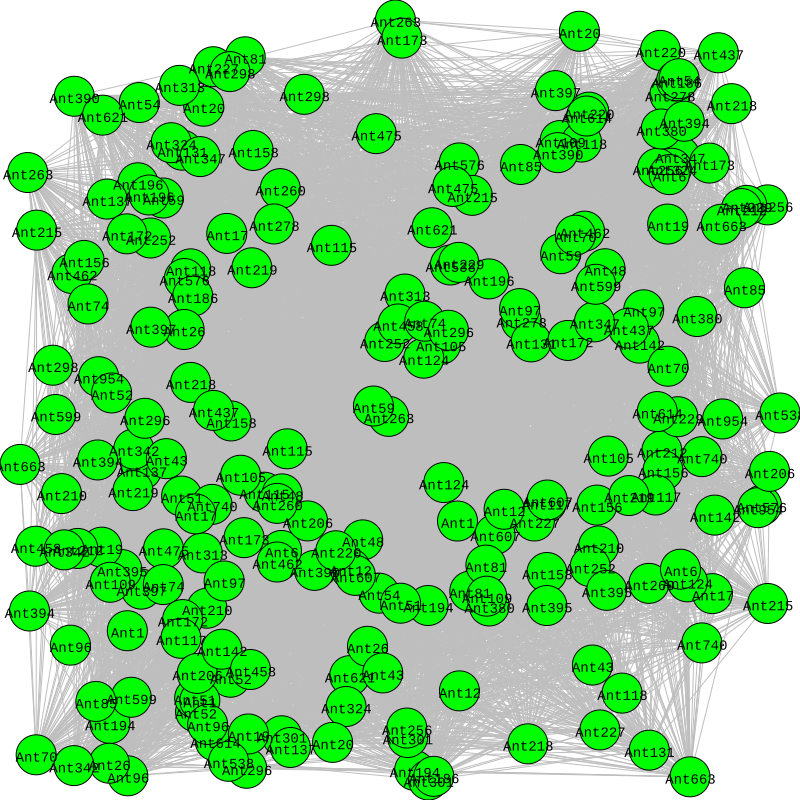

In [ ]:
layout = combined_common_graph.layout("random")
visual_style = {
    "vertex_size": 40,
    "vertex_color": "green",
    "vertex_label": combined_common_graph.vs["id"],
    "edge_color": "gray",
    "layout": layout,
    "bbox": (800, 800),
    "margin": 20
}

ig.plot(combined_common_graph, **visual_style)

In [ ]:
print("ID dei nodi NON comuni:")
print("Nodi NON comuni per il sottografo della centralità (degree based):")
for node_id in non_common_nodes_c:
    print(f"Nodo ID NON comune: {node_id}")
print("\n")
print("Nodi NON comuni per il sottografo della Betweenness Centrality:")
for node_id in non_common_nodes_b:
    print(f"Nodo ID NON comune: {node_id}")
print("\n")
print("Nodi NON comuni per il sottografo della Eigenvector Centrality:")
for node_id in non_common_nodes_e:
    print(f"Nodo ID NON comune: {node_id}")

ID dei nodi NON comuni:
Nodi NON comuni per il sottografo della centralità (degree based):
Nodo ID NON comune: Ant592
Nodo ID NON comune: Ant501
Nodo ID NON comune: Ant112
Nodo ID NON comune: Ant540
Nodo ID NON comune: Ant610
Nodo ID NON comune: Ant190
Nodo ID NON comune: Ant334
Nodo ID NON comune: Ant665
Nodo ID NON comune: Ant534
Nodo ID NON comune: Ant673
Nodo ID NON comune: Ant250
Nodo ID NON comune: Ant159
Nodo ID NON comune: Ant289
Nodo ID NON comune: Ant244
Nodo ID NON comune: Ant482
Nodo ID NON comune: Ant53
Nodo ID NON comune: Ant13
Nodo ID NON comune: Ant308


Nodi NON comuni per il sottografo della Betweenness Centrality:
Nodo ID NON comune: Ant23
Nodo ID NON comune: Ant44


Nodi NON comuni per il sottografo della Eigenvector Centrality:
Nodo ID NON comune: Ant112
Nodo ID NON comune: Ant534
Nodo ID NON comune: Ant159
Nodo ID NON comune: Ant2
Nodo ID NON comune: Ant482
Nodo ID NON comune: Ant501
Nodo ID NON comune: Ant289
Nodo ID NON comune: Ant30
Nodo ID NON comune: Ant665
N

### **Shortest Path**

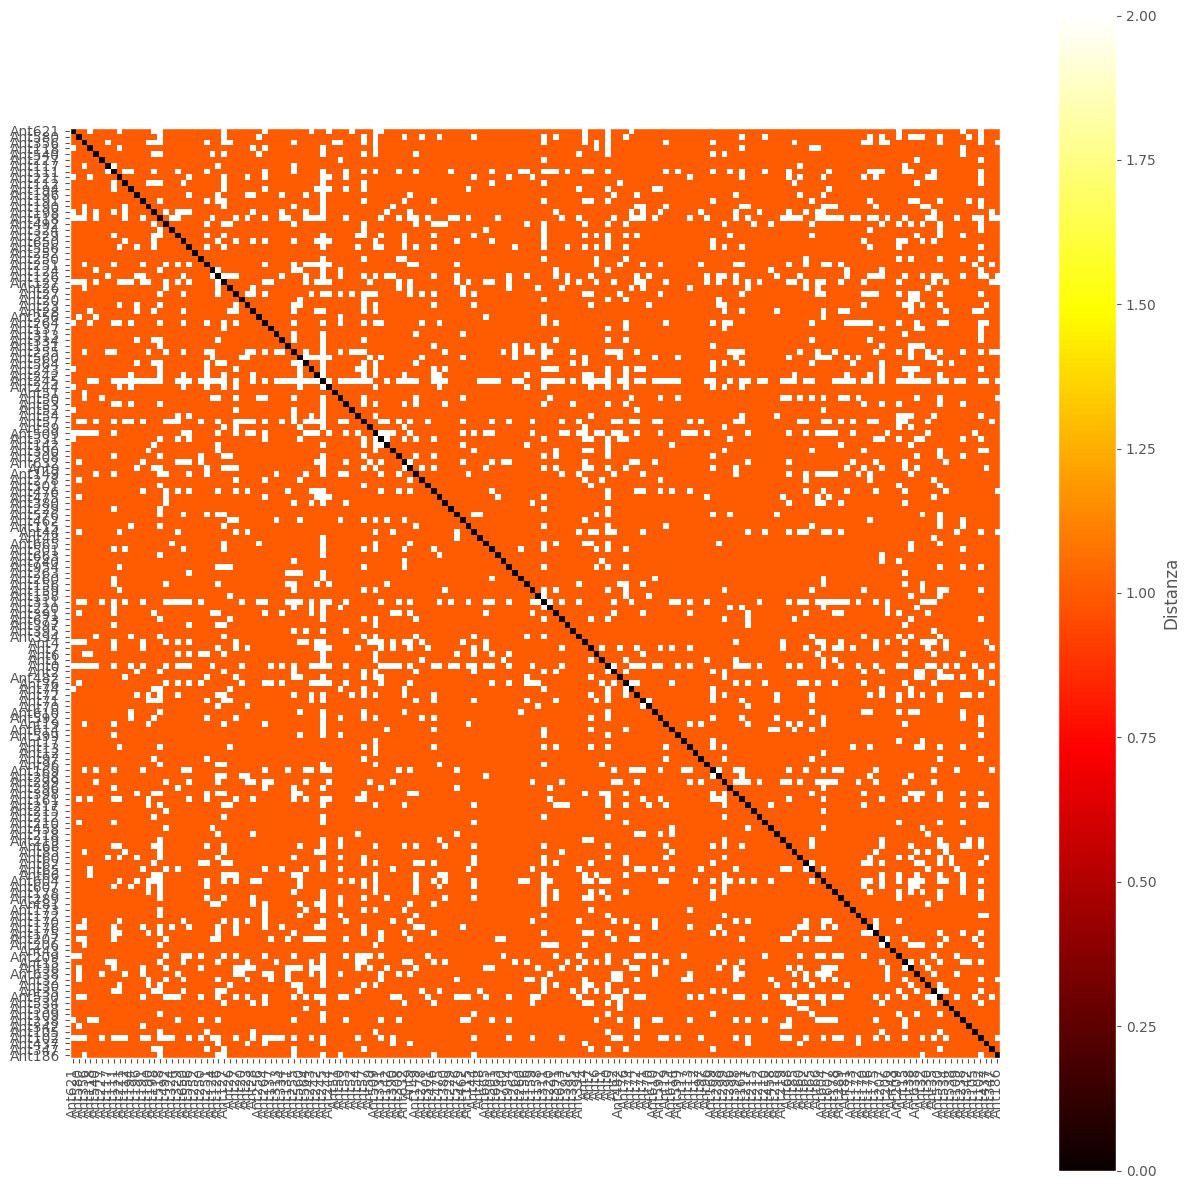

In [ ]:
distances = np.array(Graph.distances())

plt.figure(figsize=(15,15))
heatmap_adjacency = plt.imshow(distances, cmap='hot')
labels_converted = np.array(Graph.vs()['id'])
plt.xticks(ticks = np.arange(Graph.vcount()), labels = labels_converted, rotation = 90)
plt.yticks(ticks = np.arange(Graph.vcount()), labels = labels_converted)
cbar = plt.colorbar(heatmap_adjacency)
cbar.set_label('Distanza')
plt.grid(False)
plt.show()

Il diametro è la distanza più breve tra i due nodi più distanti nella rete.

In [ ]:
Graph.diameter()

2

Un diametro di rete molto basso suggerisce che la rete ha una dimensione complessivamente ridotta. Tuttavia, nonostante le dimensioni contenute, i nodi, rappresentati dalle formiche, sono fortemente interconnessi. Questo implica che l'informazione si propaga attraverso la rete con estrema rapidità, contribuendo a una comunicazione efficiente e veloce tra i nodi.

### **Analisi statistica tra i vari gruppi**

In [ ]:
alpha = 0.05

In [ ]:
list_periods = ['group_period1', 'group_period2', 'group_period3', 'group_period4']
ants_period_groups = ants_data_df[list_periods]
ants_period_groups.head()

group_period1 group_period2 group_period3 group_period4
id                                                            
Ant621             F             F             F             F
Ant580             N             N             N             N
Ant356             N                                          
Ant118             C             C                            
Ant540             N             N             N             N

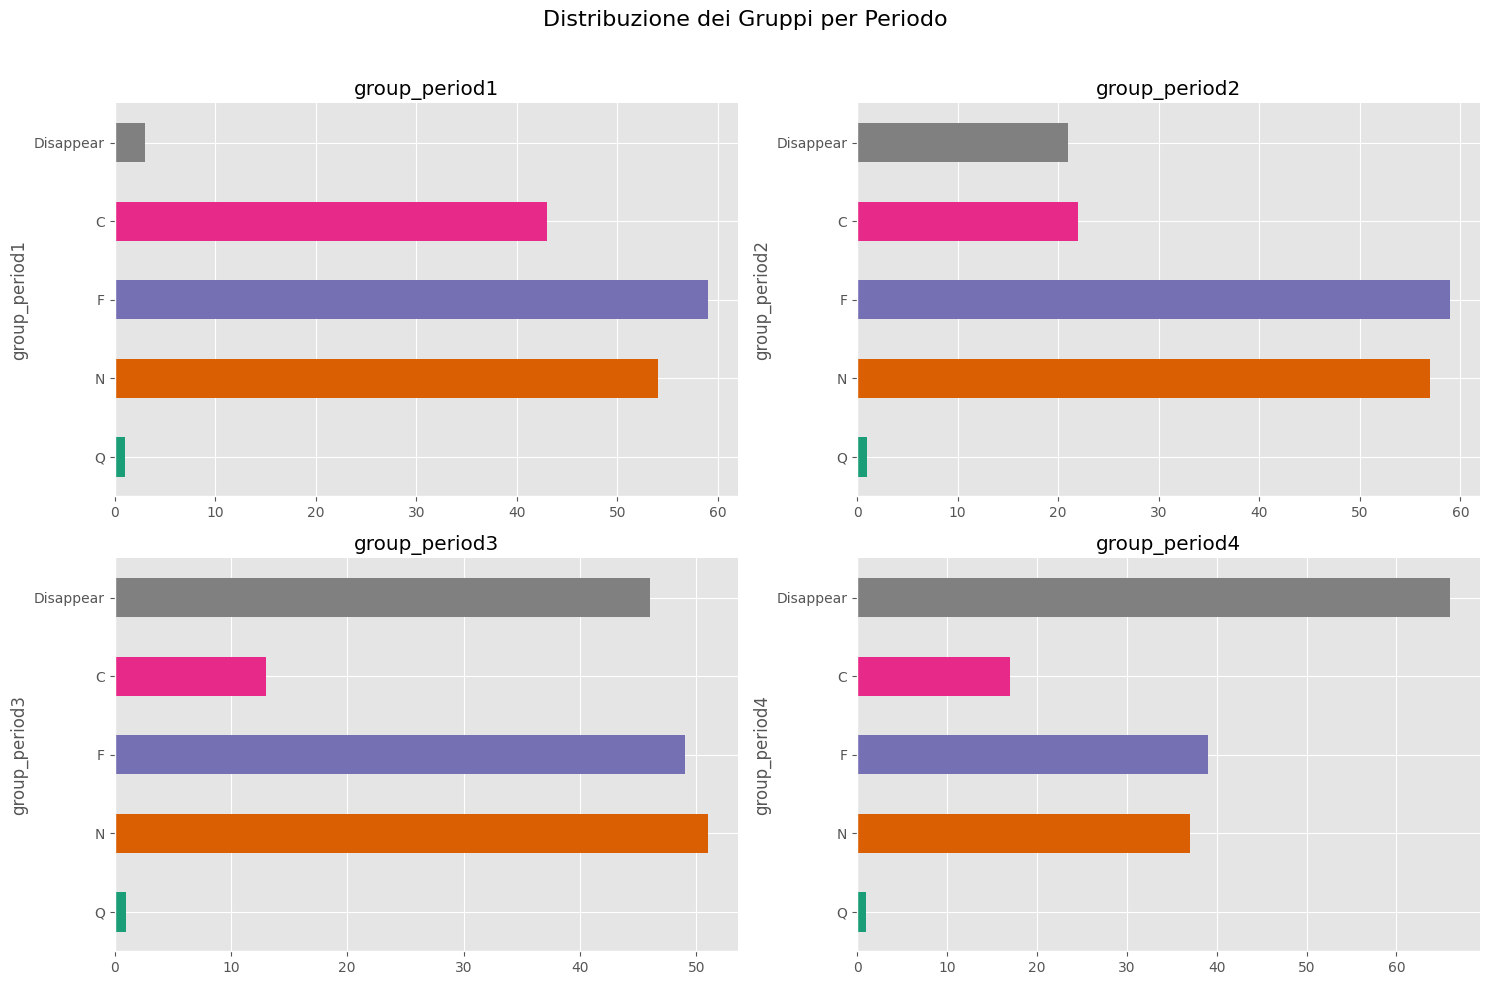

In [ ]:
group_plot = ants_period_groups.replace('', 'Disappear')

categories = ['Q', 'N', 'F', 'C', 'Disappear']

for period in ['group_period1', 'group_period2', 'group_period3', 'group_period4']:
  group_plot[period] = pd.Categorical(group_plot[period], categories=categories, ordered=True)

group_plot = group_plot.fillna('Disappear')

palette = sns.color_palette('Dark2')
color_map = {'Q': palette[0], 'N': palette[1], 'F': palette[2], 'C': palette[3], 'Disappear':'gray'}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

periods = ['group_period1', 'group_period2', 'group_period3', 'group_period4']
ax_list = axes.flatten()

for period, ax in zip(periods, ax_list):
    counts = group_plot.groupby(period).size().reindex(categories, fill_value=0)
    colors = [color_map[group] for group in counts.index]
    counts.plot(kind='barh', color=colors, ax=ax)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_title(period)

fig.suptitle('Distribuzione dei Gruppi per Periodo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
period = 'group_period1'
nodes_C = [v.index for v in Graph.vs if v[period] == 'C']
nodes_F = [v.index for v in Graph.vs if v[period] == 'F']
nodes_N = [v.index for v in Graph.vs if v[period] == 'N']

cleaners = Graph.subgraph(nodes_C)
foragers = Graph.subgraph(nodes_F)
nurses = Graph.subgraph(nodes_N)

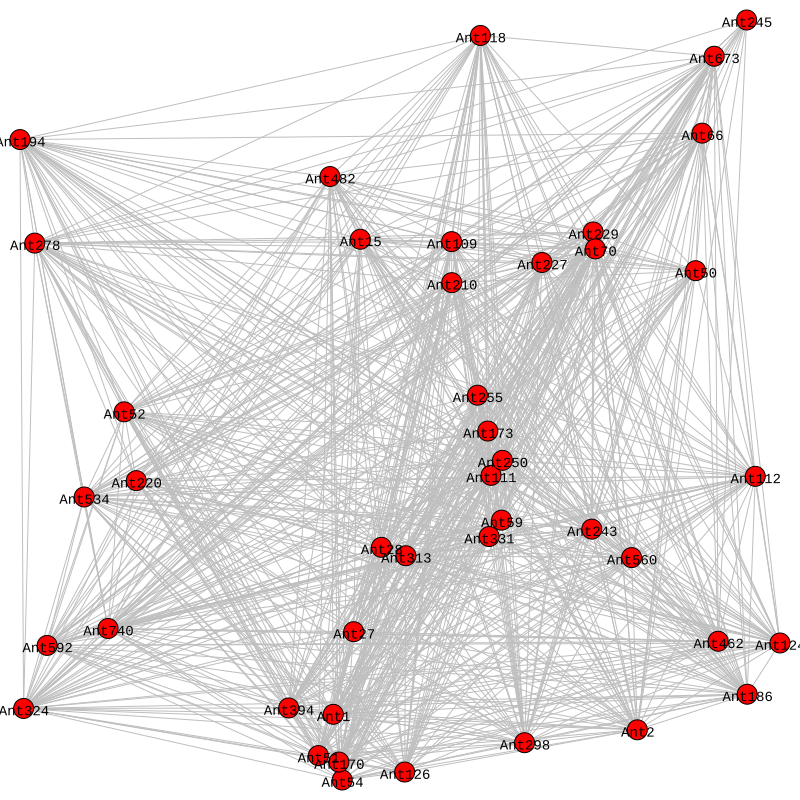

In [ ]:
layout = cleaners.layout("random")

visual_style = {
    "vertex_color": "red",
    "vertex_label": cleaners.vs["id"],
    "edge_color": "gray",
    "layout": layout,
    "bbox": (800, 800),
    "margin": 20
}

ig.plot(cleaners,
        **visual_style
)

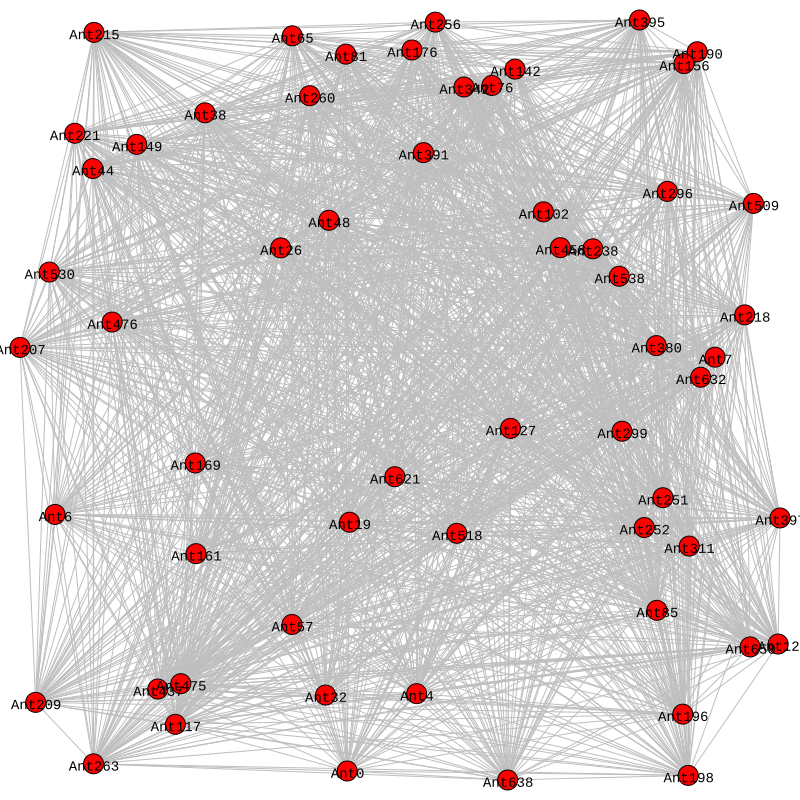

In [ ]:
layout = foragers.layout("random")

visual_style = {
    "vertex_color": "red",
    "vertex_label": foragers.vs["id"],
    "edge_color": "gray",
    "layout": layout,
    "bbox": (800, 800),
    "margin": 20
}

ig.plot(foragers,
        **visual_style
)

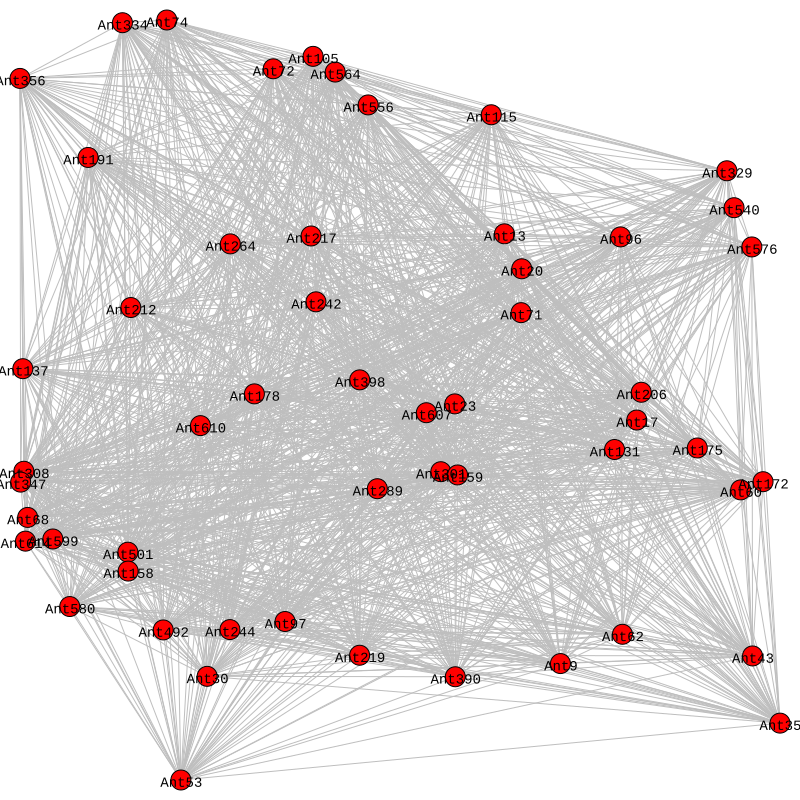

In [ ]:
layout = nurses.layout("random")

visual_style = {
    "vertex_color": "red",
    "vertex_label": nurses.vs["id"],
    "edge_color": "gray",
    "layout": layout,
    "bbox": (800, 800),
    "margin": 20
}

ig.plot(nurses,
        **visual_style
)

#### **Distribuzioni di Età**

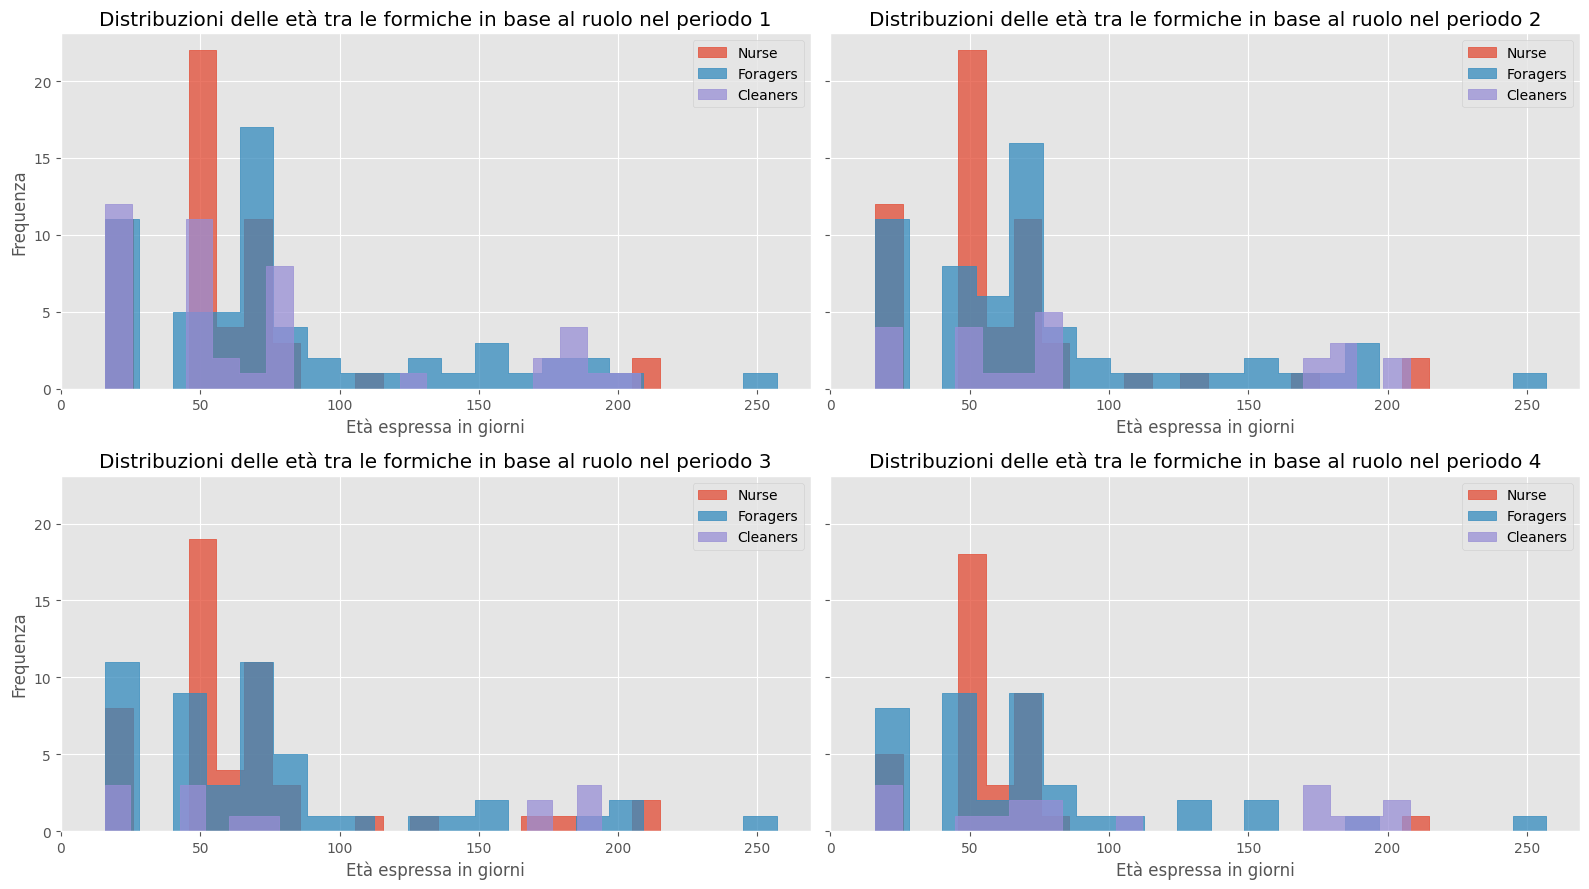

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
  ax = axes[(i-1) // 2, (i-1) % 2]
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['age(days)'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Nurses')
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['age(days)'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Foragers')
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['age(days)'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Cleaners')

  ax.set_xlabel('Età espressa in giorni')
  ax.set_ylabel('Frequenza')
  ax.set_title('Distribuzioni delle età tra le formiche in base al ruolo nel periodo ' + str(i))
  ax.set_xlim(left=0)
  ax.legend()

plt.tight_layout()
plt.show();

In [ ]:
ages_c = [cleaners.vs["age(days)"][i] for i in range(cleaners.vcount())]

ages_f = [foragers.vs["age(days)"][i] for i in range(foragers.vcount())]

ages_n = [nurses.vs["age(days)"][i] for i in range(nurses.vcount())]

print("Età dei cleaners:", ages_c)
print("Età dei foragers:", ages_f)
print("Età dei nurses:", ages_n)

Età dei cleaners: [169.0, 162.0, 50.0, 5.0, 71.0, 40.0, 5.0, 64.0, 40.0, 14.0, 14.0, 169.0, 64.0, 5.0, 5.0, 40.0, 183.0, 40.0, 5.0, 71.0, 71.0, 120.0, 197.0, 162.0, 40.0, 176.0, 14.0, 40.0, 169.0, 64.0, 40.0, 40.0, 64.0, 14.0, 5.0, 40.0, 40.0, 40.0, 5.0, 5.0, 57.0, 64.0, 50.0]
Età dei foragers: [64.0, 64.0, 50.0, 5.0, 190.0, 113.0, 64.0, 64.0, 64.0, 40.0, 64.0, 5.0, 139.0, 78.0, 5.0, 120.0, 162.0, 50.0, 246.0, 78.0, 71.0, 40.0, 64.0, 64.0, 99.0, 71.0, 5.0, 57.0, 162.0, 71.0, 40.0, 14.0, 120.0, 5.0, 50.0, 40.0, 176.0, 155.0, 71.0, 134.0, 64.0, 183.0, 5.0, 57.0, 5.0, 50.0, 40.0, 57.0, 5.0, 14.0, 50.0, 64.0, 57.0, 141.0, 57.0, 57.0, 148.0, 5.0, 64.0]
Età dei nurses: [14.0, 5.0, 40.0, 40.0, 5.0, 57.0, 40.0, 71.0, 204.0, 14.0, 50.0, 57.0, 40.0, 57.0, 50.0, 40.0, 40.0, 57.0, 71.0, 40.0, 99.0, 14.0, 40.0, 14.0, 50.0, 40.0, 5.0, 40.0, 57.0, 40.0, 40.0, 5.0, 40.0, 40.0, 40.0, 57.0, 40.0, 14.0, 40.0, 40.0, 5.0, 14.0, 57.0, 71.0, 57.0, 40.0, 197.0, 40.0, 40.0, 64.0, 50.0, 57.0, 64.0, 40.0]


In [ ]:
ages = {"Cleaners": ages_c, "Foragers": ages_f, "Nurses": ages_n}

In [ ]:
keys = list(ages.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        ages_i = ages[key_i]
        ages_j = ages[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(ages_i, ages_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(ages_i, ages_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.2637, P-value = 0.0498
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = -1.4265, P-value = 0.1537
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.2472, P-value = 0.0883
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = 0.7008, P-value = 0.4834
  -> Distribuzioni NON differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.3942, P-value = 0.0002
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = 3.3223, P-value = 0.0009
  -> Distribuzioni differenti.



#### **Distribuzione Body Size**

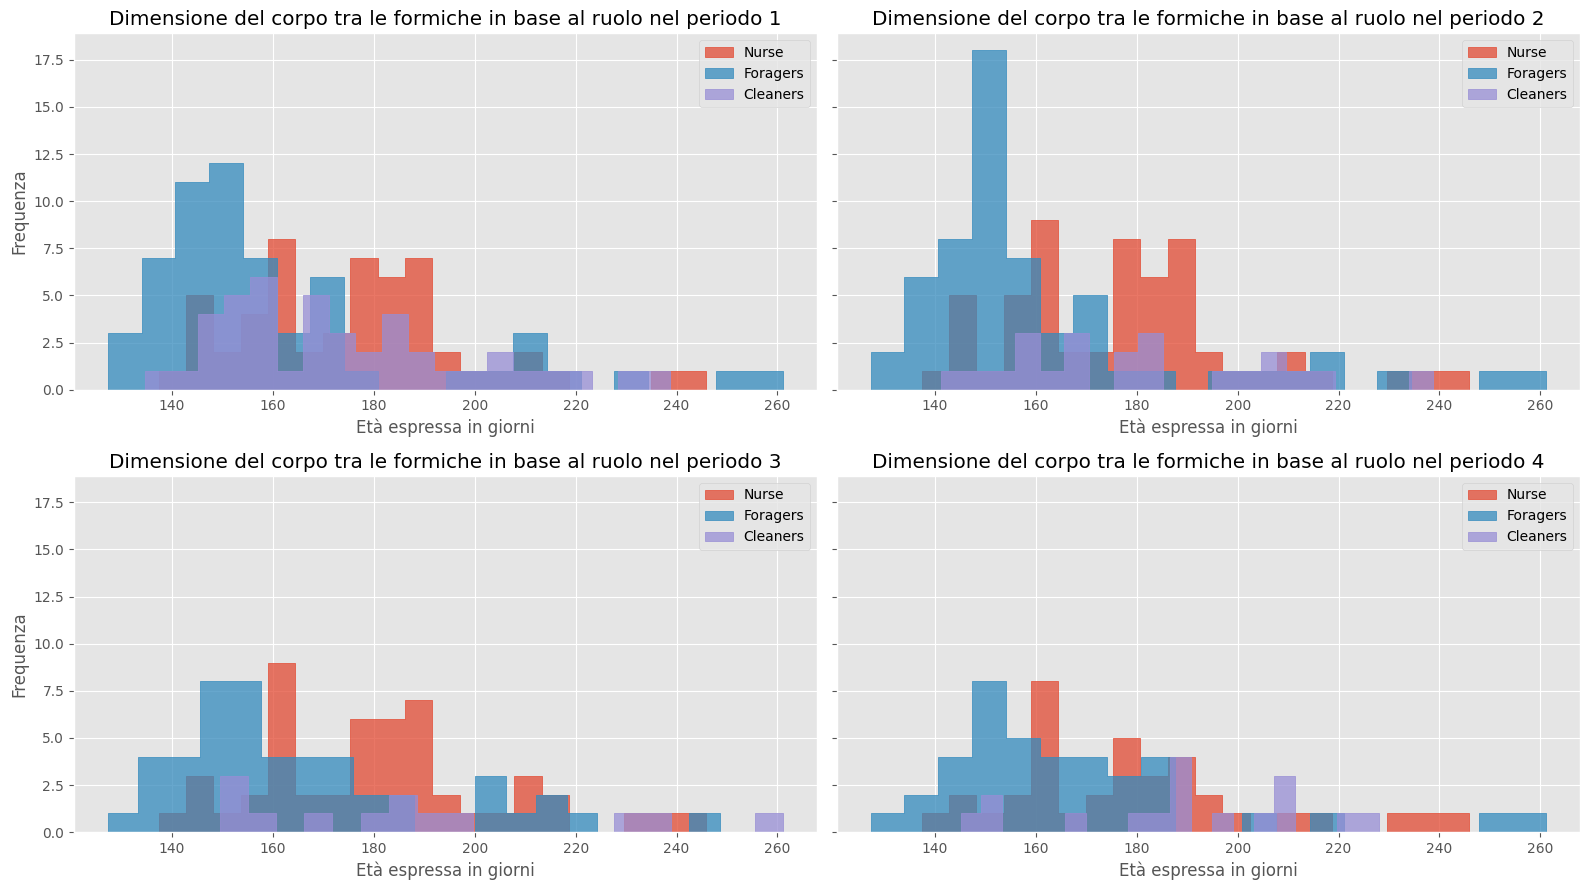

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
    ax = axes[(i-1) // 2, (i-1) % 2]
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['body_size'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Nurses')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['body_size'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Foragers')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['body_size'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Cleaners')

    ax.set_xlabel('Grandezza')
    ax.set_ylabel('Frequenza')
    ax.set_title('Dimensione del corpo tra le formiche in base al ruolo nel periodo ' + str(i))
    # ax.set_xlim(left=0)
    ax.legend()

plt.tight_layout()
plt.show();

In [ ]:
body_sizes_c = [cleaners.vs["body_size"][i] for i in range(cleaners.vcount())]
body_sizes_f = [foragers.vs["body_size"][i] for i in range(foragers.vcount())]
body_sizes_n = [nurses.vs["body_size"][i] for i in range(nurses.vcount())]

print("Dimensione del corpo dei cleaners:", body_sizes_c)
print("Dimensione del corpo dei foragers:", body_sizes_f)
print("Dimensione del corpo dei nurses:", body_sizes_n)

Dimensione del corpo dei cleaners: [197.773, 185.607, 155.27100000000002, 136.499, 159.327, 220.71900000000002, 172.93900000000002, 165.747, 174.04, 140.431, 123.713, 192.51, 157.613, 176.139, 144.845, 138.438, 209.02200000000002, 138.798, 172.54, 142.622, 147.46200000000002, 173.118, 189.25599999999997, 177.553, 192.315, 227.748, 149.40200000000002, 147.167, 203.679, 152.882, 130.311, 168.324, 161.186, 146.373, 164.551, 138.654, 155.467, 162.975, 143.405, 142.864, 145.726, 158.256, 142.127]
Dimensione del corpo dei foragers: [146.0, 142.622, 138.08, 150.987, 199.489, 134.852, 140.036, 138.611, 130.3, 128.004, 147.679, 237.548, 206.553, 136.47299999999998, 161.075, 129.035, 149.466, 133.222, 193.507, 166.08700000000002, 141.739, 137.317, 123.016, 136.029, 148.933, 143.422, 135.506, 133.154, 198.215, 135.148, 116.28399999999999, 202.55599999999998, 132.608, 142.678, 139.27, 124.32600000000001, 217.037, 127.35, 144.941, 152.643, 157.953, 250.15400000000002, 189.644, 150.36, 162.29, 139.4

In [ ]:
body_sizes = {"Cleaners": body_sizes_c, "Foragers": body_sizes_f, "Nurses": body_sizes_n}

In [ ]:
keys = list(body_sizes.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        body_sizes_i = body_sizes[key_i]
        body_sizes_j = body_sizes[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(body_sizes_i, body_sizes_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(body_sizes_i, body_sizes_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.3626, P-value = 0.0020
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = 3.4357, P-value = 0.0006
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.1731, P-value = 0.4128
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = -0.7480, P-value = 0.4545
  -> Distribuzioni NON differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.4727, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = -4.2995, P-value = 0.0000
  -> Distribuzioni differenti.



#### **Distribuzioni Foraging Events**

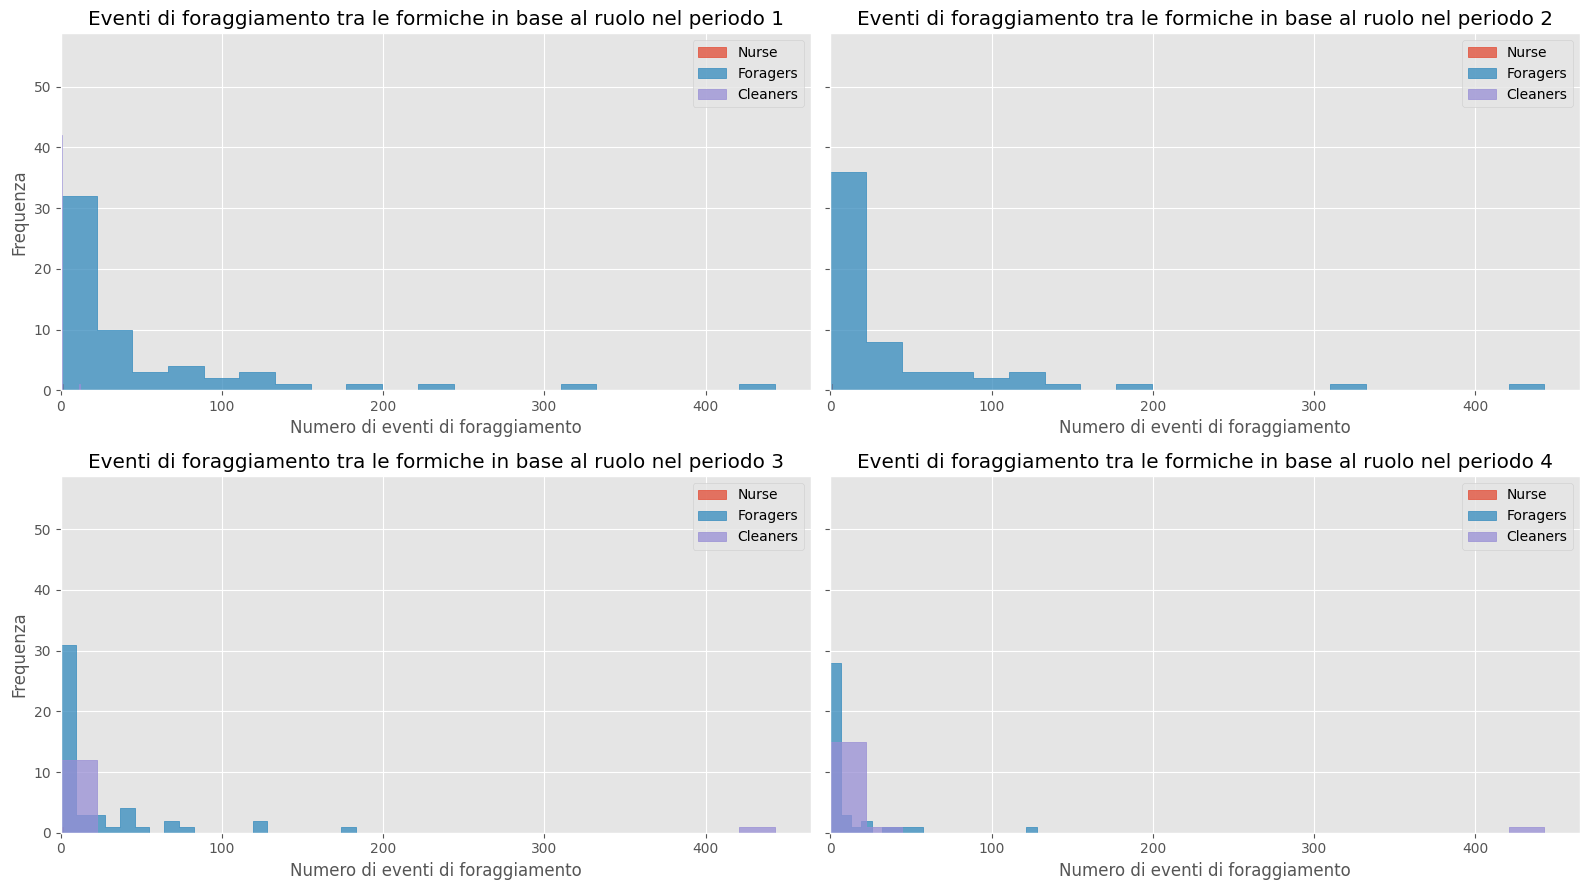

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
    ax = axes[(i-1) // 2, (i-1) % 2]
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['nb_foraging_events'], stat='count', ax=ax, element="step", bins=20, label='Nurses')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['nb_foraging_events'], stat='count', ax=ax, element="step", bins=20, label='Foragers')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['nb_foraging_events'], stat='count', ax=ax, element="step", bins=20, label='Cleaners')

    ax.set_xlabel('Numero di eventi di foraggiamento')
    ax.set_ylabel('Frequenza')
    ax.set_title('Eventi di foraggiamento tra le formiche in base al ruolo nel periodo ' + str(i))
    ax.set_xlim(left=0)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
events_c = [cleaners.vs["nb_foraging_events"][i] for i in range(cleaners.vcount())]
events_f = [foragers.vs["nb_foraging_events"][i] for i in range(foragers.vcount())]
events_n = [nurses.vs["nb_foraging_events"][i] for i in range(nurses.vcount())]

print("Eventi di foraggiamento dei cleaners:", events_c)
print("Eventi di foraggiamento dei foragers:", events_f)
print("Eventi di foraggiamento dei nurses:", events_n)

Eventi di foraggiamento dei cleaners: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Eventi di foraggiamento dei foragers: [0.0, 18.0, 0.0, 45.0, 0.0, 91.0, 443.0, 0.0, 38.0, 52.0, 24.0, 0.0, 0.0, 119.0, 73.0, 0.0, 318.0, 0.0, 0.0, 0.0, 7.0, 0.0, 25.0, 42.0, 42.0, 0.0, 36.0, 27.0, 0.0, 73.0, 9.0, 13.0, 0.0, 128.0, 183.0, 2.0, 0.0, 94.0, 125.0, 19.0, 233.0, 0.0, 0.0, 51.0, 1.0, 43.0, 0.0, 3.0, 36.0, 4.0, 12.0, 150.0, 0.0, 74.0, 5.0, 78.0, 20.0, 29.0, 20.0]
Eventi di foraggiamento dei nurses: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
events = {"Cleaners": events_c, "Foragers": events_f, "Nurses": events_n}

In [ ]:
keys = list(events.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        events_i = events[key_i]
        events_j = events[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(events_i, events_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(events_i, events_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.6547, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = -5.7127, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.0233, P-value = 1.0000
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = 0.0436, P-value = 0.9652
  -> Distribuzioni NON differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.6610, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = 6.1503, P-value = 0.0000
  -> Distribuzioni differenti.



#### **Distribuzione Visits to Rubbishpile**

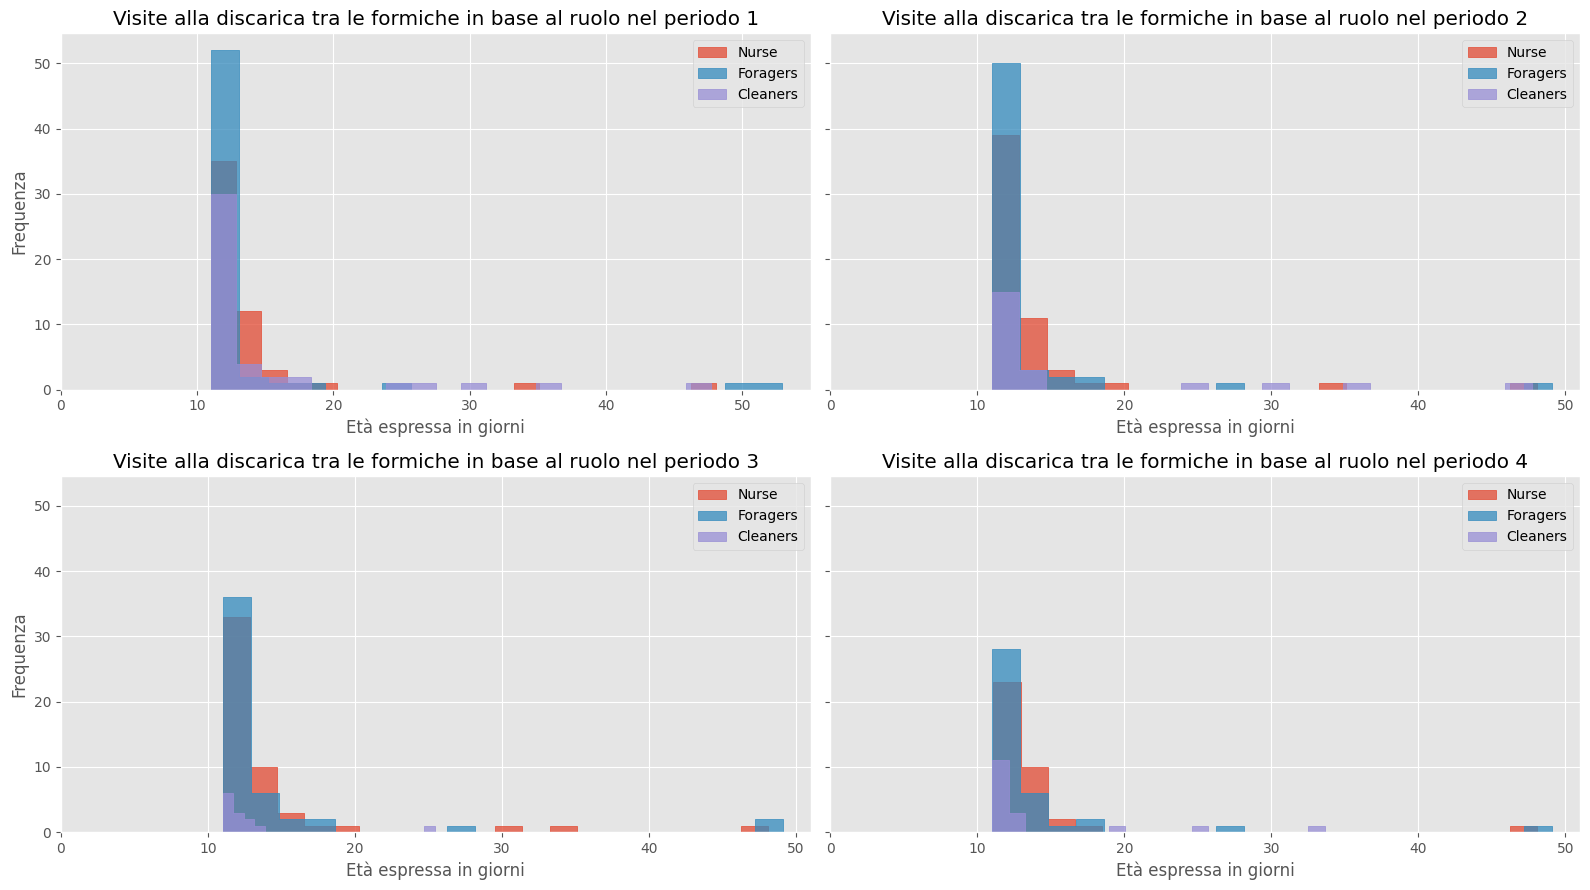

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
    ax = axes[(i-1) // 2, (i-1) % 2]
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['visits_to_rubbishpile'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Nurses')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['visits_to_rubbishpile'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Foragers')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['visits_to_rubbishpile'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Cleaners')

    ax.set_xlabel('Visite alla discarica')
    ax.set_ylabel('Frequenza')
    ax.set_title('Visite alla discarica tra le formiche in base al ruolo nel periodo ' + str(i))
    ax.set_xlim(left=0)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
visits_c = [cleaners.vs["visits_to_rubbishpile"][i] for i in range(cleaners.vcount())]
visits_f = [foragers.vs["visits_to_rubbishpile"][i] for i in range(foragers.vcount())]
visits_n = [nurses.vs["visits_to_rubbishpile"][i] for i in range(nurses.vcount())]

print("Visite dei cleaners:", visits_c)
print("Visite dei foragers:", visits_f)
print("Visite dei nurses:", visits_n)

Visite dei cleaners: [0.909091, 1.09091, 0.363636, 1.0, 0.272727, 1.0, 0.181818, 0.909091, 3.0, 0.545455, 1.45455, 0.818182, 1.09091, 0.0, 3.45455, 14.4545, 0.727273, 0.0909091, 0.0, 15.5455, 0.545455, 0.909091, 36.7273, 1.63636, 0.0909091, 2.72727, 0.272727, 0.272727, 19.7273, 0.545455, 25.0, 1.81818, 3.27273, 0.727273, 0.454545, 4.27273, 4.0, 5.54545, 0.0, 0.727273, 0.181818, 1.09091, 5.90909]
Visite dei foragers: [1.63636, 1.72727, 0.636364, 1.0, 0.181818, 0.636364, 0.0, 38.0909, 5.18182, 0.636364, 0.0, 0.181818, 0.363636, 0.0, 0.0, 0.272727, 1.81818, 0.545455, 0.454545, 2.0, 0.909091, 0.0, 1.54545, 12.6364, 3.18182, 2.54545, 0.0, 0.0, 0.0909091, 1.54545, 0.0, 0.0909091, 1.36364, 0.0, 1.36364, 0.636364, 0.0, 0.181818, 1.18182, 0.0, 0.636364, 0.0, 0.272727, 0.545455, 41.9091, 0.0909091, 6.54545, 0.0, 0.0, 0.818182, 0.0, 0.0909091, 0.0, 0.0, 0.545455, 0.818182, 0.272727, 0.0909091, 0.909091]
Visite dei nurses: [0.909091, 0.0909091, 0.0909091, 3.45455, 1.36364, 0.909091, 2.90909, 1.181

In [ ]:
visits = {"Cleaners": visits_c, "Foragers": visits_f, "Nurses": visits_n}

In [ ]:
keys = list(visits.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        visits_i = visits[key_i]
        visits_j = visits[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.2952, P-value = 0.0200
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = 2.8936, P-value = 0.0038
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.2205, P-value = 0.1623
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = -0.7988, P-value = 0.4244
  -> Distribuzioni NON differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.3848, P-value = 0.0003
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = -3.9661, P-value = 0.0001
  -> Distribuzioni differenti.



#### **Distribuzioni Visits to Nest Entrance**

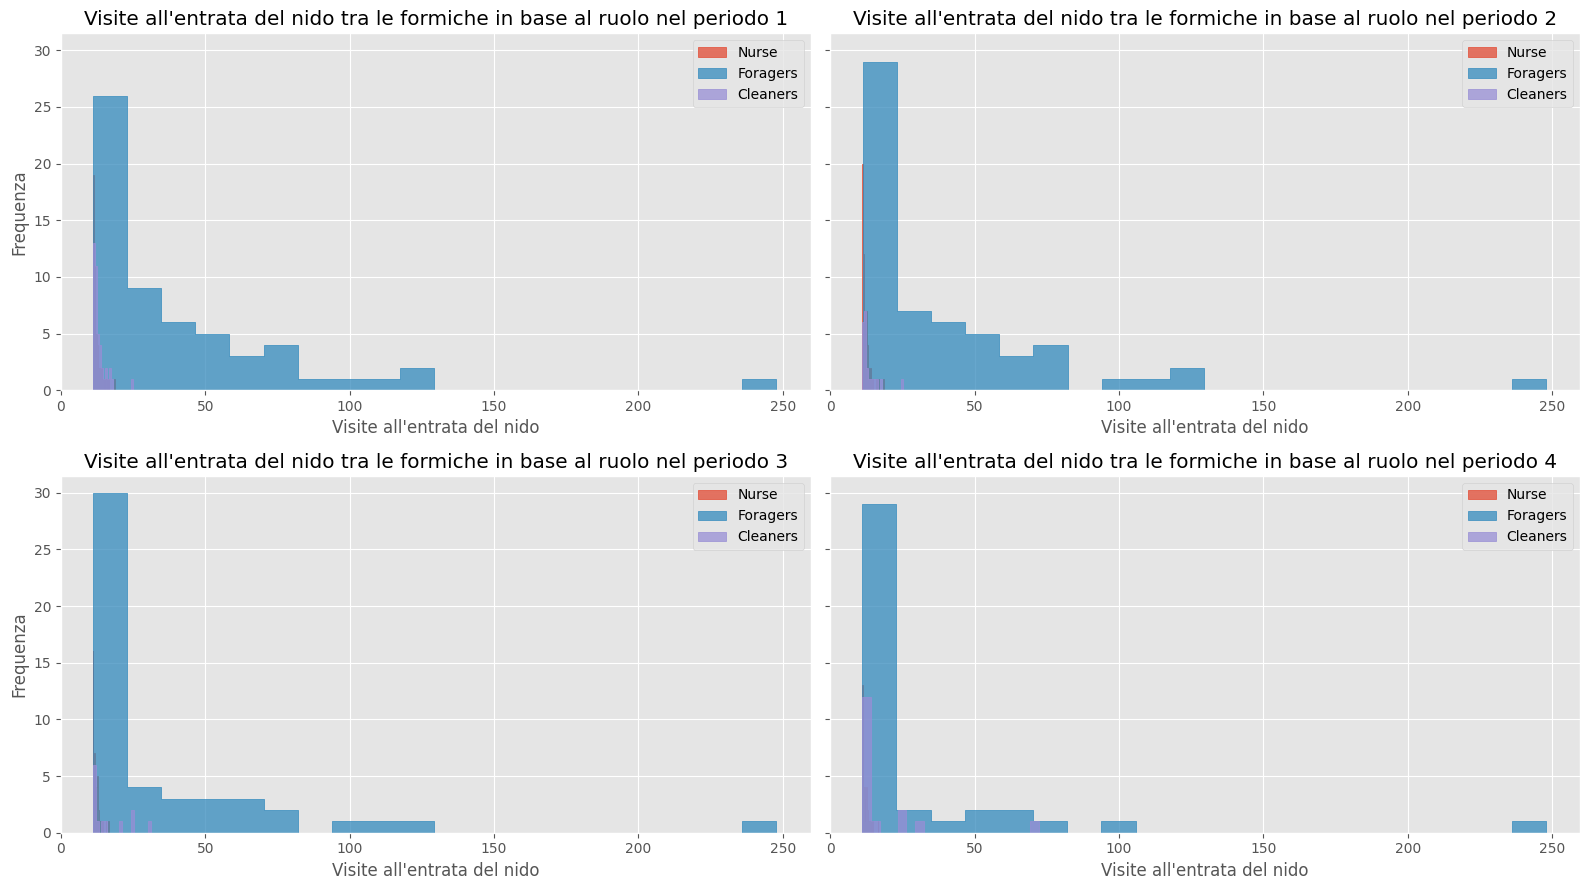

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
  ax = axes[(i-1) // 2, (i-1) % 2]
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['visits_to_nest_entrance'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Nurses')
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['visits_to_nest_entrance'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Foragers')
  sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['visits_to_nest_entrance'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Cleaners')

  ax.set_xlabel('Visite all\'entrata del nido')
  ax.set_ylabel('Frequenza')
  ax.set_title('Visite all\'entrata del nido tra le formiche in base al ruolo nel periodo ' + str(i))
  ax.set_xlim(left=0)
  ax.legend()

plt.tight_layout()
plt.show();

In [ ]:
visits_c = [cleaners.vs["visits_to_nest_entrance"][i] for i in range(cleaners.vcount())]
visits_f = [foragers.vs["visits_to_nest_entrance"][i] for i in range(foragers.vcount())]
visits_n = [nurses.vs["visits_to_nest_entrance"][i] for i in range(nurses.vcount())]

print("Visite all'entrata del nido dei cleaners:", visits_c)
print("Visite all'entrata del nido dei foragers:", visits_f)
print("Visite all'entrata del nido dei nurses:", visits_n)

Visite all'entrata del nido dei cleaners: [1.72727, 0.909091, 0.0, 1.09091, 1.36364, 0.636364, 1.0, 0.181818, 0.0, 2.18182, 0.0, 6.09091, 1.36364, 5.81818, 0.727273, 14.0909, 2.54545, 0.545455, 3.63636, 4.36364, 5.18182, 0.0909091, 6.36364, 1.54545, 0.0, 4.90909, 1.45455, 1.27273, 1.63636, 0.454545, 2.45455, 0.0, 1.54545, 1.36364, 0.0, 3.45455, 0.272727, 2.45455, 1.09091, 0.818182, 0.181818, 2.90909, 1.0]
Visite all'entrata del nido dei foragers: [0.181818, 87.6364, 2.0, 70.0909, 1.27273, 27.5455, 13.7273, 5.72727, 236.81799999999998, 17.4545, 26.8182, 12.2727, 6.27273, 64.5455, 17.0, 0.0, 38.2727, 1.27273, 56.3636, 0.636364, 5.18182, 3.09091, 38.6364, 13.9091, 49.8182, 2.27273, 80.0, 11.7273, 1.36364, 117.0, 7.81818, 11.7273, 2.45455, 45.9091, 51.3636, 3.54545, 20.2727, 68.4545, 30.8182, 29.0909, 0.545455, 9.18182, 21.0, 111.182, 7.27273, 100.545, 2.18182, 2.81818, 32.0, 6.36364, 20.0909, 45.7273, 0.181818, 14.7273, 3.0, 38.1818, 30.6364, 61.2727, 6.909089999999999]
Visite all'entrata

In [ ]:
visits = {"Cleaners": visits_c, "Foragers": visits_f, "Nurses": visits_n}

In [ ]:
keys = list(visits.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        visits_i = visits[key_i]
        visits_j = visits[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.6484, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = -6.2446, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.2390, P-value = 0.1061
  -> Distribuzioni NON differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = 1.6993, P-value = 0.0893
  -> Distribuzioni NON differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.6933, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = 7.3114, P-value = 0.0000
  -> Distribuzioni differenti.



#### **Distribuzioni Visits to Brood**

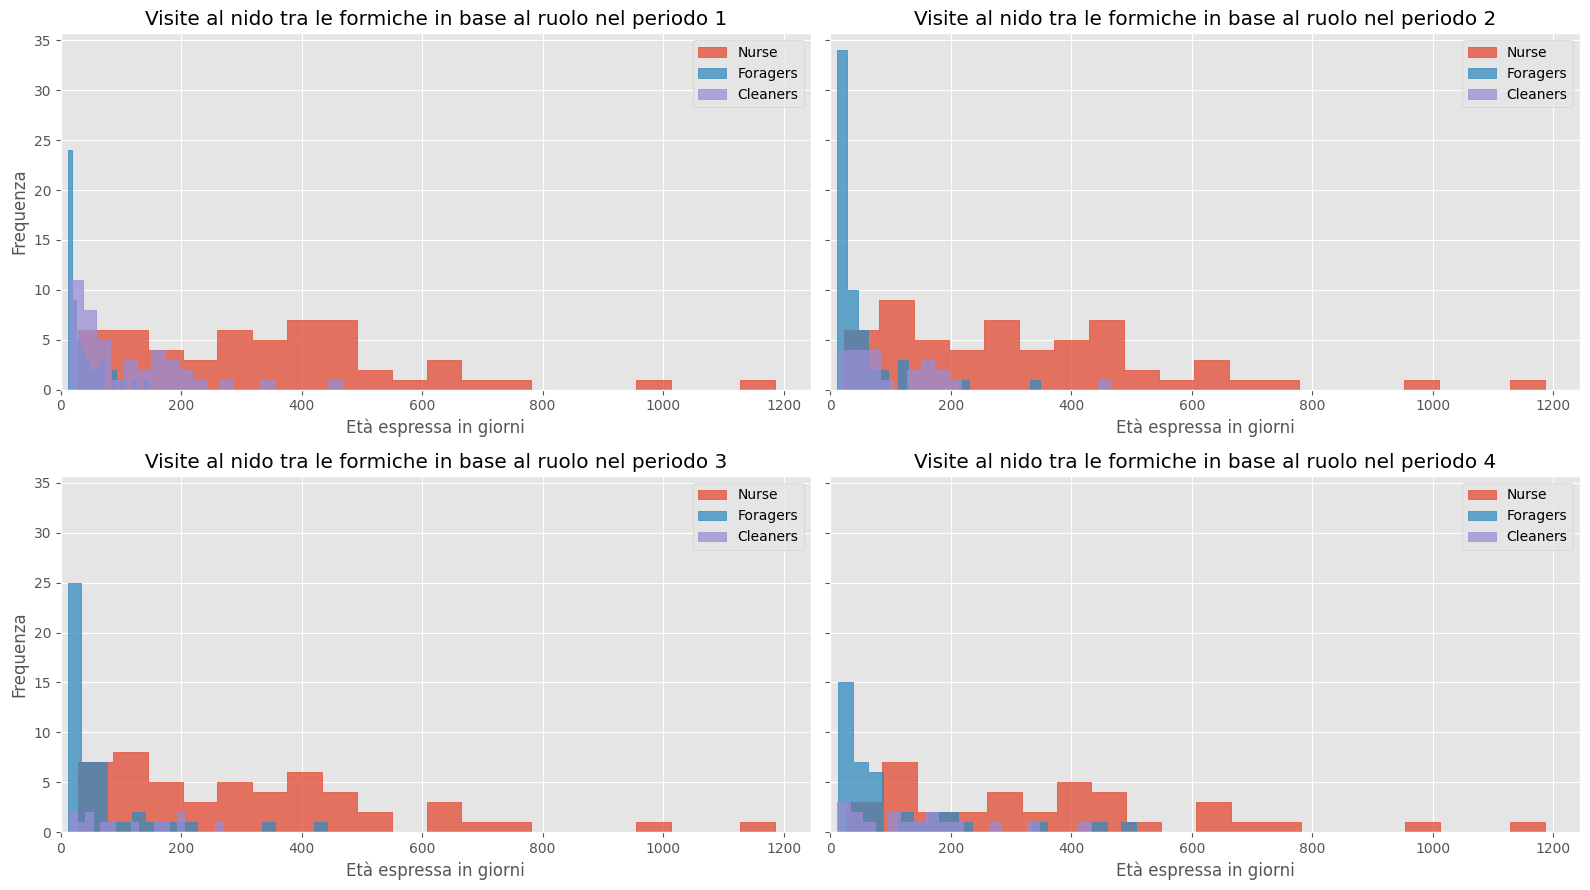

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)

for i in range(1, 5):
    ax = axes[(i-1) // 2, (i-1) % 2]
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'N']['visits_to_brood'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Nurse')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'F']['visits_to_brood'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Foragers')
    sns.histplot(data=ants_data_df[ants_data_df[f'group_period{str(i)}'] == 'C']['visits_to_brood'] + (1 + 10 * 1), stat='count', ax=ax, element="step", bins=20, label='Cleaners')

    ax.set_xlabel('Visite alla covata')
    ax.set_ylabel('Frequenza')
    ax.set_title('Visite al nido tra le formiche in base al ruolo nel periodo ' + str(i))
    ax.set_xlim(left=0)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
visits_c = [cleaners.vs["visits_to_brood"][i] for i in range(cleaners.vcount())]
visits_f = [foragers.vs["visits_to_brood"][i] for i in range(foragers.vcount())]
visits_n = [nurses.vs["visits_to_brood"][i] for i in range(nurses.vcount())]

print("Visite alla covata dei cleaners:", visits_c)
print("Visite alla covata dei foragers:", visits_f)
print("Visite alla covata dei nurses:", visits_n)

Visite alla covata dei cleaners: [36.1818, 154.545, 14.3636, 208.81799999999998, 48.0, 82.0, 29.2727, 181.273, 2.90909, 337.36400000000003, 14.9091, 26.6364, 6.18182, 6.0, 147.091, 186.0, 10.1818, 4.72727, 57.4545, 42.8182, 151.273, 177.455, 21.0, 257.63599999999997, 56.5455, 30.2727, 104.455, 113.545, 49.1818, 55.5455, 121.90899999999999, 67.1818, 109.455, 455.63599999999997, 10.9091, 35.8182, 157.727, 118.273, 2.72727, 191.273, 6.636360000000001, 171.81799999999998, 48.0]
Visite alla covata dei foragers: [75.4545, 32.0, 24.7273, 8.45455, 88.7273, 11.5455, 3.36364, 55.6364, 47.1818, 5.54545, 4.90909, 4.27273, 24.5455, 4.81818, 1.27273, 38.5455, 5.18182, 6.72727, 2.36364, 4.54545, 23.6364, 2.72727, 27.4545, 20.4545, 28.9091, 9.090910000000001, 1.27273, 43.8182, 134.0, 46.4545, 10.4545, 1.72727, 7.72727, 17.0, 2.81818, 19.0909, 110.818, 6.72727, 3.63636, 17.4545, 52.2727, 18.7273, 19.7273, 10.4545, 35.6364, 2.36364, 57.2727, 75.5455, 5.72727, 57.0909, 2.27273, 5.90909, 8.909089999999999

In [ ]:
visits = {"Cleaners": visits_c, "Foragers": visits_f, "Nurses": visits_n}

In [ ]:
keys = list(visits.keys())

for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key_i = keys[i]
        key_j = keys[j]
        visits_i = visits[key_i]
        visits_j = visits[key_j]

        # Kolmogorov-Smirnov Test
        ks_stat, ks_pvalue = ks_2samp(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Kolmogorov-Smirnov Test):")
        print(f"  Statistic = {ks_stat:.4f}, P-value = {ks_pvalue:.4f}")
        if ks_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

        # Ranksums Test
        rs_stat, rs_pvalue = ranksums(visits_i, visits_j)
        print(f"Confronto tra {key_i} e {key_j} (Ranksums Test):")
        print(f"  Statistic = {rs_stat:.4f}, P-value = {rs_pvalue:.4f}")
        if rs_pvalue < alpha:
            print("  -> Distribuzioni differenti.")
        else:
            print("  -> Distribuzioni NON differenti.")
        print()

Confronto tra Cleaners e Foragers (Kolmogorov-Smirnov Test):
  Statistic = 0.4667, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Foragers (Ranksums Test):
  Statistic = 5.0113, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.6154, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Cleaners e Nurses (Ranksums Test):
  Statistic = -5.9039, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Kolmogorov-Smirnov Test):
  Statistic = 0.8412, P-value = 0.0000
  -> Distribuzioni differenti.

Confronto tra Foragers e Nurses (Ranksums Test):
  Statistic = -8.6133, P-value = 0.0000
  -> Distribuzioni differenti.



## **Analisi Dinamica**

In [ ]:
alpha = 0.05

### **Evoluzione dei gruppi nel tempo**

Preparazione dei dati per la visualizzazione

In [ ]:
periods = ['Period_1', 'Period_2', 'Period_3', 'Period_4']
classes = ['Nurses', 'Foragers', 'Cleaners', 'Disappeared']

labels = [p + '_' + r  for r, p in list(product(periods, classes))]
colors = []
for i in range(len(labels)):
  if classes[0] in labels[i]:
    colors.append('blue')
  elif classes[1] in labels[i]:
    colors.append('red')
  elif classes[2] in labels[i]:
    colors.append('green')
  else:
    colors.append('grey')

dataset_periods = [('group_period1', 'Period_1'), ('group_period2', 'Period_2'), ('group_period3', 'Period_3'), ('group_period4', 'Period_4')]
classes_short = [('Nurses', 'N'), ('Foragers', 'F'), ('Cleaners', 'C'), ('Disappeared', ' ')]

positions = {key: value for value, key in enumerate(labels)}
sources = []
targets = []
values = []

for i in range(1, len(dataset_periods)):
  p = ants_period_groups[[dataset_periods[i - 1][0], dataset_periods[i][0]]]
  for s_name, s_label in classes_short:
    for d_name, d_label in classes_short:
      q = f"{dataset_periods[i - 1][0]} == '{s_label}' and {dataset_periods[i][0]} == '{d_label}'"
      tmp = p.query(q)
      sources.append(positions[s_name + '_' + dataset_periods[i - 1][1]])
      targets.append(positions[d_name + '_' + dataset_periods[i][1]])
      values.append(tmp.shape[0])

Visualizzazione dell'evoluzione nel tempo con un sankey plot

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = colors,
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Community Evolution", font_size=10)

fig.show()

Analizziamo le dimensioni dei gruppi nei 4 periodi

In [ ]:
group_size_pct_df = pd.DataFrame(index = pd.Index(['Nurses', 'Foragers', 'Cleaners', 'Disappeared']))

for i in range(0, len(dataset_periods)):
  p = ants_period_groups[[dataset_periods[i][0]]]
  data = {}
  for name, label in classes_short:
    tmp = p.query(f"{dataset_periods[i][0]} == '{label}'")
    data[name] = tmp.shape[0]

  total_ants = sum(data.values())

  for key in data.keys():
    data[key] = round((data[key]) / total_ants, 3)

  group_size_pct_df[dataset_periods[i][0]] = (group_size_pct_df.index).map(data)

group_size_pct_df.loc['Disappeared']

group_period1    0.000
group_period2    0.115
group_period3    0.276
group_period4    0.404
Name: Disappeared, dtype: float64

In [ ]:
def compute_pct_disapperd(data_df):
  group_size_pct_df = pd.DataFrame(index = pd.Index(['Nurses', 'Foragers', 'Cleaners', 'Disappeared']))

  for i in range(0, len(dataset_periods)):
    p = data_df[[dataset_periods[i][0]]]
    data = {}
    for name, label in classes_short:
      tmp = p.query(f"{dataset_periods[i][0]} == '{label}'")
      data[name] = tmp.shape[0]

    total_ants = sum(data.values())

    for key in data.keys():
      data[key] = round((data[key]) / total_ants, 3)

    group_size_pct_df[dataset_periods[i][0]] = (group_size_pct_df.index).map(data)

  return group_size_pct_df.loc['Cleaners']

In [ ]:
disapperd_colonies_df = pd.DataFrame(index=pd.Index(['group_period1', 'group_period2', 'group_period3', 'group_period4']))

for col in colonies:
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{days[day_idx]}.graphml"
  graph = ig.Graph.Read_GraphML(path)
  data = pd.DataFrame.from_dict({v.index: v.attributes() for v in graph.vs}, orient='index').set_index('id')

  disapperd_colonies_df[col] = compute_pct_disapperd(data)

disapperd_colonies_df.head()

1      2      3      4      5      6
group_period1  0.284  0.276  0.276  0.357  0.277  0.217
group_period2  0.248  0.205  0.141  0.061  0.196  0.062
group_period3  0.156  0.252  0.083  0.122  0.088  0.043
group_period4  0.073  0.197  0.109  0.071  0.115  0.118

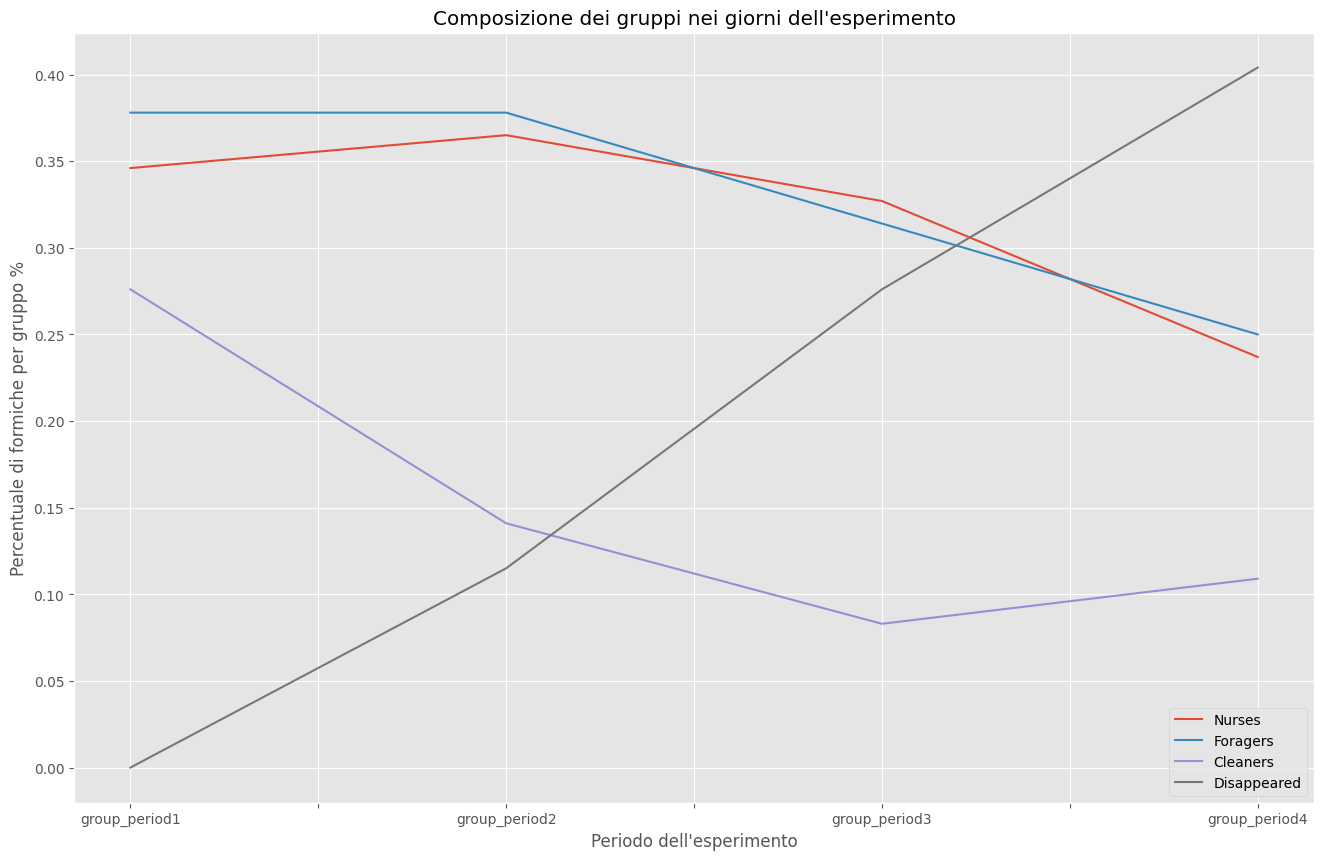

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("Periodo dell'esperimento")
ax.set_ylabel("Percentuale di formiche per gruppo %")
ax.set_title("Composizione dei gruppi nei giorni dell'esperimento")
group_size_pct_df.T.plot(ax=ax);

In [ ]:
for i in range(len(list_periods) - 1):
  missing_ants = ants_period_groups.query(f"{list_periods[i]} != ' ' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  for name, label in classes_short:
    tmp = ants_data_df.query(f"{dataset_periods[i][0]} == '{label}'")
    print(name)
    print(tmp.describe())

Nurses
       nb_interaction_queen  nb_interaction_foragers  nb_interaction_cleaners  \
count             54.000000                54.000000                54.000000   
mean              13.809556                65.895623               148.683502   
std                9.136798                31.009213                50.185083   
min                1.636000                21.181818                51.090909   
25%                8.045500                42.977273               110.522725   
50%               11.455000                60.909091               148.681815   
75%               19.660000                90.227273               187.545453   
max               52.090000               156.181820               279.454550   

       nb_interaction_nurses  visits_to_rubbishpile  visits_to_nest_entrance  \
count              54.000000              54.000000                54.000000   
mean              506.161615               2.781145                 1.279461   
std               144.4

In [ ]:
change_df = pd.DataFrame(index=pd.Index(['group_period1', 'group_period2', 'group_period3']))

roles = ['F', 'N', 'C']
for col in colonies:
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{days[day_idx]}.graphml"
  graph = ig.Graph.Read_GraphML(path)
  data = pd.DataFrame.from_dict({v.index: v.attributes() for v in graph.vs}, orient='index').set_index('id')

  periods_data = {}
  for i in range(len(list_periods) - 1):
    miss_ant_ids = 0
    not_role_ids = 0
    for role in roles:
      miss_ant_ids += len((data.query(f"{list_periods[i]} == '{role}' and {list_periods[i + 1]} == ' '").index))
      not_role_ids += len(list(data.query(f"{list_periods[i]} != '{role}' and {list_periods[i + 1]} == '{role}'").index))

    if miss_ant_ids != 0:
      periods_data[list_periods[i]] = round(not_role_ids/miss_ant_ids, 4)
    else:
      periods_data[list_periods[i]] = 0
  change_df[f'Colony {col}'] = change_df.index.map(periods_data)

change_df

Colony 1  Colony 2  Colony 3  Colony 4  Colony 5  Colony 6
group_period1    1.5714    1.1000    1.0556    0.9655    1.5789    1.3810
group_period2    0.5789    0.6667    0.6800    0.7222    0.8864    0.4000
group_period3    0.7391    0.3333    0.9000    0.1053    0.4762    0.9259

### **Analisi delle formiche scomparse in base al gruppo a cui apparentono**

In [ ]:
missing_by_periods = {}

for col in colonies:
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{days[day_idx]}.graphml"
  graph = ig.Graph.Read_GraphML(path)
  data = pd.DataFrame.from_dict({v.index: v.attributes() for v in graph.vs}, orient='index').set_index('id')

  for i in range(len(list_periods) - 1):
    miss_ants = data.query(f"{list_periods[i]} != ' ' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]
    missing_by_periods[(f"Colony{col}", f"{list_periods[i]}")] = miss_ants.groupby(list_periods[i]).size()

missing_df = pd.DataFrame.from_dict(missing_by_periods).fillna(int(0))
missing_df = missing_df.T.reset_index().groupby('level_0').sum().reset_index()
# missing_df['Period'] = missing_df['level_1']
missing_df['Colony'] = missing_df['level_0']
missing_df = missing_df.set_index('Colony')
missing_df = missing_df.drop(['level_0', 'level_1'], axis=1)

# for idx, row in missing_df.iterrows():
#   row.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#   plt.gca().spines[['top', 'right',]].set_visible(True)

#   plt.ylabel('Ruolo prima della scomparsa')
#   plt.xlabel('Numero di formiche scomparse')
#   plt.title(f'Formiche scomparse {idx}')
#   plt.show();
missing_df.T

Colony  Colony1  Colony2  Colony3  Colony4  Colony5  Colony6
C          10.0     22.0     13.0     20.0     11.0     12.0
F          40.0     22.0     39.0     25.0     52.0     36.0
N           6.0     27.0     11.0     21.0     21.0     25.0

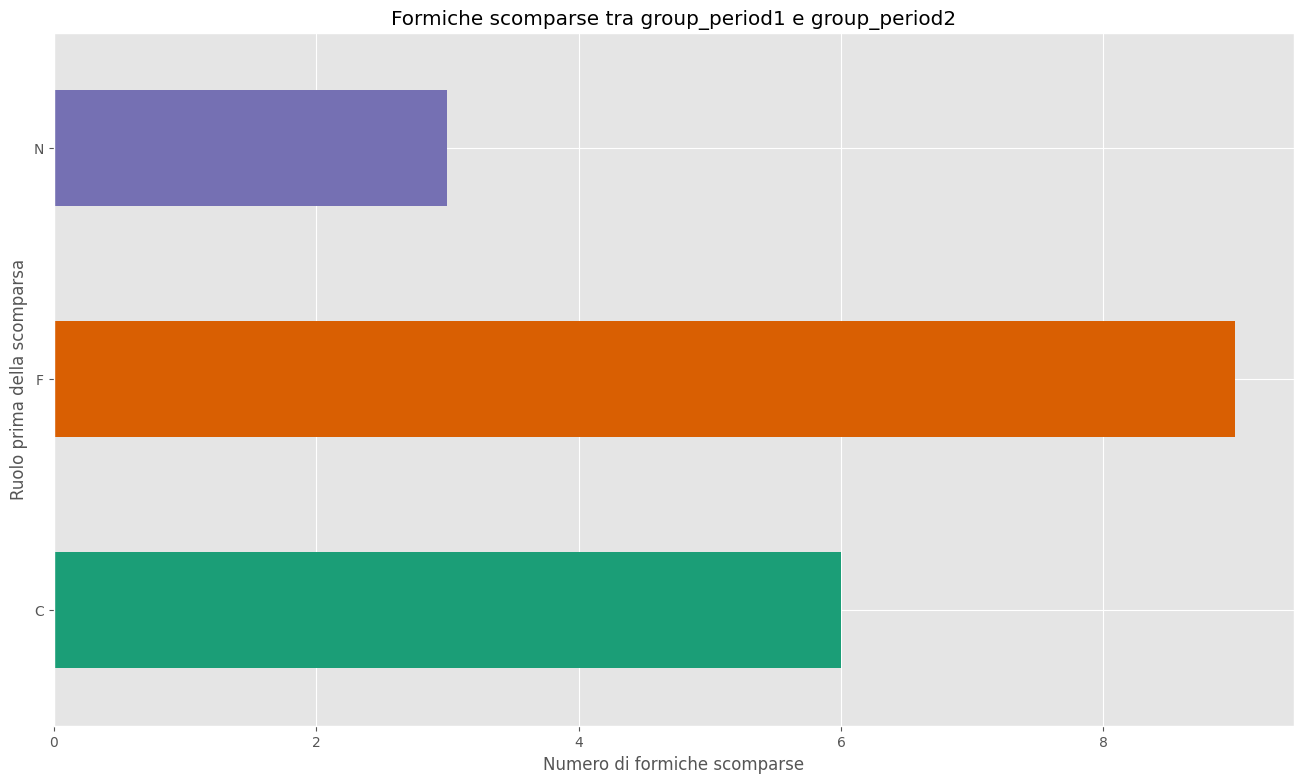

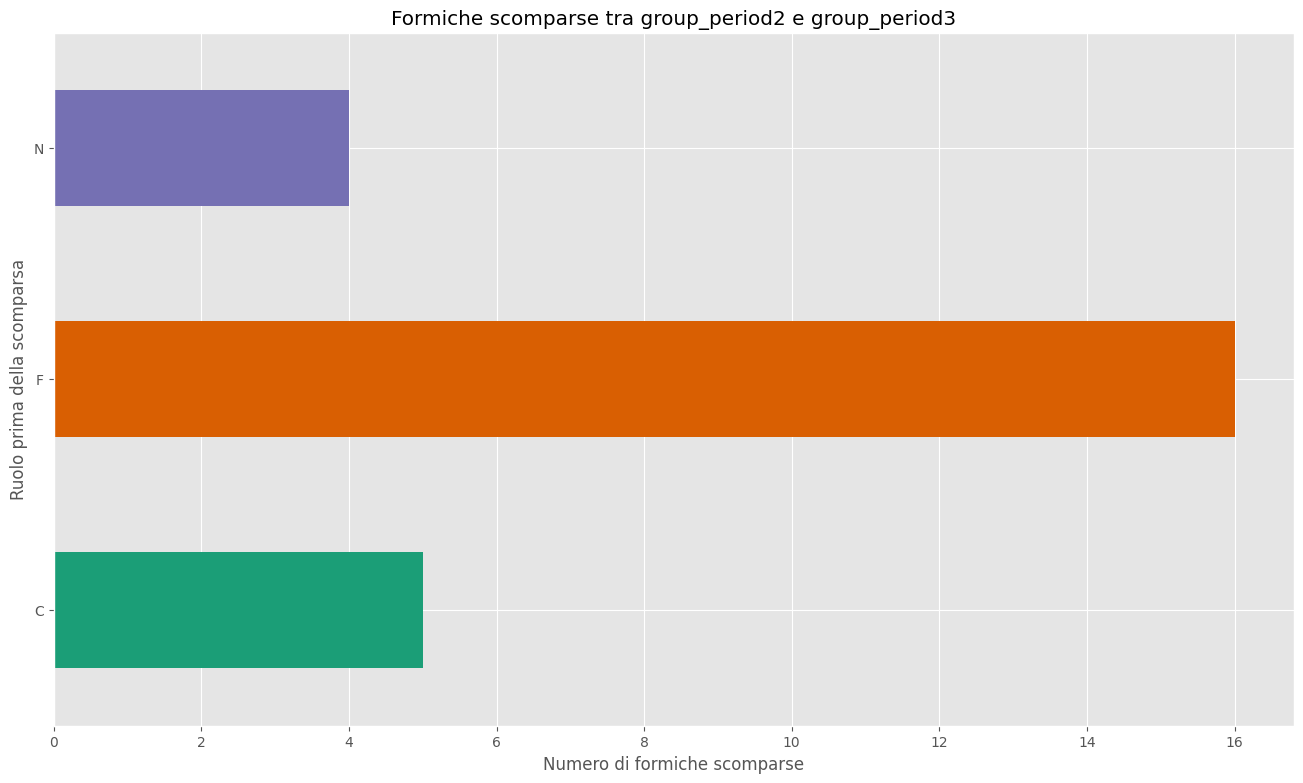

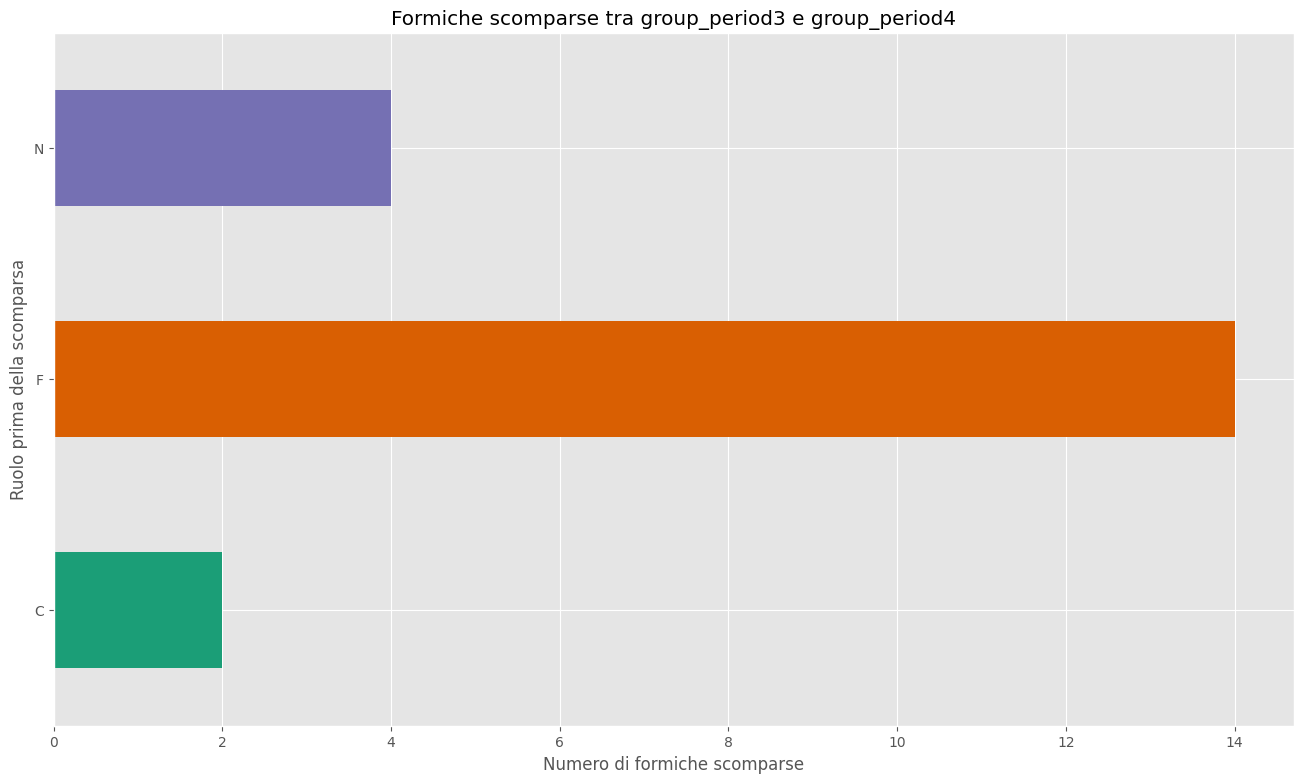

In [ ]:
for i in range(len(list_periods) - 1):
  missing_ants = ants_period_groups.query(f"{list_periods[i]} != ' ' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]
  plt.figure(figsize=(16, 9))

  missing_ants.groupby(list_periods[i]).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(True)

  plt.ylabel('Ruolo prima della scomparsa')
  plt.xlabel('Numero di formiche scomparse')
  plt.title(f'Formiche scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.show();

In [ ]:
pct_disappeared_df = pd.DataFrame(index = pd.Index(['Nurses', 'Foragers', 'Cleaners', 'Disappeared']))

for i in range(len(list_periods) - 1):
  missing_ants = ants_period_groups.query(f"{list_periods[i]} != ' ' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  missing_ants = missing_ants.groupby(list_periods[i]).size()

  data = {}
  for name, label in classes_short:
    tmp = ants_period_groups.query(f"{dataset_periods[i][0]} == '{label}'")
    if missing_ants[missing_ants.index == label].shape[0] != 0:
      data[name] = missing_ants.loc[label] / tmp.shape[0]
    else:
      data[name] = 0

  pct_disappeared_df[dataset_periods[i][0]] = (pct_disappeared_df.index).map(data)

pct_disappeared_df

group_period1  group_period2  group_period3
Nurses            0.055556       0.070175       0.078431
Foragers          0.152542       0.271186       0.285714
Cleaners          0.139535       0.227273       0.153846
Disappeared       0.000000       0.000000       0.000000

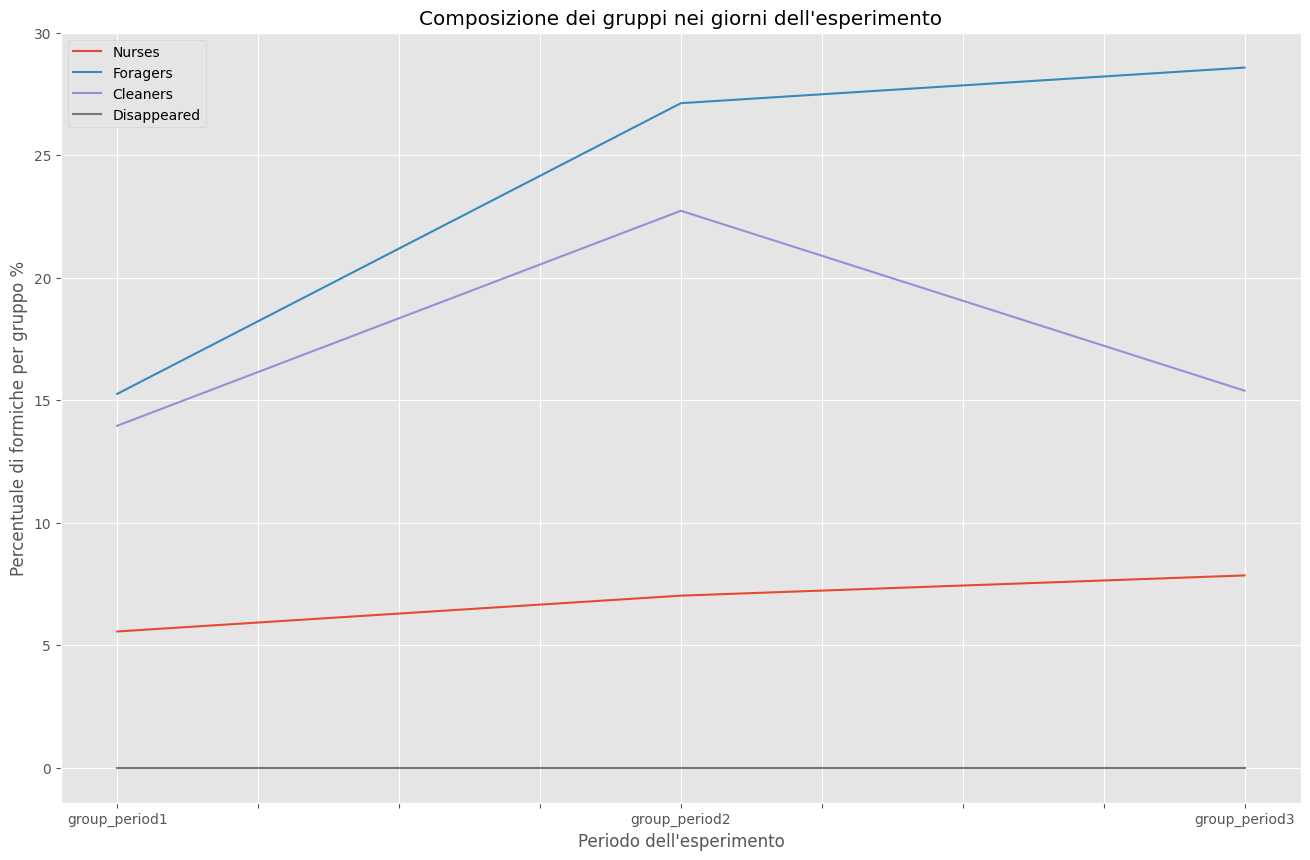

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_xlabel("Periodo dell'esperimento")
ax.set_ylabel("Percentuale di formiche per gruppo %")
ax.set_title("Composizione dei gruppi nei giorni dell'esperimento")
(pct_disappeared_df * 100).T.plot(ax=ax);

In [ ]:
ants_data_no_queen_df = ants_data_df[ants_data_df['group_period1'] != 'Q']

In [ ]:
def test_hypothesis_check(p_value, alpha):
  if p_value < alpha:
    print("Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.")
  else:
    print("Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.")

Come si nota dai grafici, le *Foragers* sono le formiche che tandono a scomparire di più. Come mai accede questo?

#### **Analisi delle età**

Dato che nell'articolo si dice che le foragers sono quelle più anziane, vogliamo analizzare se l'età è un fattore rilevante per determinare la scompara di una formica.

Iniziamo analizzando le distribuzioni di età tra le formiche scompare e quelle cdi cui si tiene traccia. Per fare questo è necessario correggere l'età delle formiche in quanto i dati presenti nel dataset non si aggiornano nel tempo.

Kolmogorov-Smirnov test otteniamo un p-value di 0.9445541526171874, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.808438245787489, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



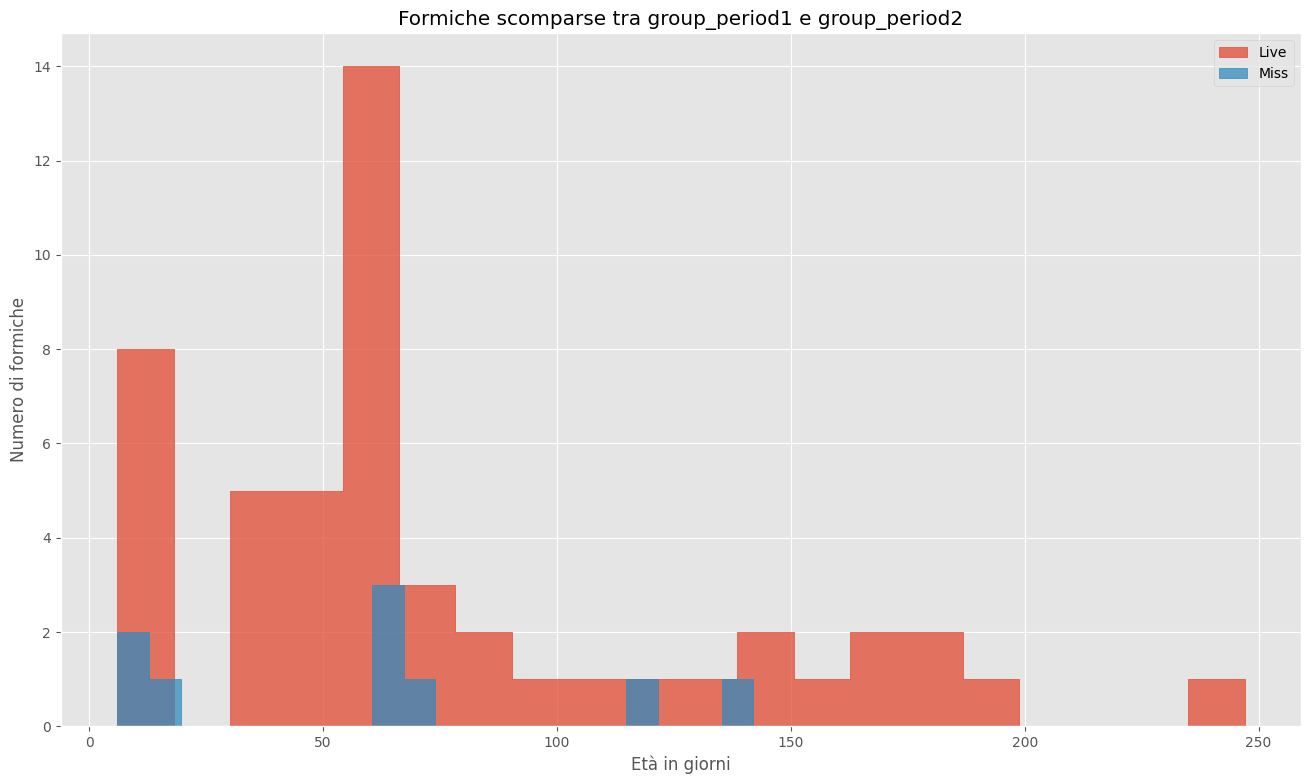


Kolmogorov-Smirnov test otteniamo un p-value di 0.5041392463116956, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.6933617332790072, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



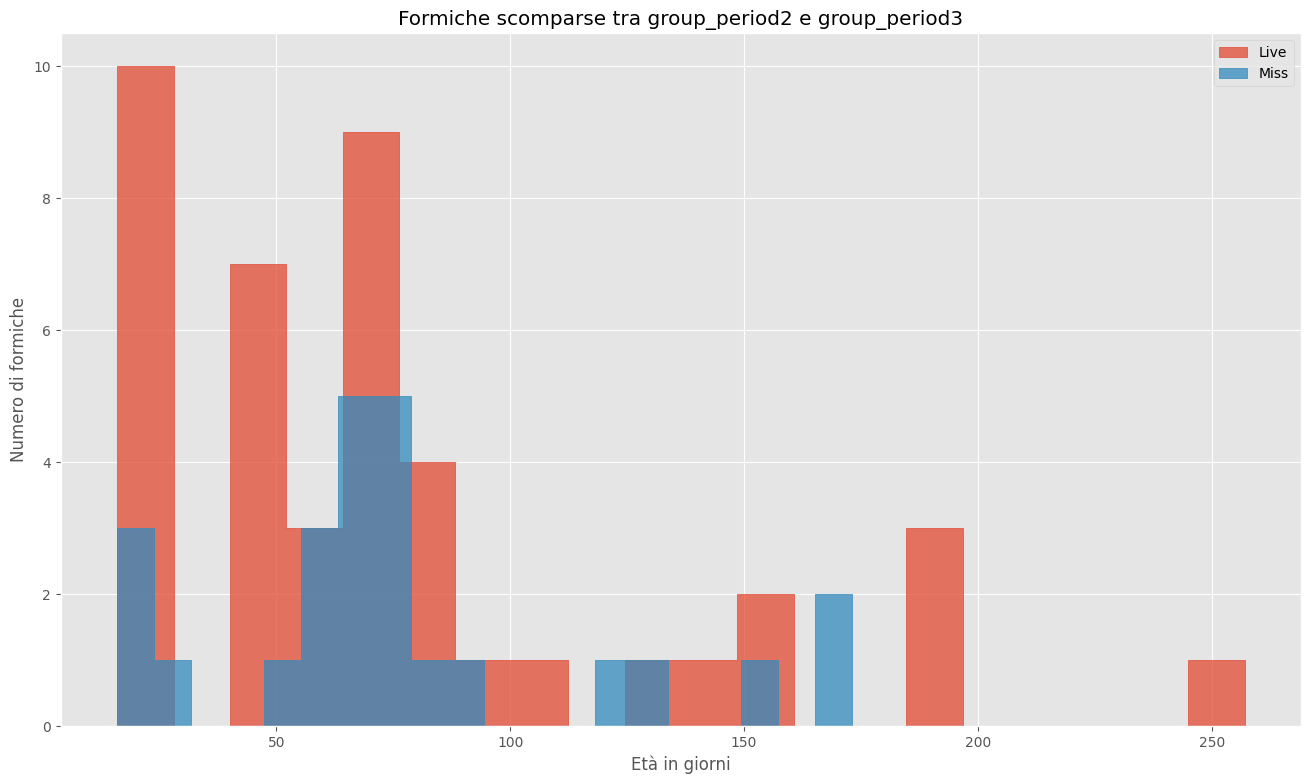


Kolmogorov-Smirnov test otteniamo un p-value di 0.8252866523233815, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.956829044273088, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



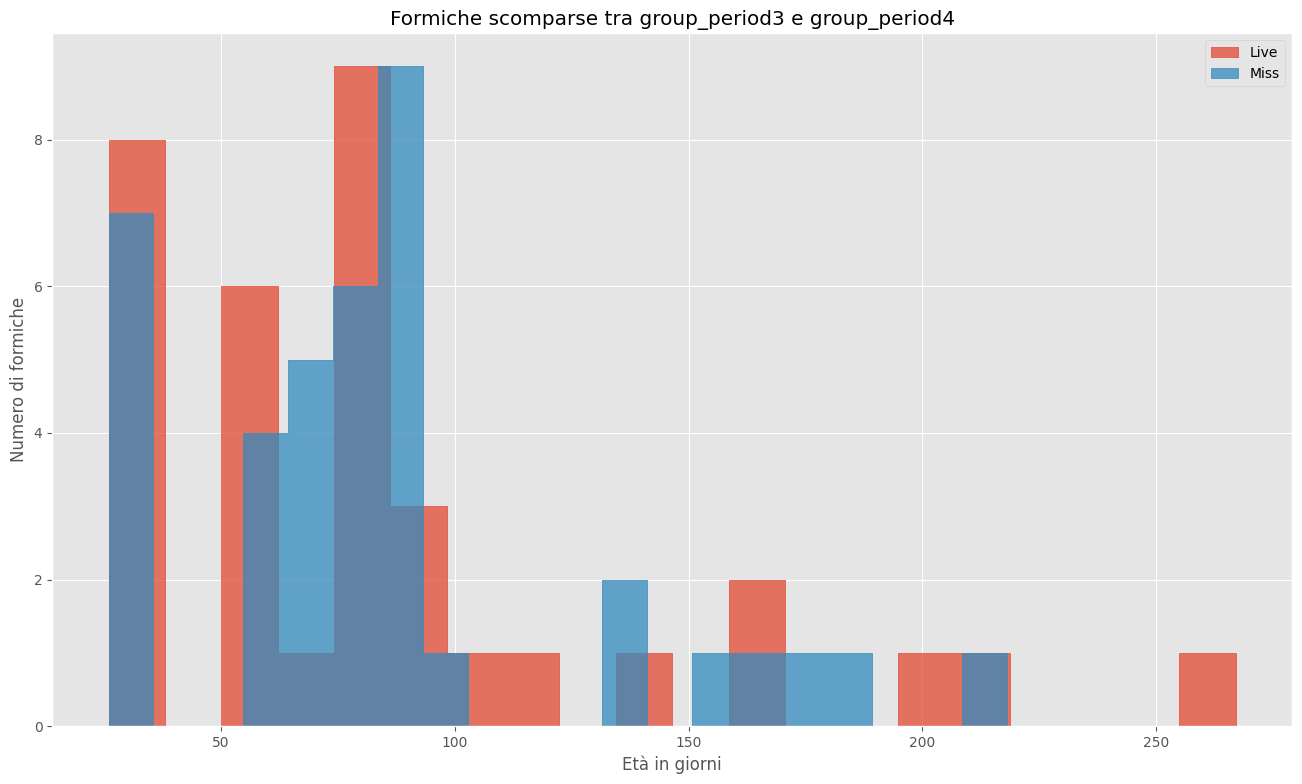

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids).difference(set(miss_ids)))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['age(days)'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['age(days)'] + 1 + (i * 10)).dropna())

  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(miss_values, live_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('Età in giorni')
  plt.title(f'Formiche scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

#### **Analisi in base alla dimensione**

Kolmogorov-Smirnov test otteniamo un p-value di 0.7032612830981175, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.569213649473711, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



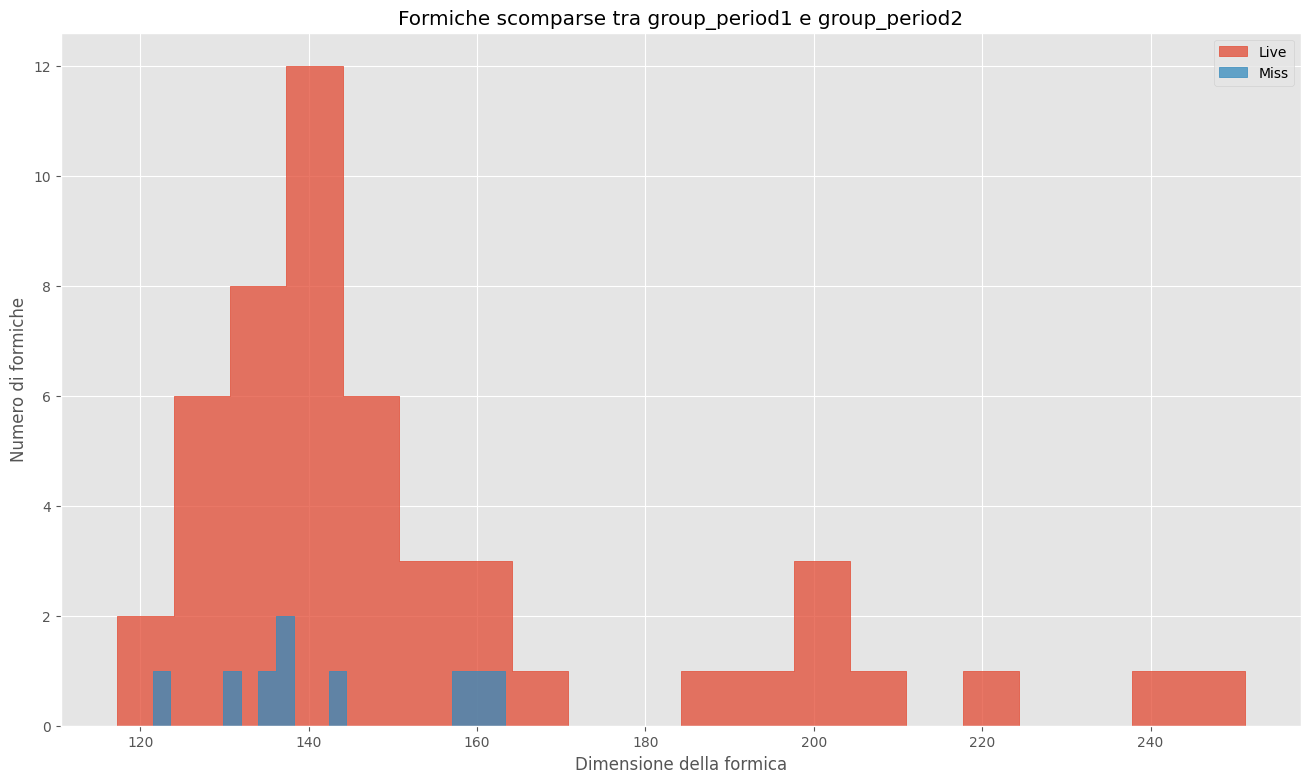


Kolmogorov-Smirnov test otteniamo un p-value di 0.022772081467771658, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.

Wilcoxon rank-sum test  otteniamo un p-value di 0.02538157208751407, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



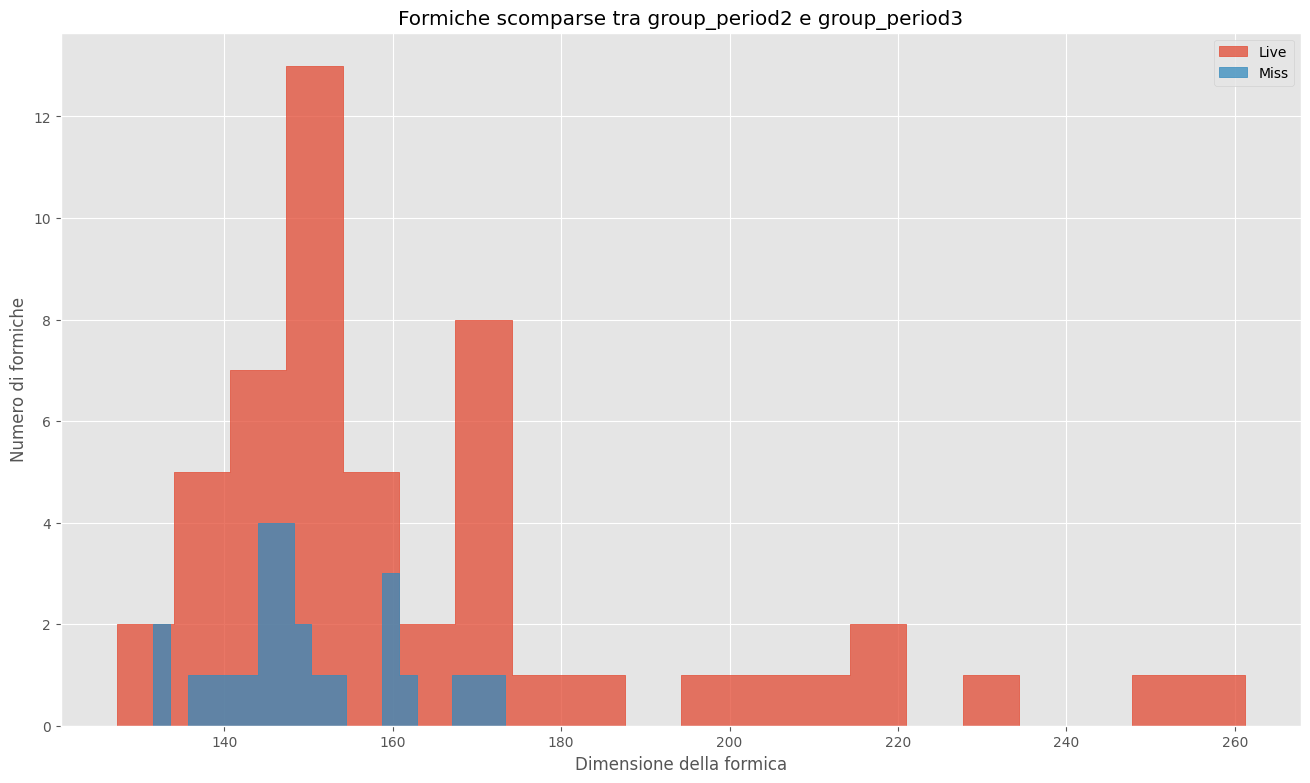


Kolmogorov-Smirnov test otteniamo un p-value di 0.4218897169014051, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.3075085987104056, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



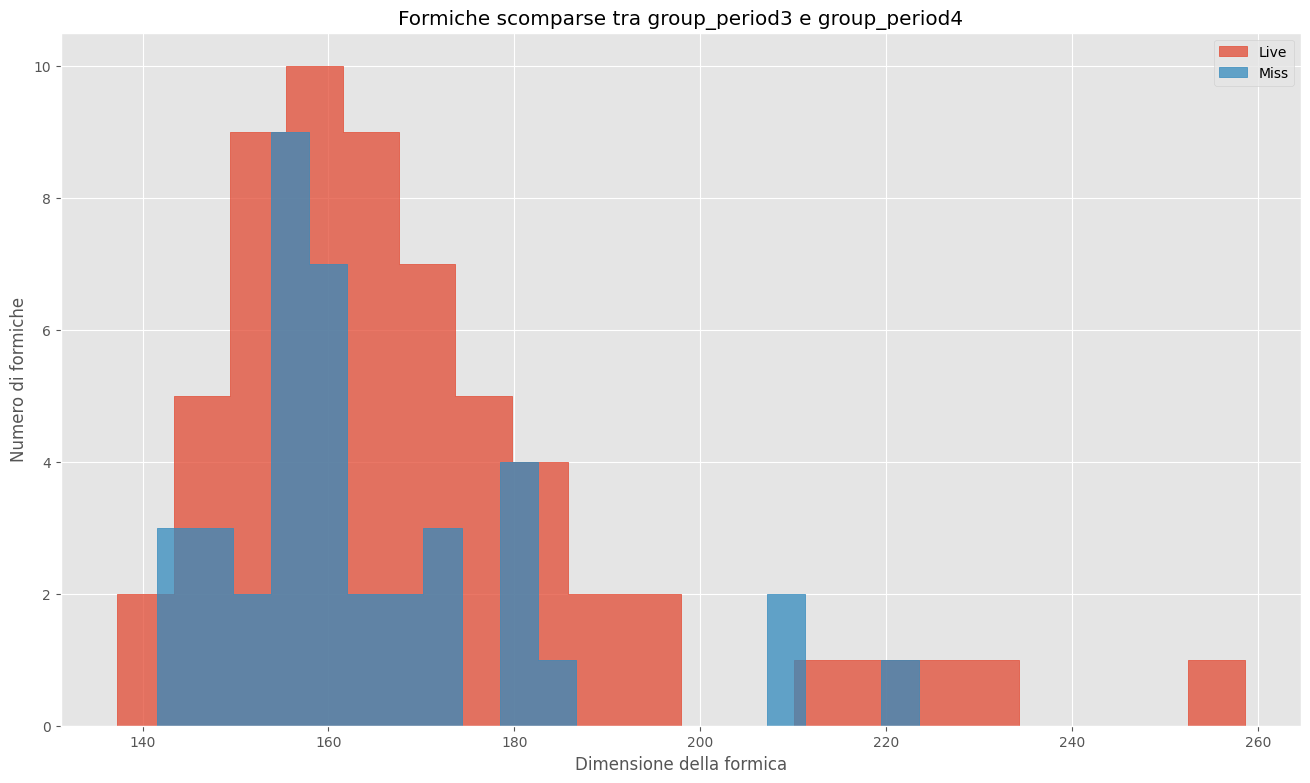

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids) ^ set(miss_ids))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['body_size'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['body_size'] + 1 + (i * 10)).dropna())


  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(live_values, miss_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('Dimensione della formica')
  plt.title(f'Formiche scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

#### **Analisi in base agli eventi**

Dato che il maggior numero di formiche che spariscono, abbiamo deciso di concentrare la nostra analisi su di esse. Una possibile ipotesi sul fatto che non si ha più alcuna informazione su di esse è che essendo il gruppo dedicato alla ricerca di cibo è anche quello che si muove di più e quindi è più probabile che abbiano perso il tag

In [ ]:
foragres_ids = list(ants_period_groups.query(f"{list_periods[0]} == 'F'").index)

Kolmogorov-Smirnov test otteniamo un p-value di 0.9990643307662765, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.8743670611628918, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



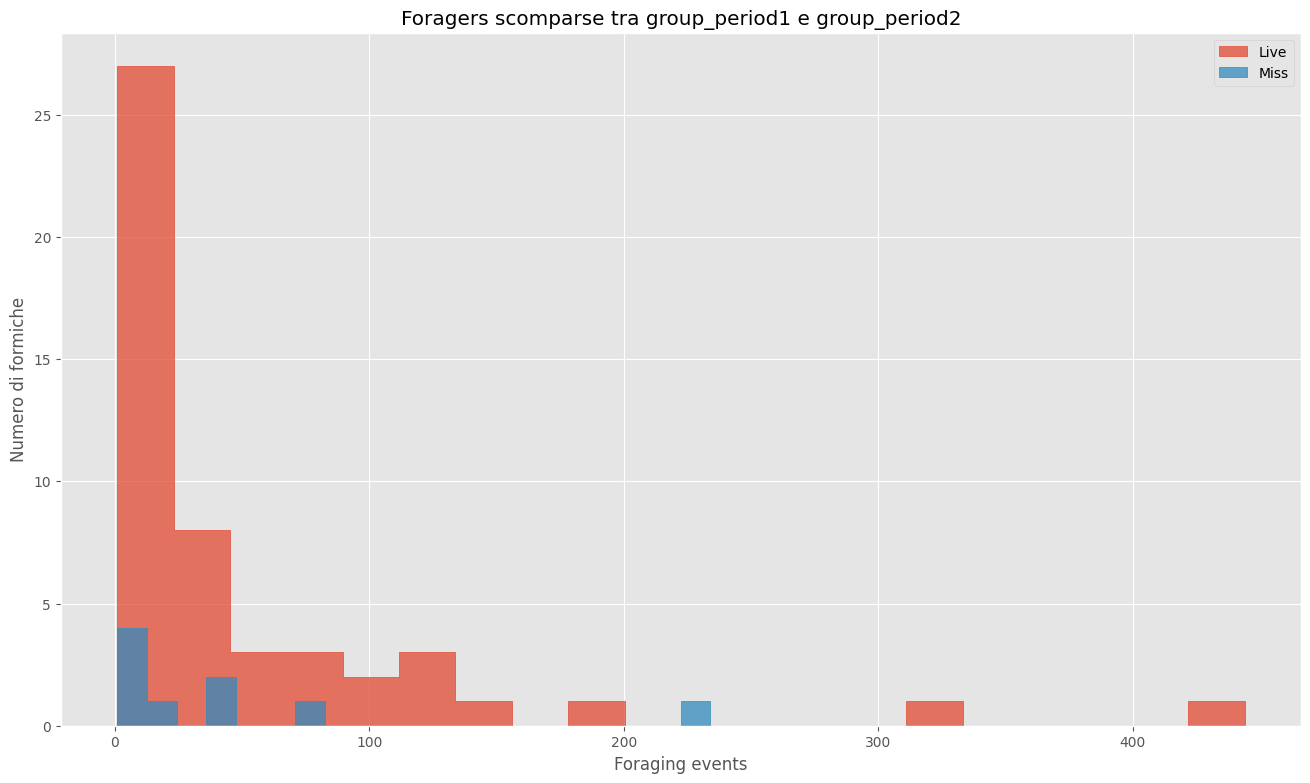


Kolmogorov-Smirnov test otteniamo un p-value di 0.431020980467017, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.12640370105625373, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



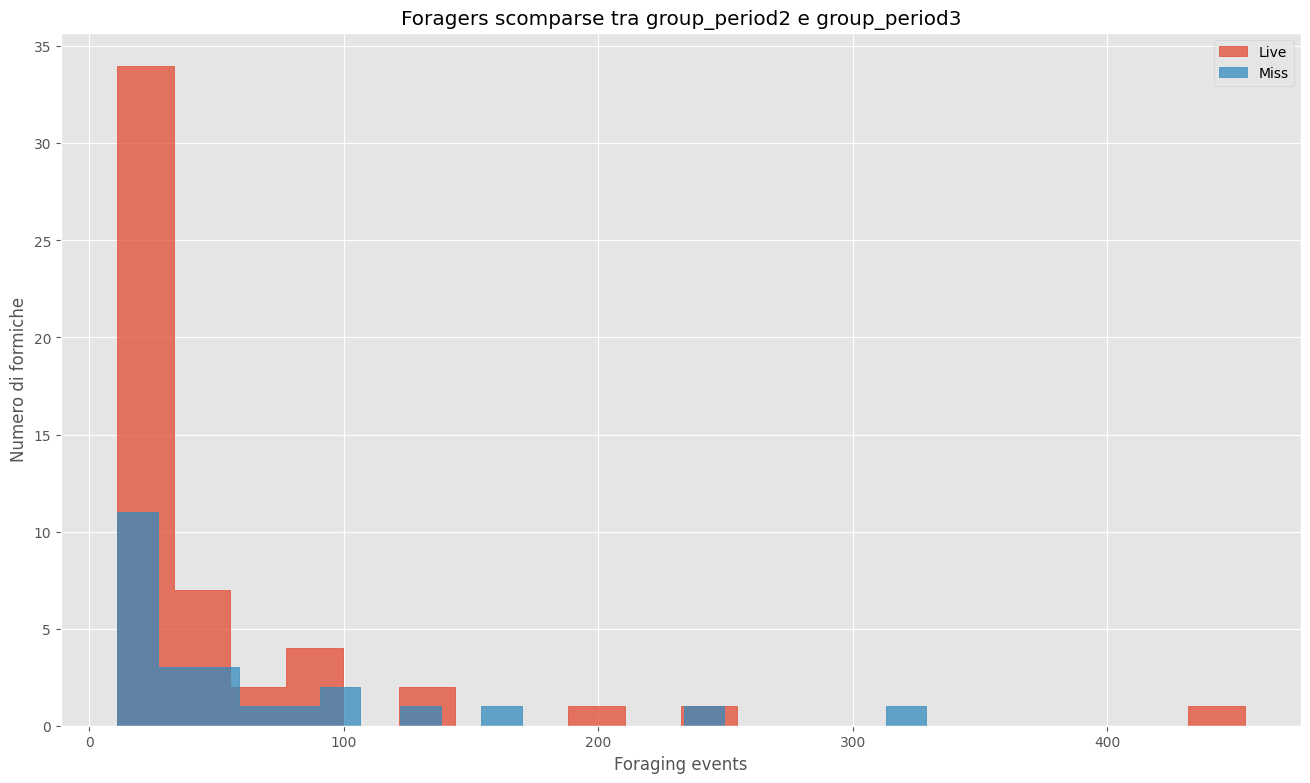


Kolmogorov-Smirnov test otteniamo un p-value di 0.251462327805296, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.047697053752159733, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



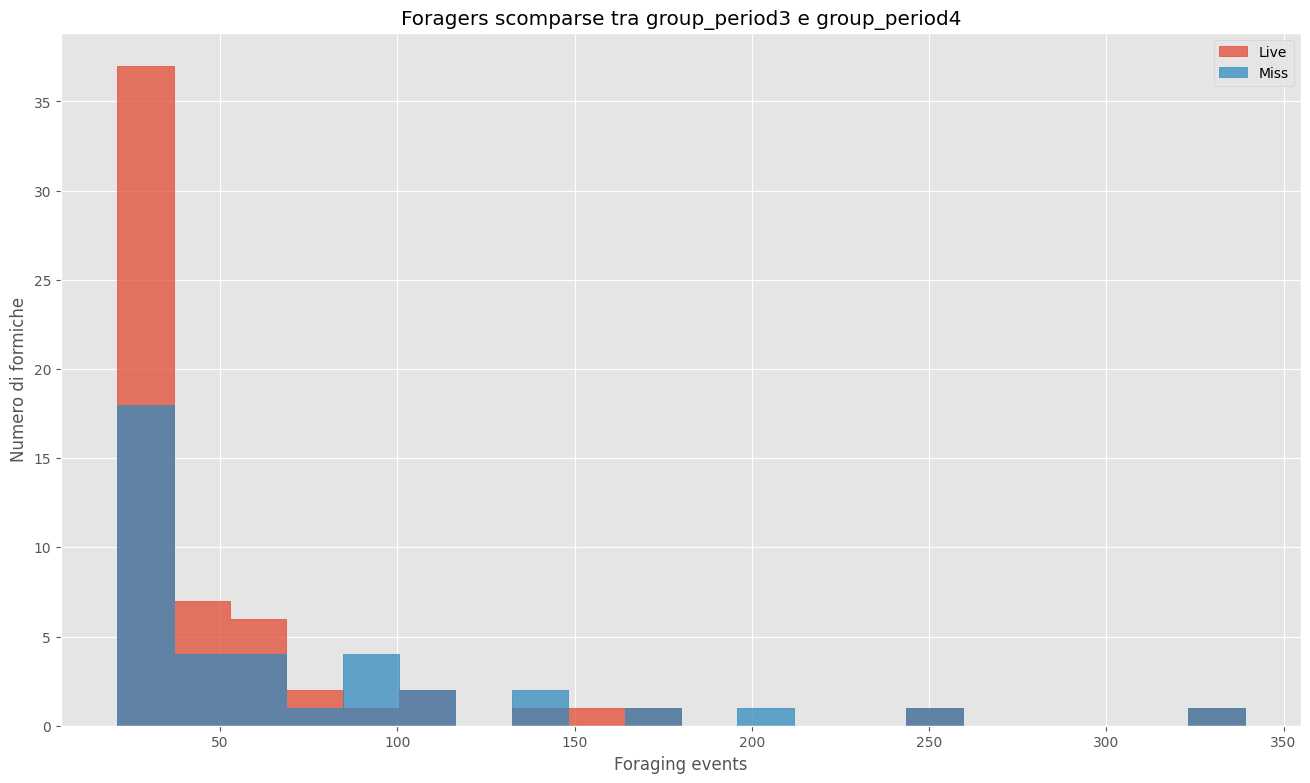

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids) ^ set(miss_ids))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['nb_foraging_events'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['nb_foraging_events'] + 1 + (i * 10)).dropna())

  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(live_values, miss_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('Foraging events')
  plt.title(f'Foragers scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

#### **Analisi in base alle visite al nido**

Kolmogorov-Smirnov test otteniamo un p-value di 0.662556709711141, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.7518296340458492, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



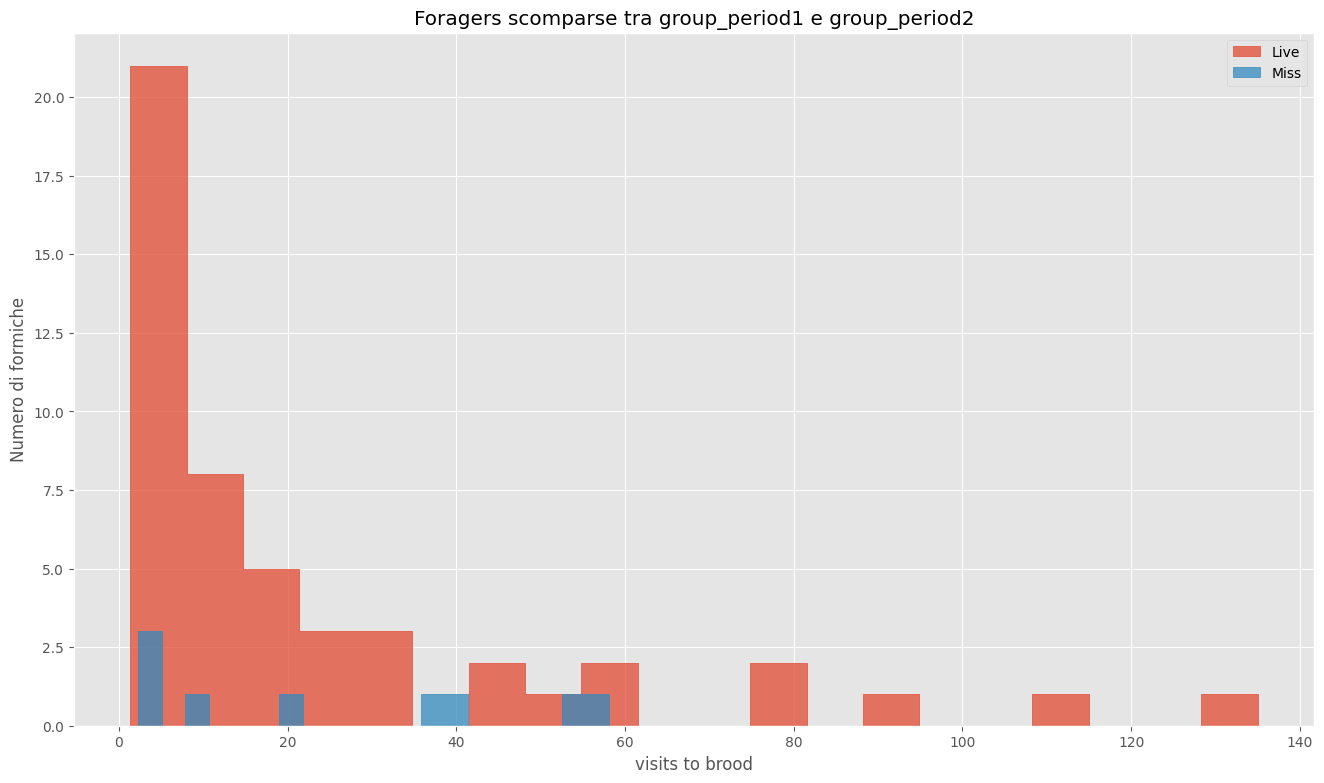


Kolmogorov-Smirnov test otteniamo un p-value di 0.2467421962503079, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.2863786860957638, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



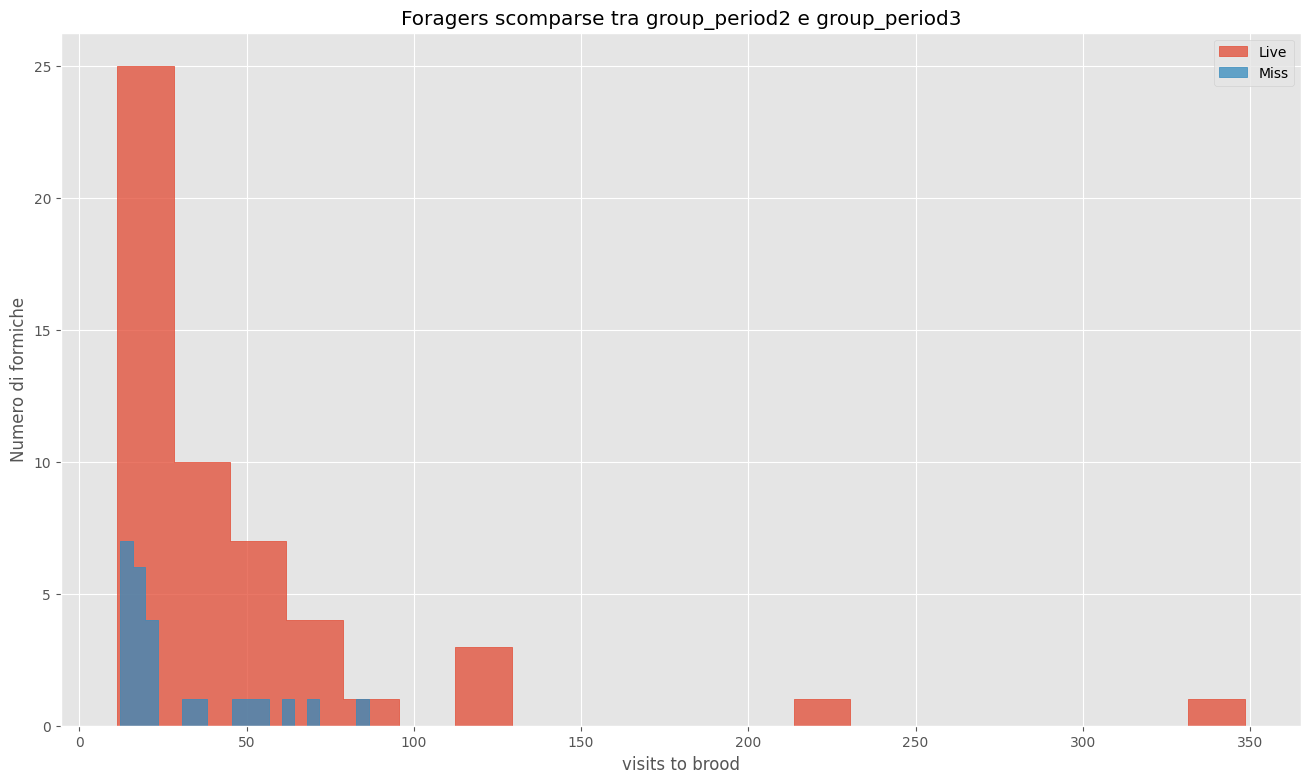


Kolmogorov-Smirnov test otteniamo un p-value di 0.07999840079800162, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.012196684243008987, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



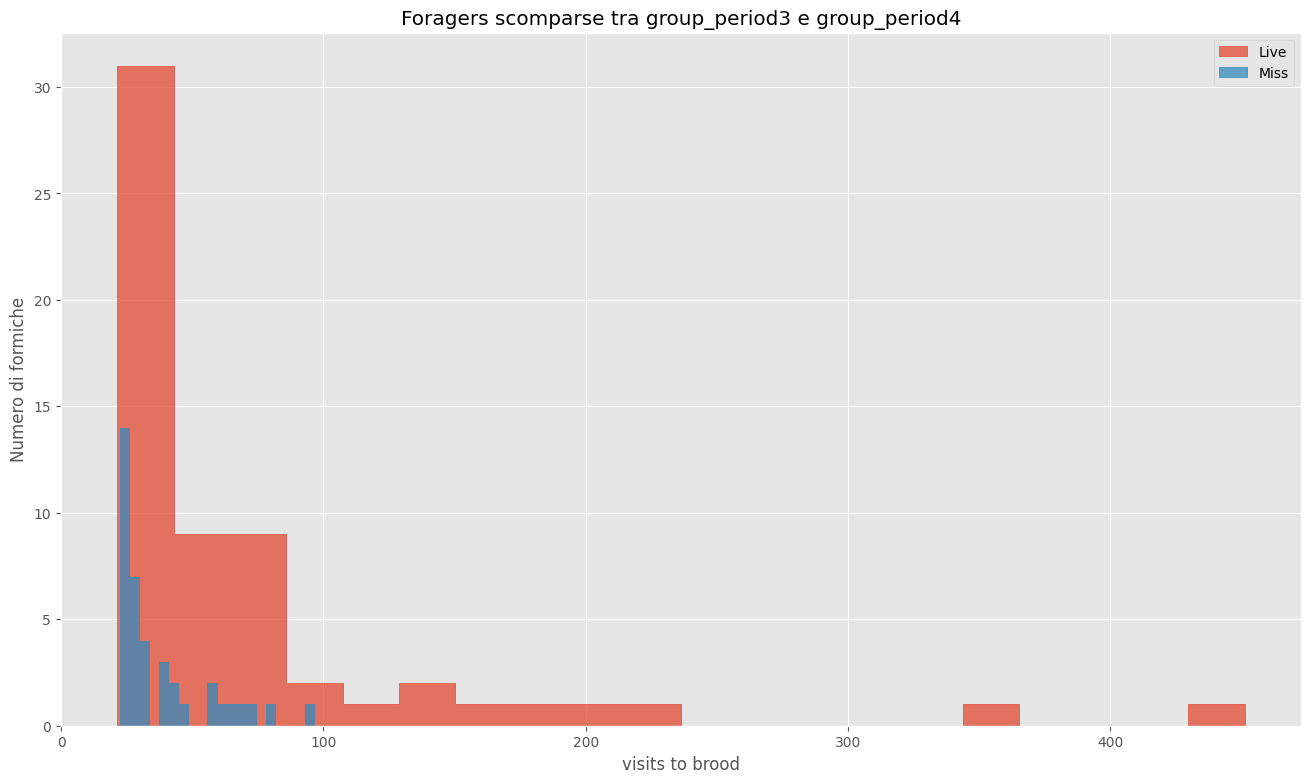

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids) ^ set(miss_ids))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['visits_to_brood'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['visits_to_brood'] + 1 + (i * 10)).dropna())

  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(live_values, miss_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('visits to brood')
  plt.title(f'Foragers scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

#### **Analisi in base alle visite all'entrata**

Kolmogorov-Smirnov test otteniamo un p-value di 0.06387800669998762, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.10009682885123217, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



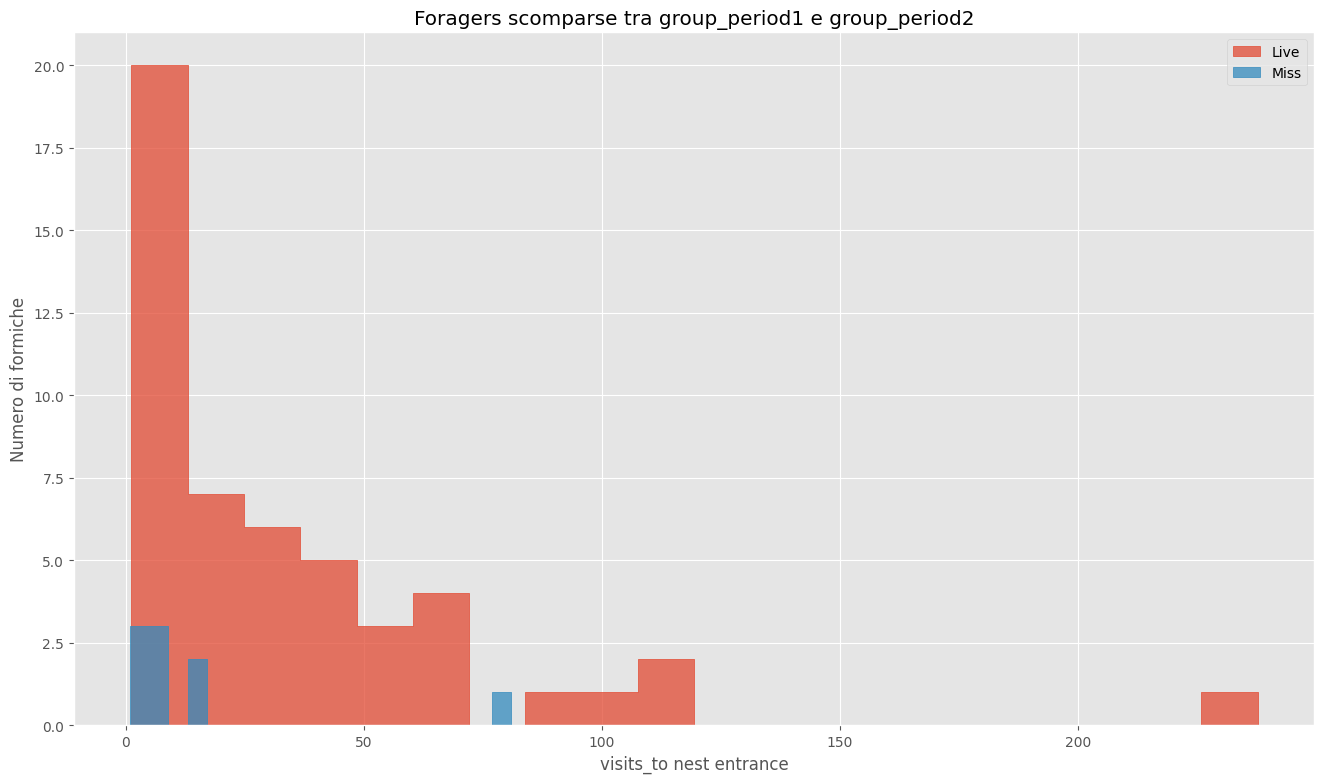


Kolmogorov-Smirnov test otteniamo un p-value di 0.999873005794083, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.9522893495027187, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



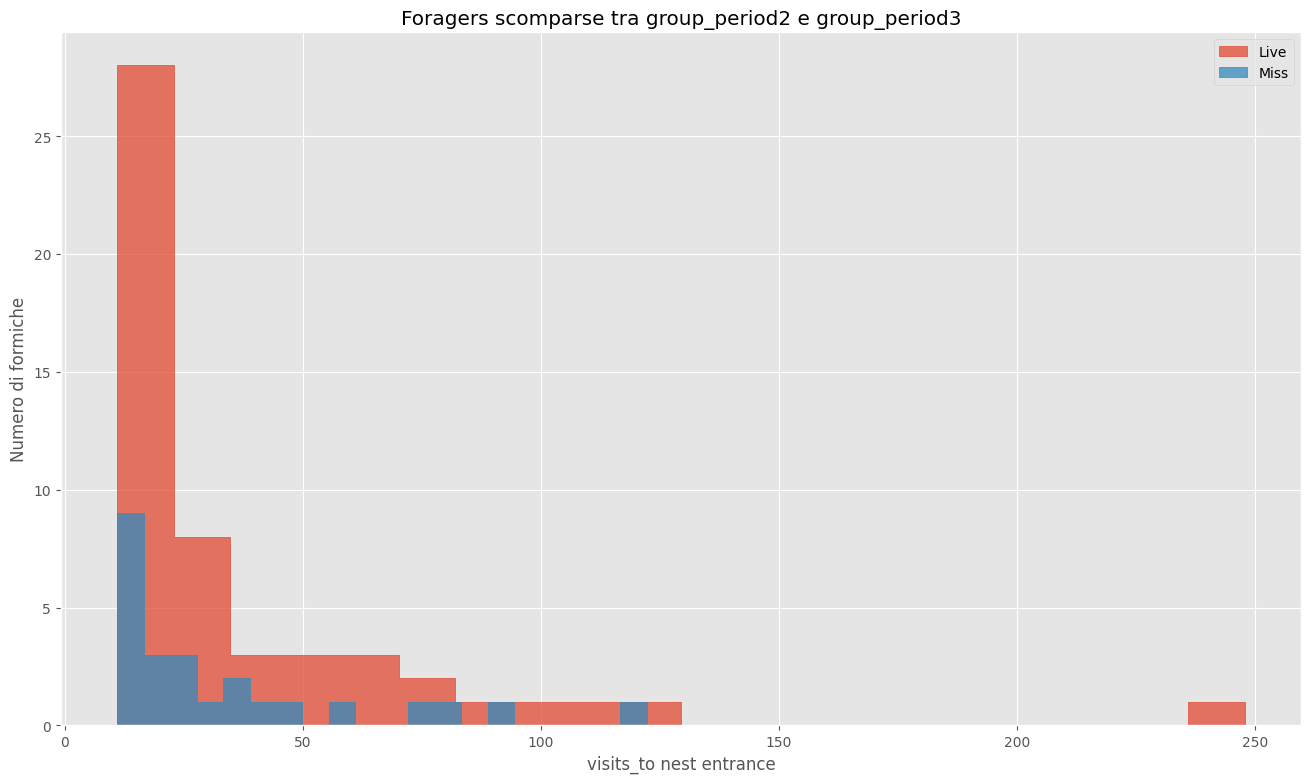


Kolmogorov-Smirnov test otteniamo un p-value di 0.2577880981102511, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.14802242532607818, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



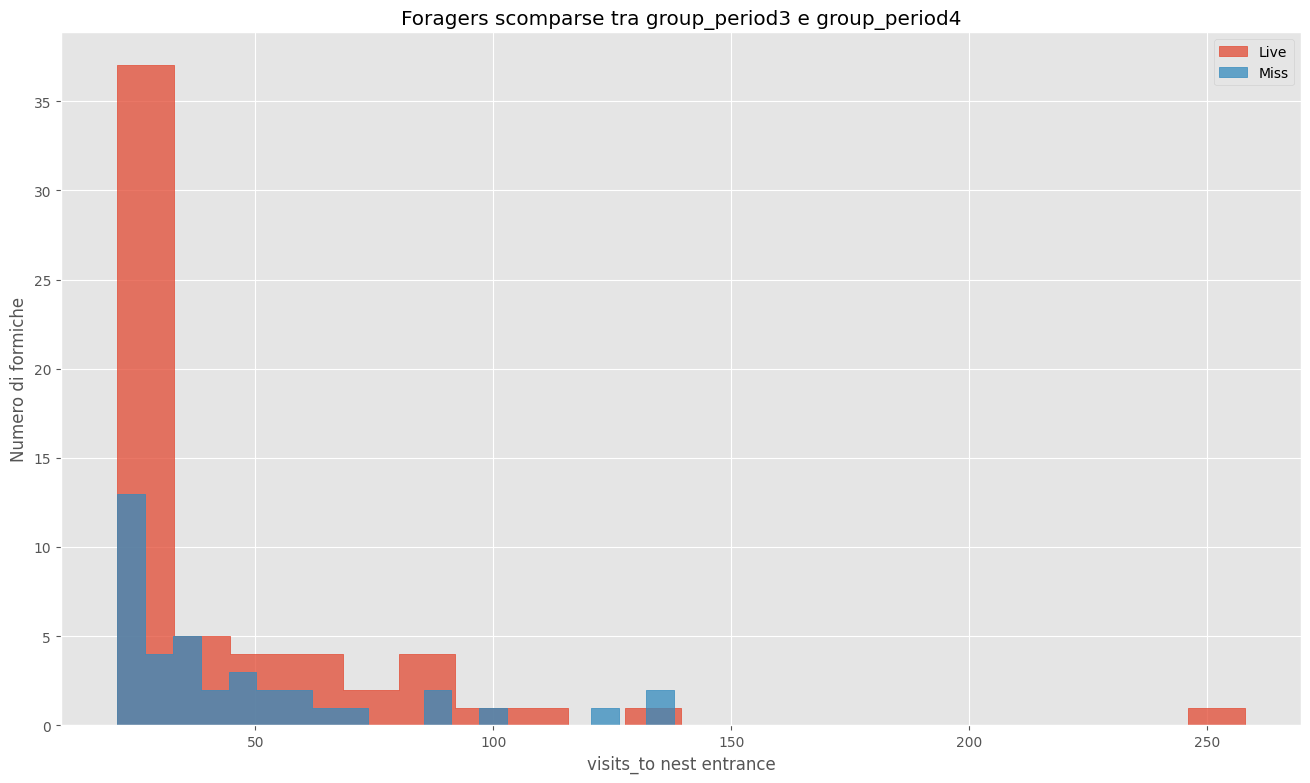

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids) ^ set(miss_ids))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['visits_to_nest_entrance'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['visits_to_nest_entrance'] + 1 + (i * 10)).dropna())

  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(live_values, miss_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('visits_to nest entrance')
  plt.title(f'Foragers scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

#### **Analisi in base alla spazzatura**

Kolmogorov-Smirnov test otteniamo un p-value di 0.5572613961924336, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.19844553429337797, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



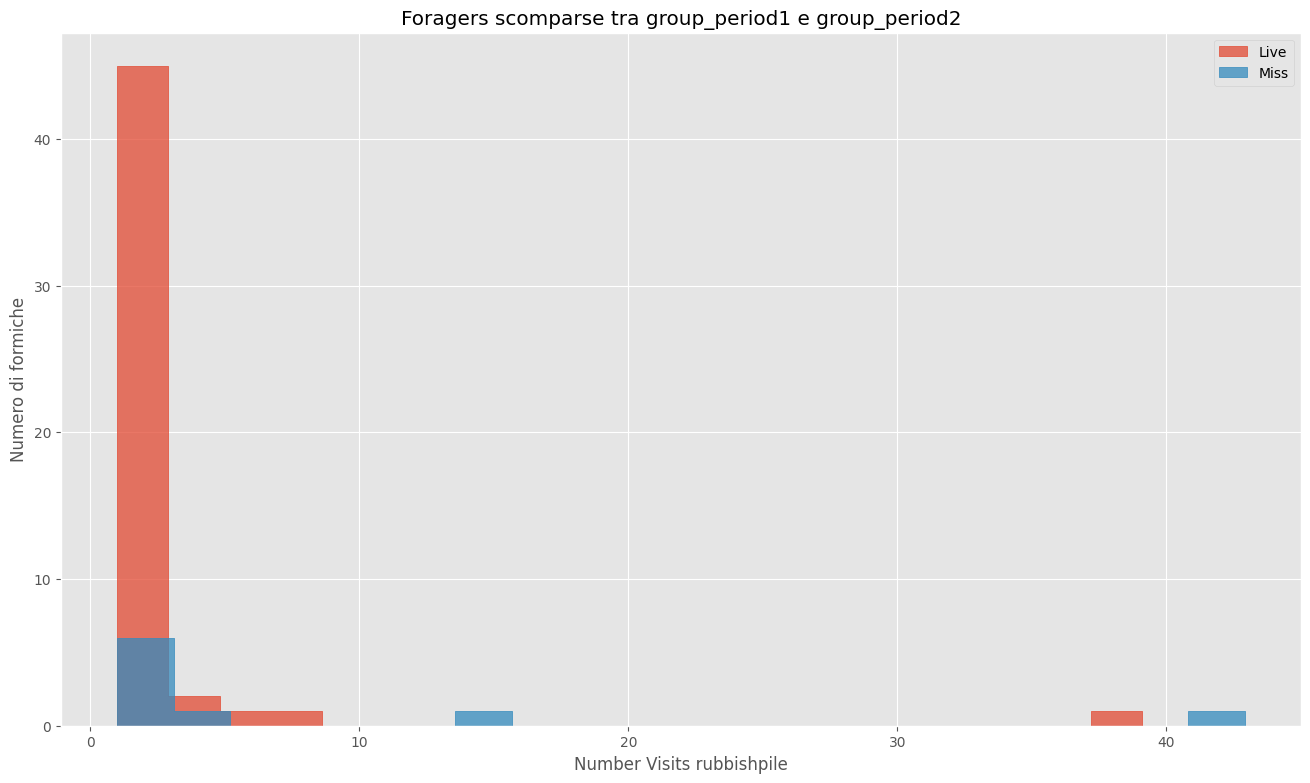


Kolmogorov-Smirnov test otteniamo un p-value di 0.11492855672085331, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.04532172888003947, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



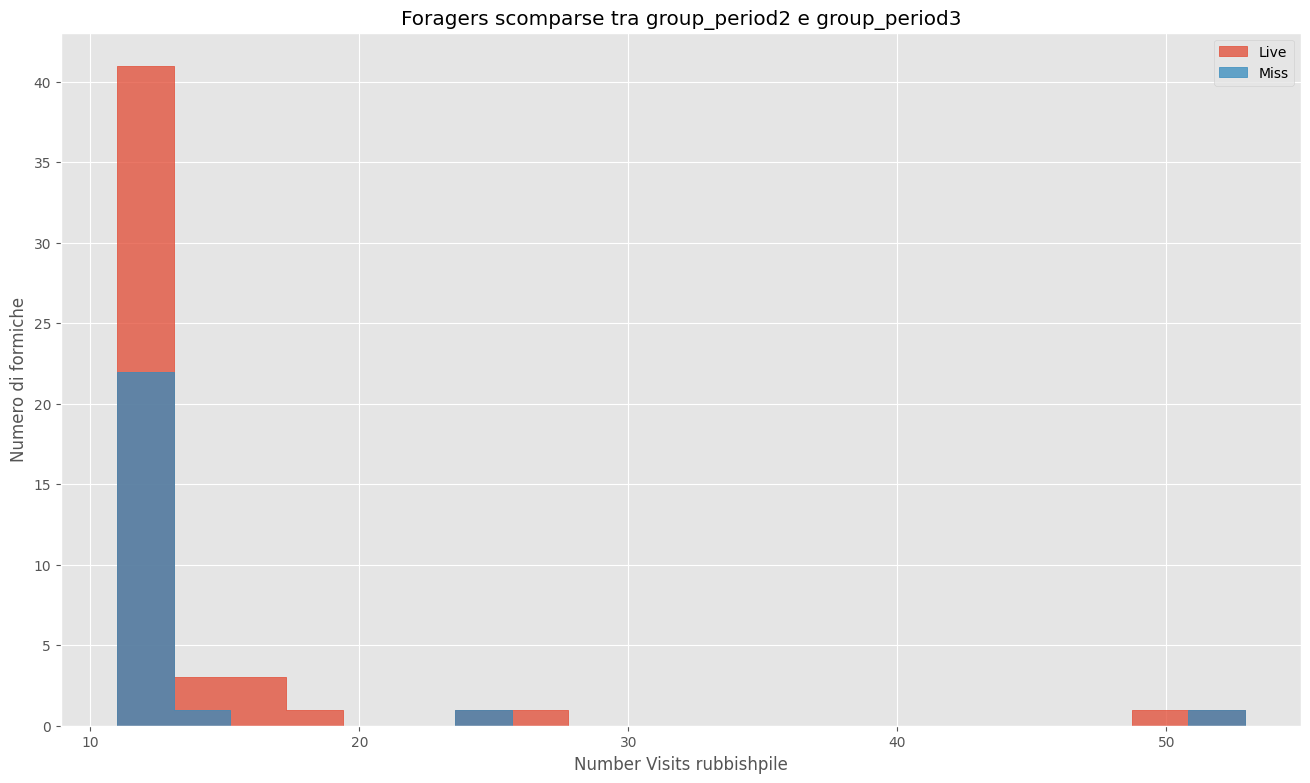


Kolmogorov-Smirnov test otteniamo un p-value di 0.5157884114571568, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.18523334221257548, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



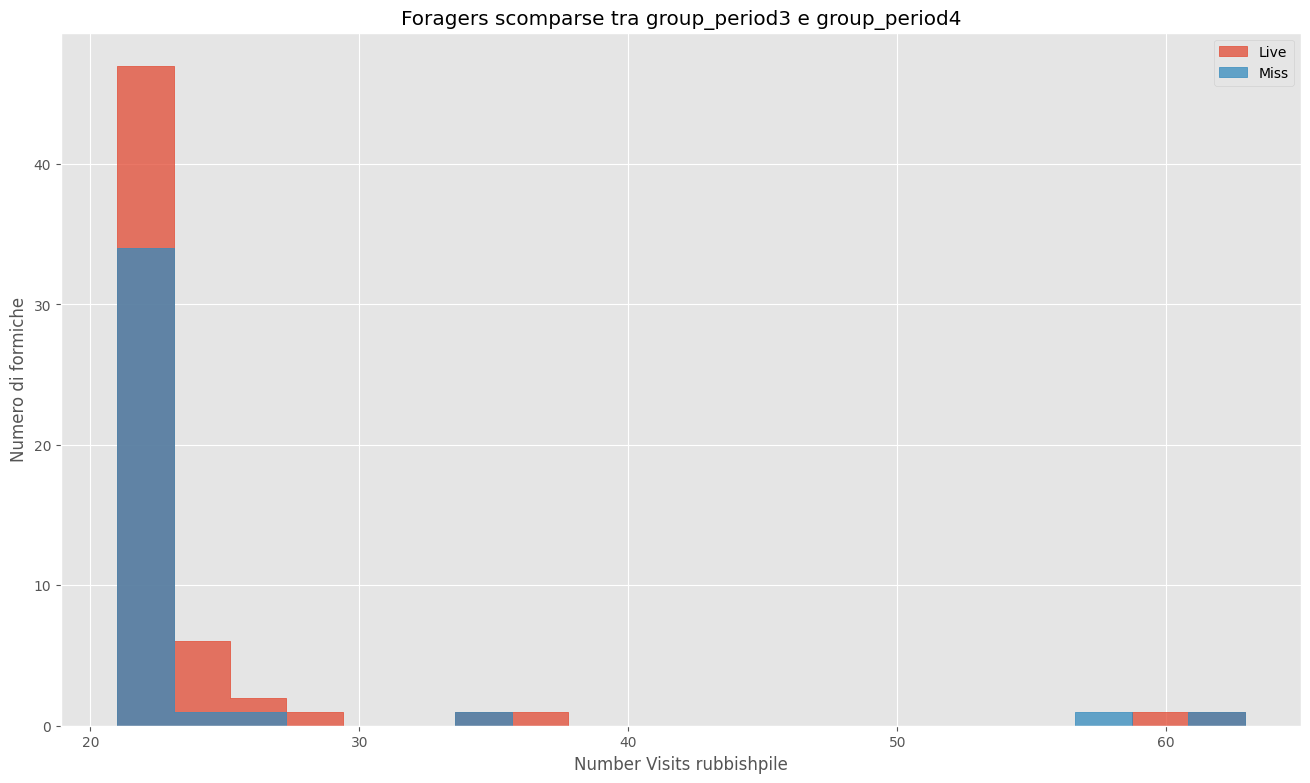

In [ ]:
miss_ids = []
for i in range(len(list_periods) - 1):
  foragres_ids = list(ants_period_groups.query(f"{list_periods[i]} == 'F'").index)

  missing_ants = ants_period_groups.query(f"{list_periods[i]} == 'F' and {list_periods[i + 1]} == ' '")[[list_periods[i], list_periods[i + 1]]]

  miss_ids = list(missing_ants.index) + miss_ids
  live_ids = list(set(foragres_ids) ^ set(miss_ids))

  live_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(live_ids)]['visits_to_rubbishpile'] + 1 + (i * 10)).dropna())
  miss_values = np.array((ants_data_no_queen_df[ants_data_no_queen_df.index.isin(miss_ids)]['visits_to_rubbishpile'] + 1 + (i * 10)).dropna())

  statistic, p_value = ks_2samp(miss_values, live_values)
  print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  U, p_value = ranksums(live_values, miss_values)
  print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
  test_hypothesis_check(p_value, alpha)
  print()

  plt.figure(figsize=(16, 9))

  sns.histplot(live_values, stat='count', element="step", bins=20, label='Live')
  sns.histplot(miss_values, stat='count', element="step", bins=20, label='Miss')

  plt.ylabel('Numero di formiche')
  plt.xlabel('Number Visits rubbishpile')
  plt.title(f'Foragers scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.legend()
  plt.show();
  print()

### **Analisi del passaggio di gruppo**

In questa sezione siamo interessati ad analizzare le formiche che cambiano gruppo tra i vari periodi.

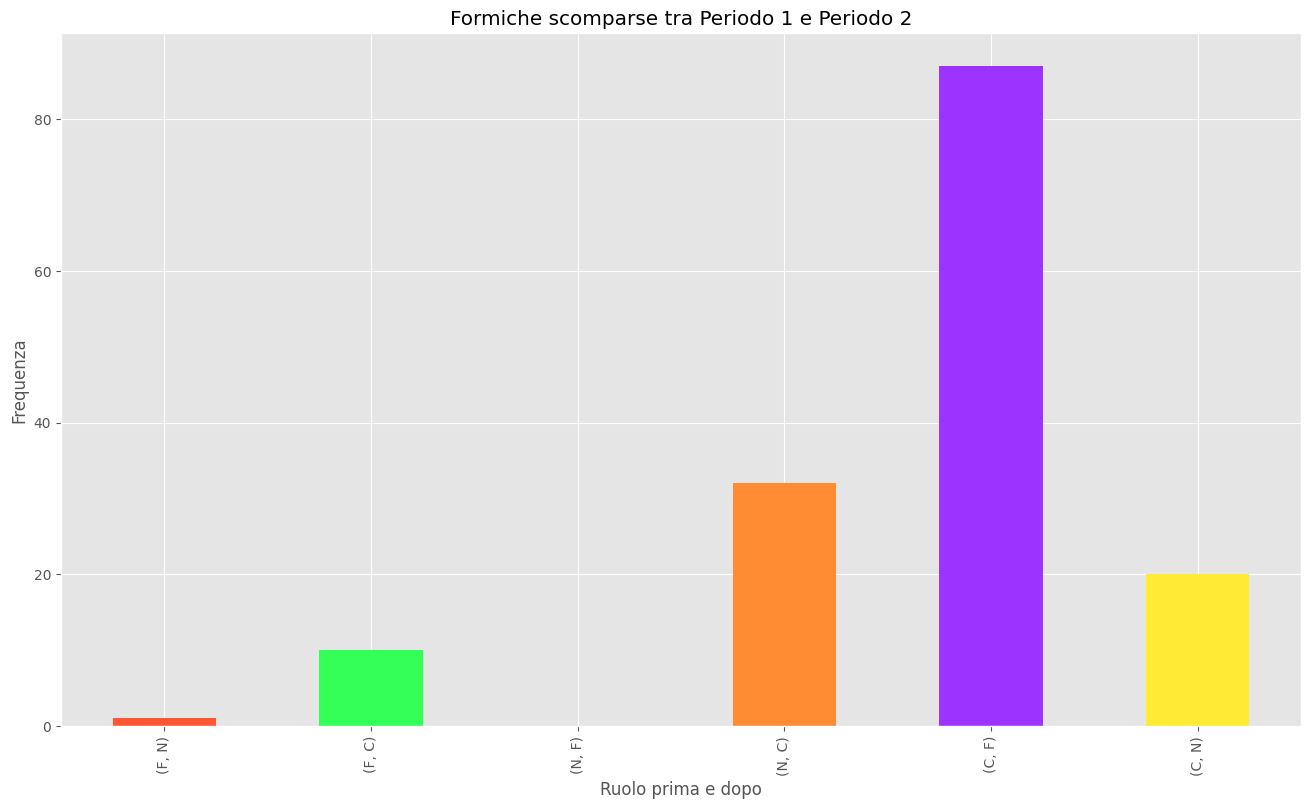

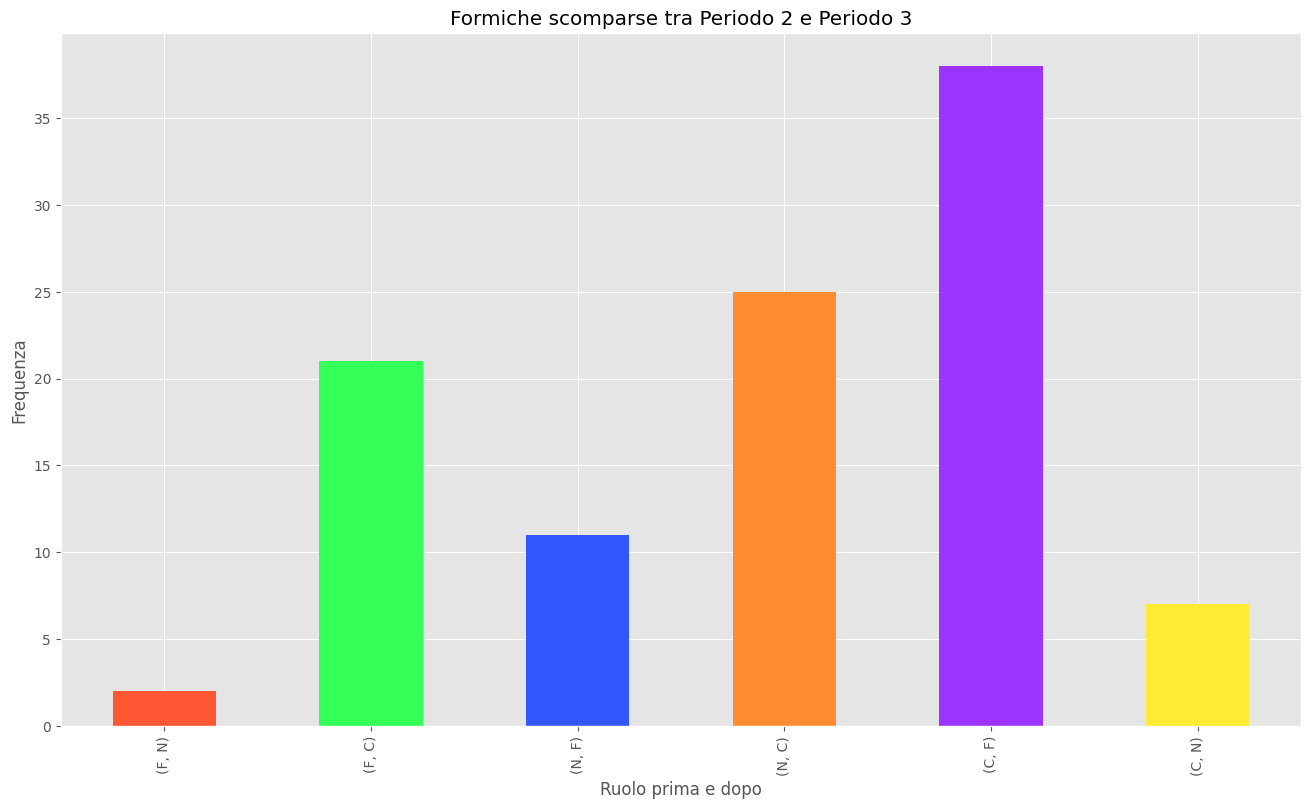

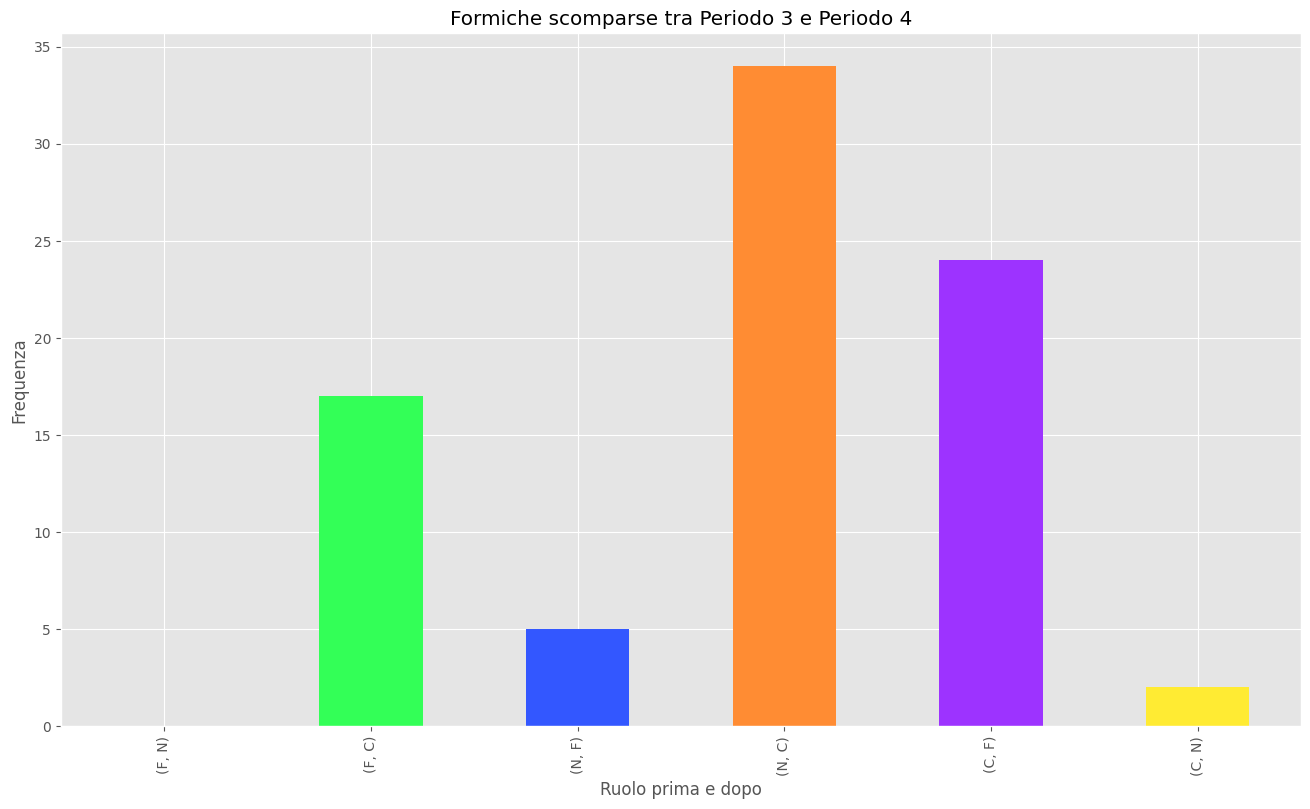

In [ ]:
roles = ['F', 'N', 'C']
list_of_roles = list(product(roles, roles))

index = []
cols = []

for tup in list_of_roles:
  if tup[0] != tup[1]:
    cols.append(tup)
for col in colonies:
  for i in range(len(list_periods) - 1):
    index.append((f"Colony {col}", list_periods[i]))

change_by_periods = pd.DataFrame(index=pd.Index(index), columns=cols)

for col in colonies:
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{days[day_idx]}.graphml"
  graph = ig.Graph.Read_GraphML(path)
  data = pd.DataFrame.from_dict({v.index: v.attributes() for v in graph.vs}, orient='index').set_index('id')

  del graph

  for i in range(len(list_periods) - 1):
    roles_dict = {}
    for tup in list_of_roles:
      if tup[0] != tup[1]:
        roles_dict[tup] = data.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").shape[0]

    change_by_periods.loc[(f"Colony {col}", list_periods[i])] = roles_dict


change_by_periods = change_by_periods.reset_index().groupby('level_1').sum().reset_index()
change_by_periods['Period'] = change_by_periods['level_1']
# change_by_periods['Colony'] = change_by_periods['level_0']
change_by_periods = change_by_periods.set_index('Period')
change_by_periods = change_by_periods.drop(['level_0', 'level_1'], axis=1)

change_by_periods

j = 1
for i, row in change_by_periods.iterrows():
  plt.figure(figsize=(16, 9))

  row.plot(kind='bar', color=['#FF5733', '#33FF57', '#3357FF', '#FF8C33', '#9D33FF', '#FFEB33'])
  plt.xlabel("Ruolo prima e dopo")
  plt.ylabel('Frequenza')
  plt.title(f'Formiche scomparse tra Periodo {j} e Periodo {j + 1}')
  j+= 1
  plt.show();

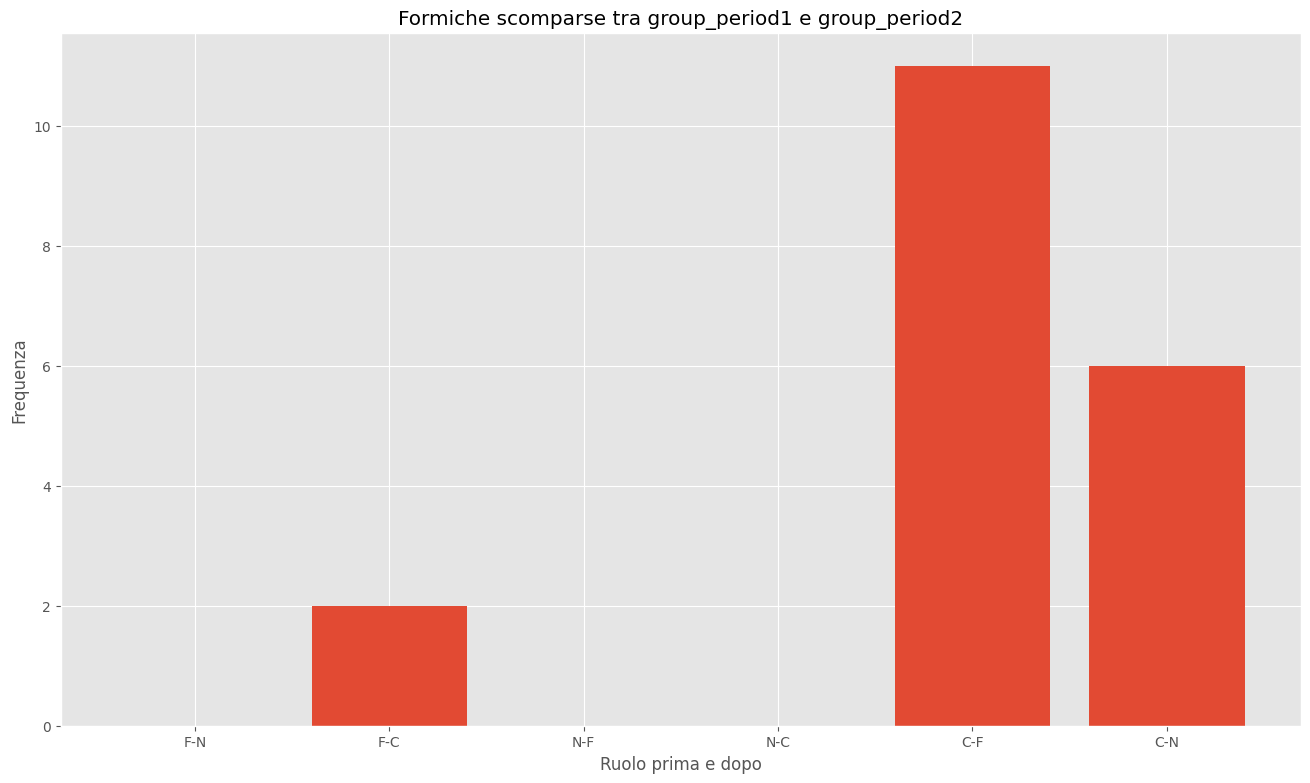

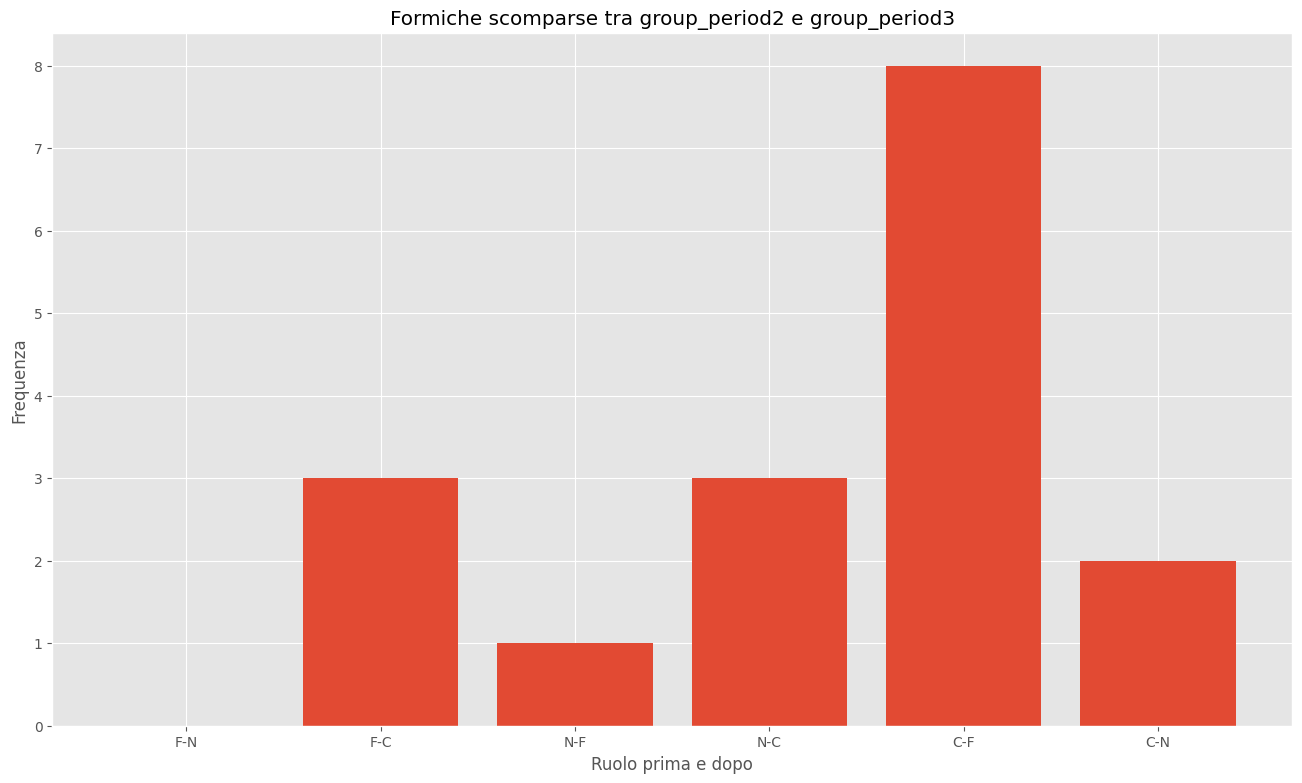

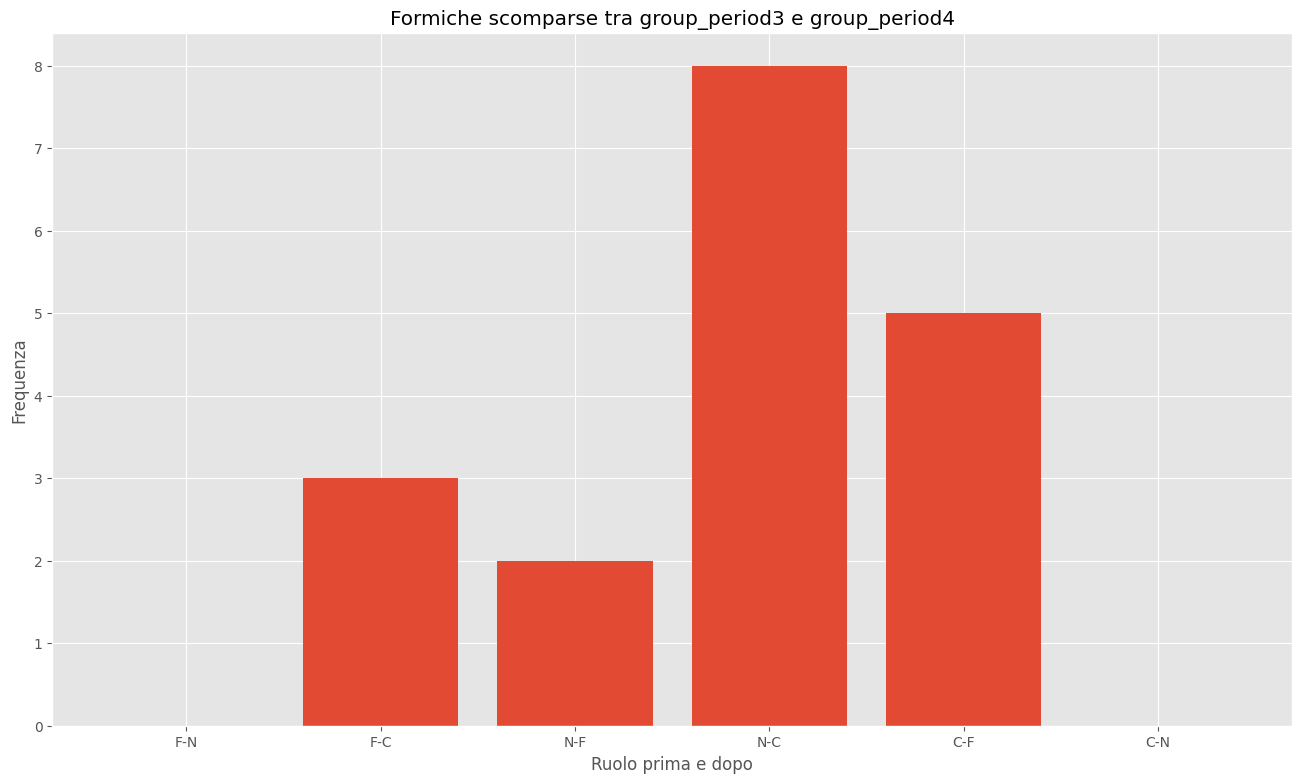

In [ ]:
for i in range(len(list_periods) - 1):
  roles_dict = {}
  for tup in list_of_roles:
    if tup[0] != tup[1]:
      roles_dict[tup] = ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").shape[0]

  labels = [f"{k[0]}-{k[1]}" for k in list(roles_dict.keys())]

  plt.figure(figsize=(16, 9))

  plt.bar(labels, list(roles_dict.values()))
  plt.xlabel("Ruolo prima e dopo")
  plt.ylabel('Frequenza')
  plt.title(f'Formiche scomparse tra {list_periods[i]} e {list_periods[i + 1]}')
  plt.show();

  print()

#### **Analisi delle età**

Le formiche che cambiano gruppo hanno un età maggiore rispetto a quelle del gruppo a cui appartenevano in precedenza?

Kolmogorov-Smirnov test otteniamo un p-value di 0.9605208782501218, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.7594628653799336, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



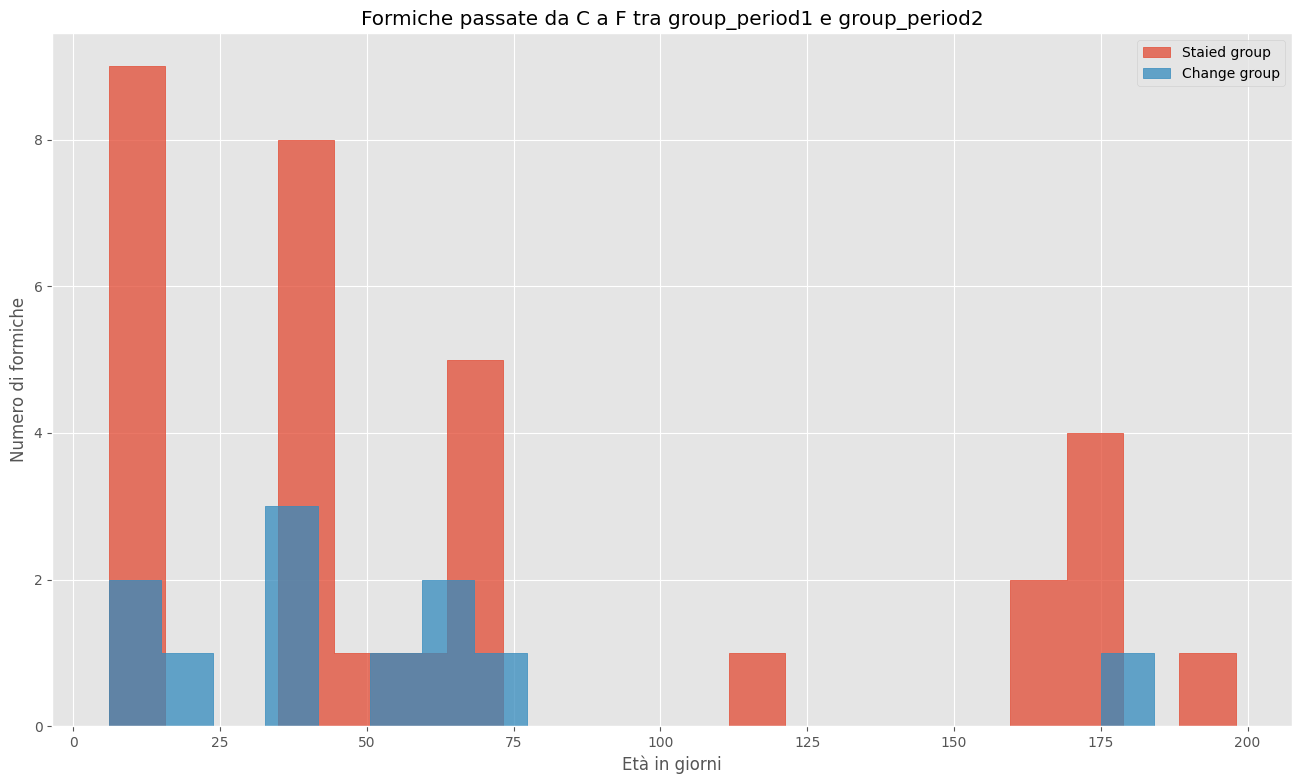


Kolmogorov-Smirnov test otteniamo un p-value di 0.5464114832535886, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.49490790441001786, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



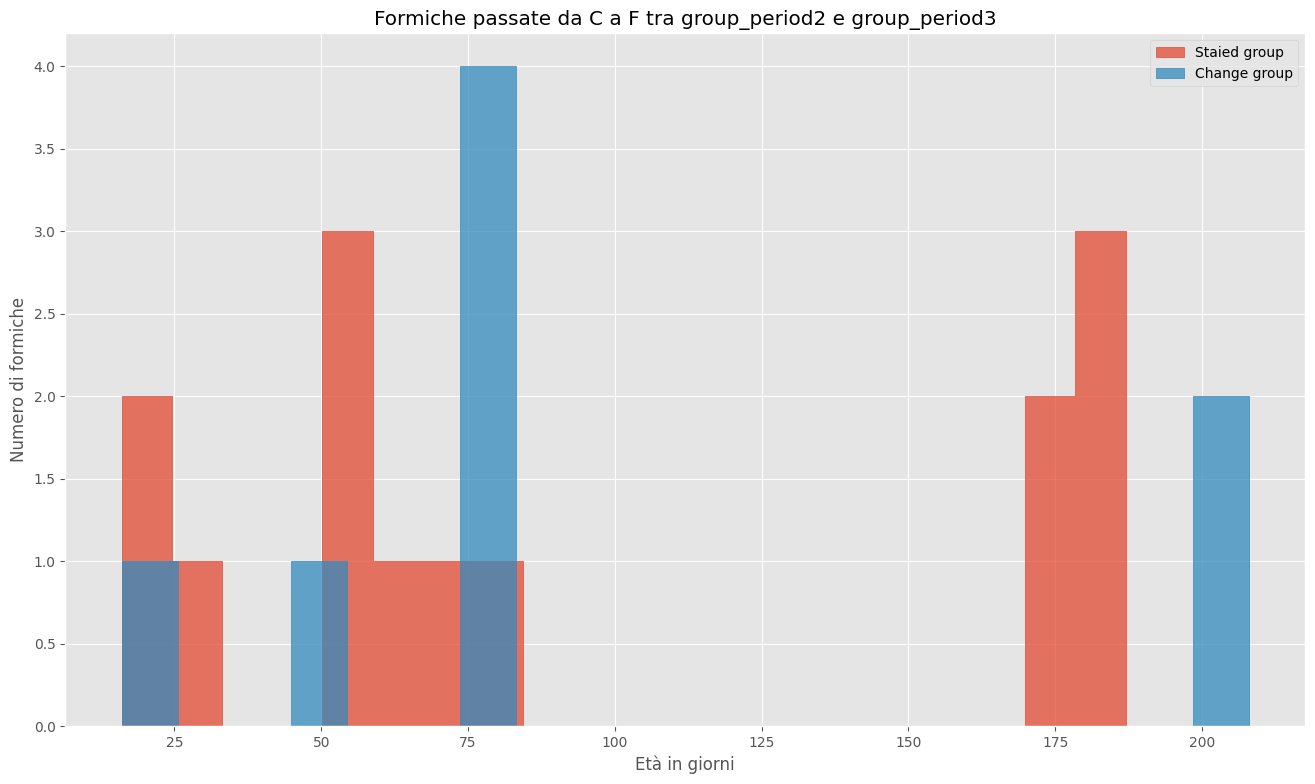


Kolmogorov-Smirnov test otteniamo un p-value di 0.9249145591250854, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.8581847161443135, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



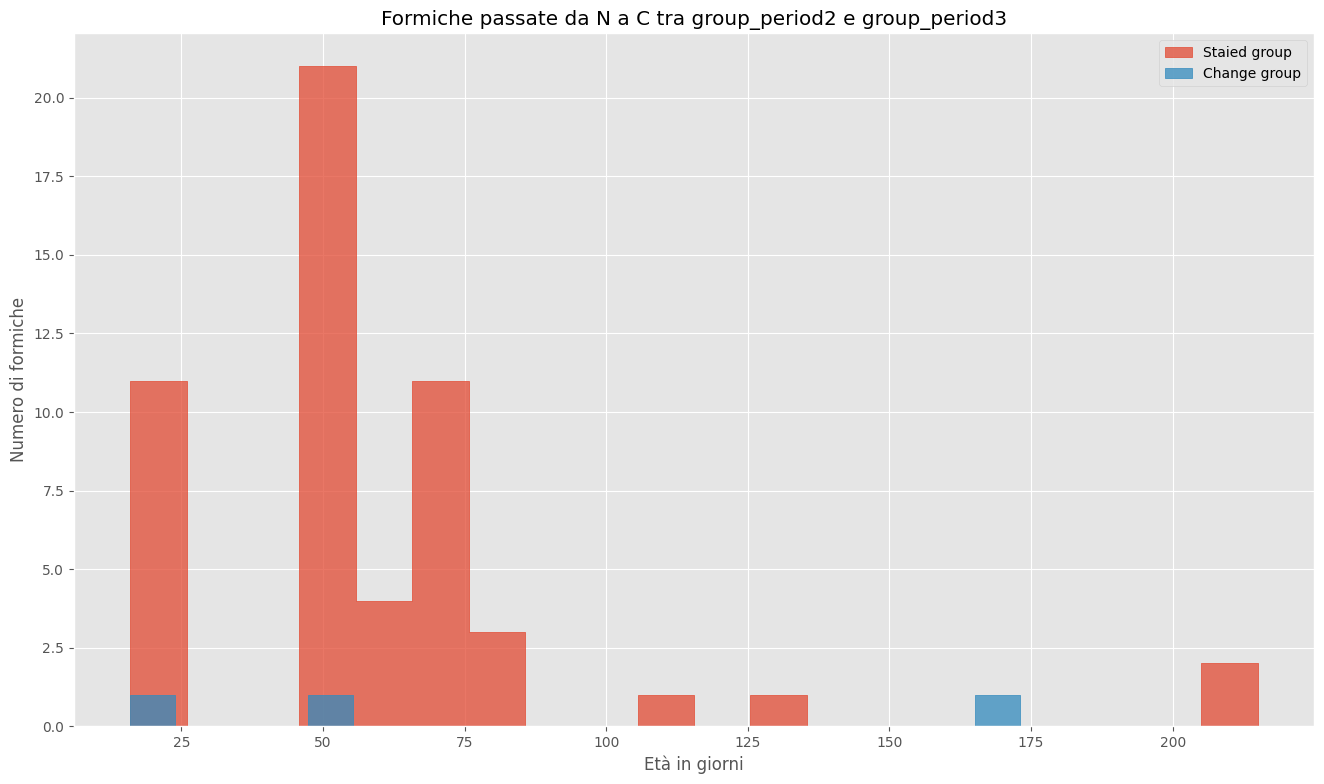


Kolmogorov-Smirnov test otteniamo un p-value di 0.4996114996114996, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.6605492052016729, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



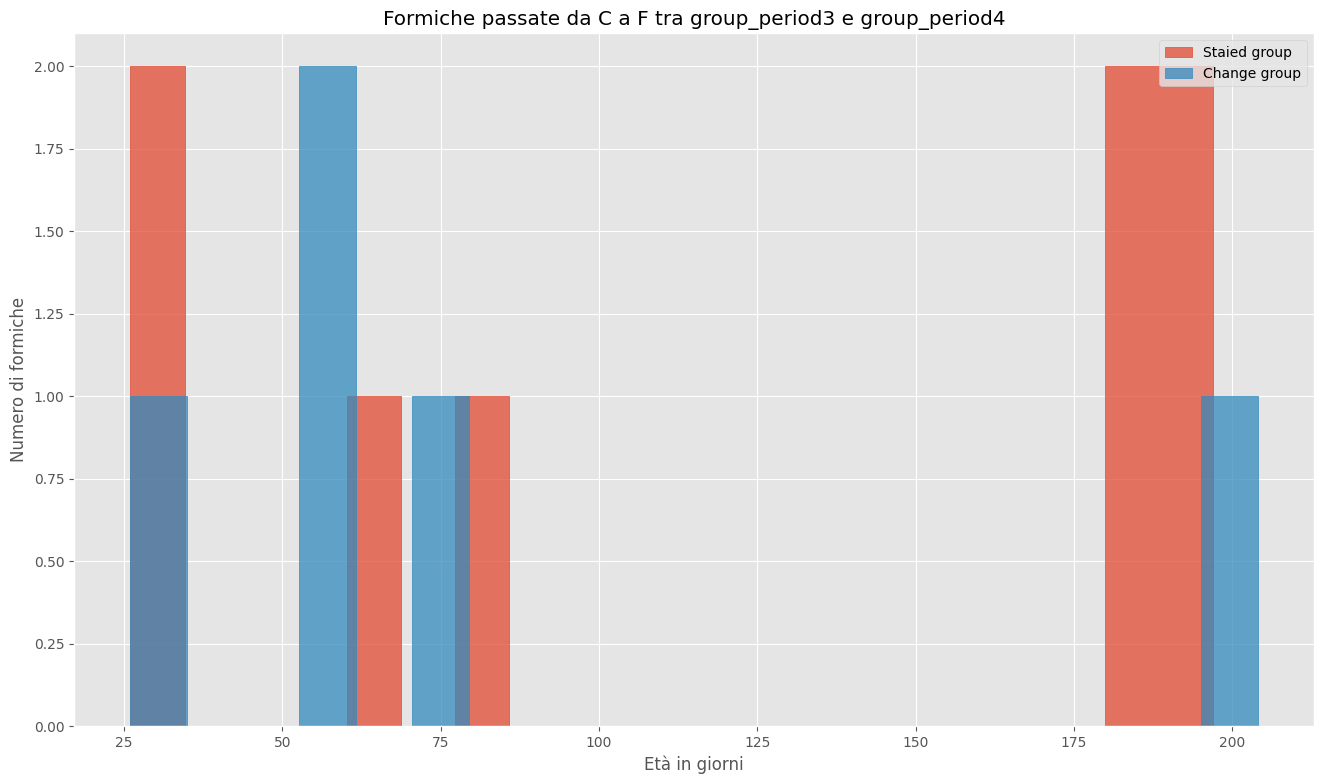


Kolmogorov-Smirnov test otteniamo un p-value di 0.06214130044134942, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.02423698189809099, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



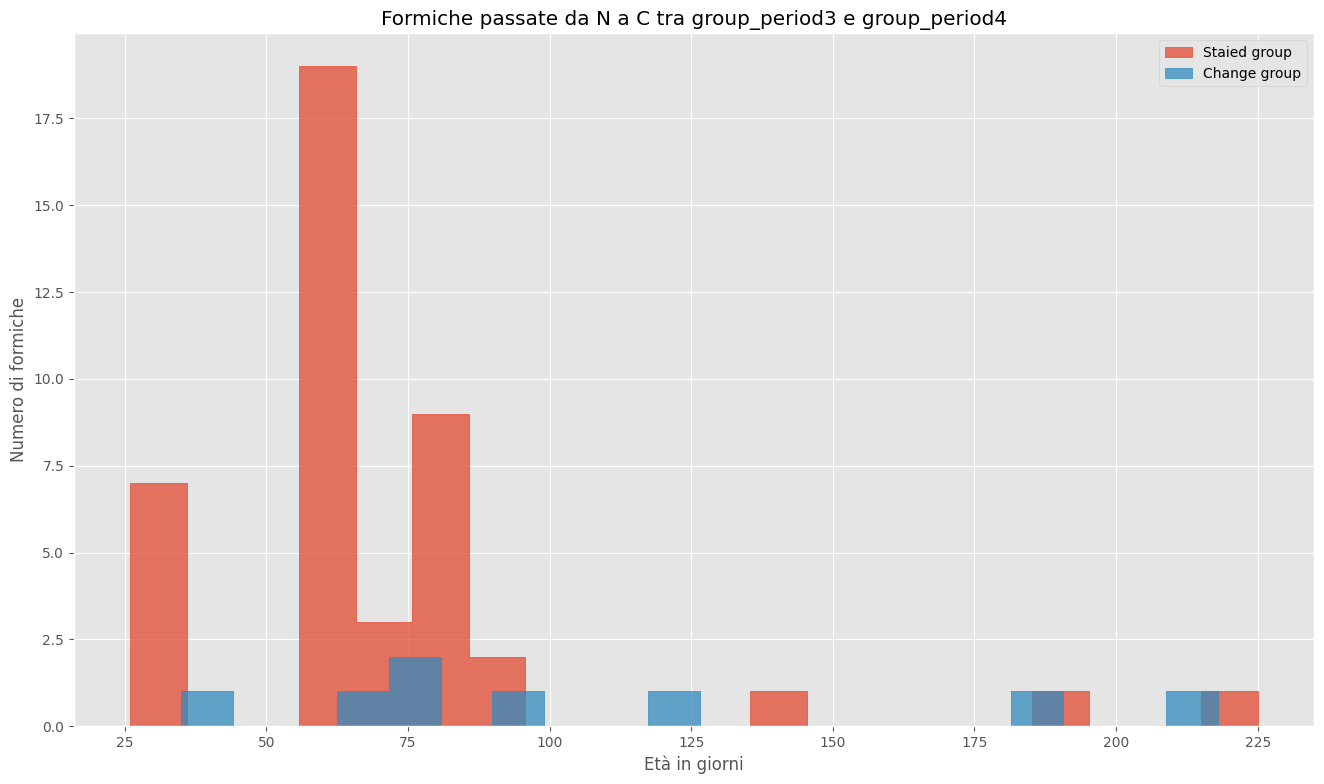

In [ ]:
for i in range(len(list_periods) - 1):
  for tup in [('C', 'F'), ('N', 'C')]:
    changes_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").index)
    if len(changes_ids) > 0:
      start_group_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}'").index)

      start_group_ids = list(set(start_group_ids).difference(set(changes_ids)))

      start_group_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(start_group_ids)]['age(days)'] + 1 + (i * 10))
      changes_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(changes_ids)]['age(days)'] + 1 + (i * 10))


      statistic, p_value = ks_2samp(changes_values, start_group_values)
      print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
      test_hypothesis_check(p_value, alpha)
      print()

      U, p_value = ranksums(start_group_values, changes_values)
      print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
      test_hypothesis_check(p_value, alpha)
      print()

      plt.figure(figsize=(16, 9))

      sns.histplot(start_group_values, stat='count', element="step", bins=20, label='Staied group')
      sns.histplot(changes_values, stat='count', element="step", bins=20, label='Change group')

      plt.ylabel('Numero di formiche')
      plt.xlabel('Età in giorni')
      plt.title(f'Formiche passate da {tup[0]} a {tup[1]} tra {list_periods[i]} e {list_periods[i + 1]}')
      plt.legend()
      plt.show();
      print()

Le formiche che hanno cambiato gruppo hanno un età simile a quella del gruppo in cui sono andate?

Kolmogorov-Smirnov test otteniamo un p-value di 0.4267064686046757, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.19557752906435089, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



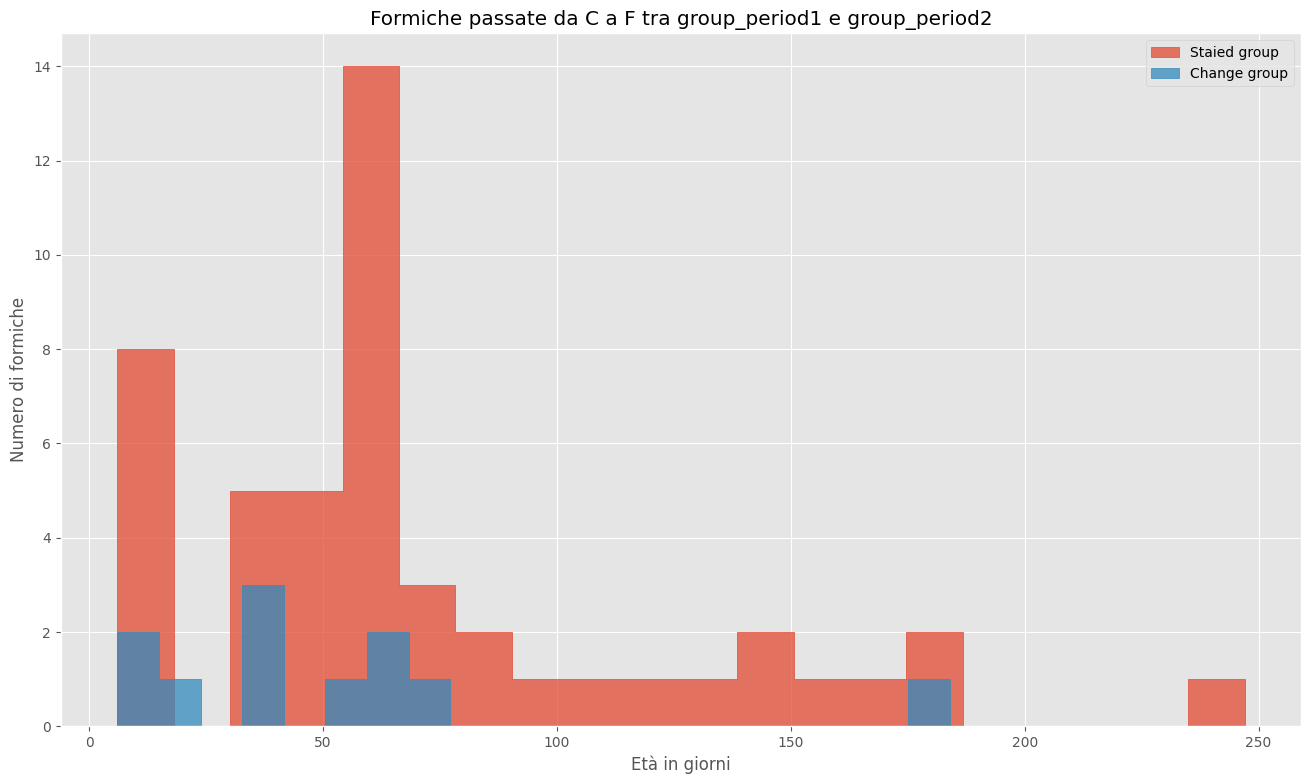


Kolmogorov-Smirnov test otteniamo un p-value di 0.5428322582766143, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.2616164678785774, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



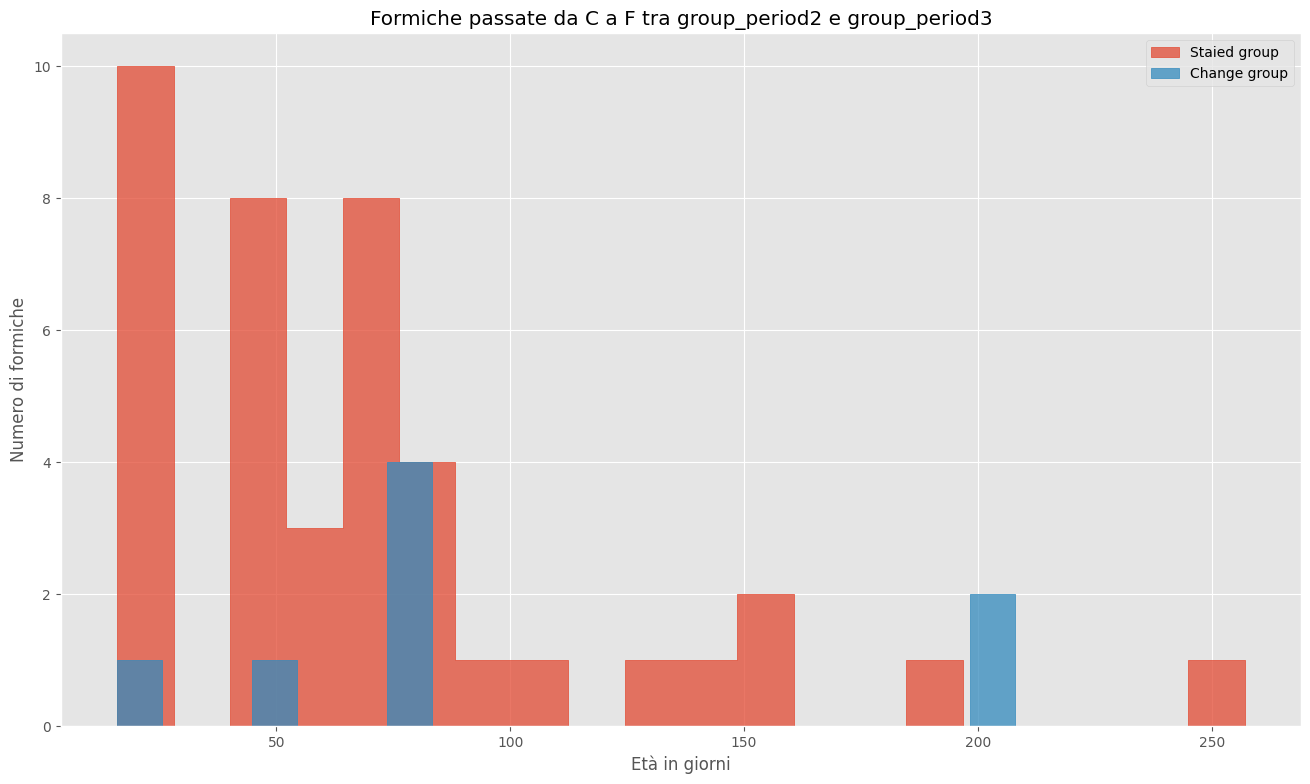


Kolmogorov-Smirnov test otteniamo un p-value di 0.9580419580419582, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.4468728207108308, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



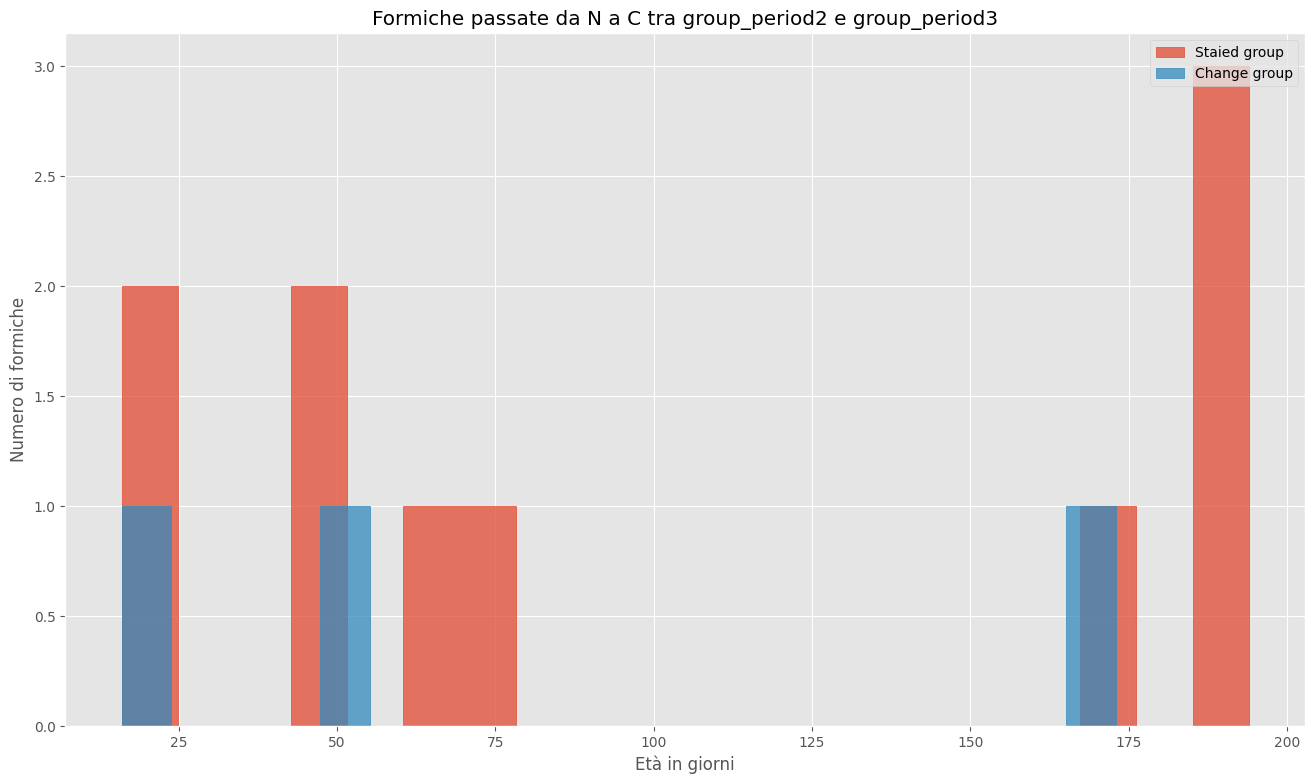


Kolmogorov-Smirnov test otteniamo un p-value di 0.521101784259679, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.5706371162910626, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



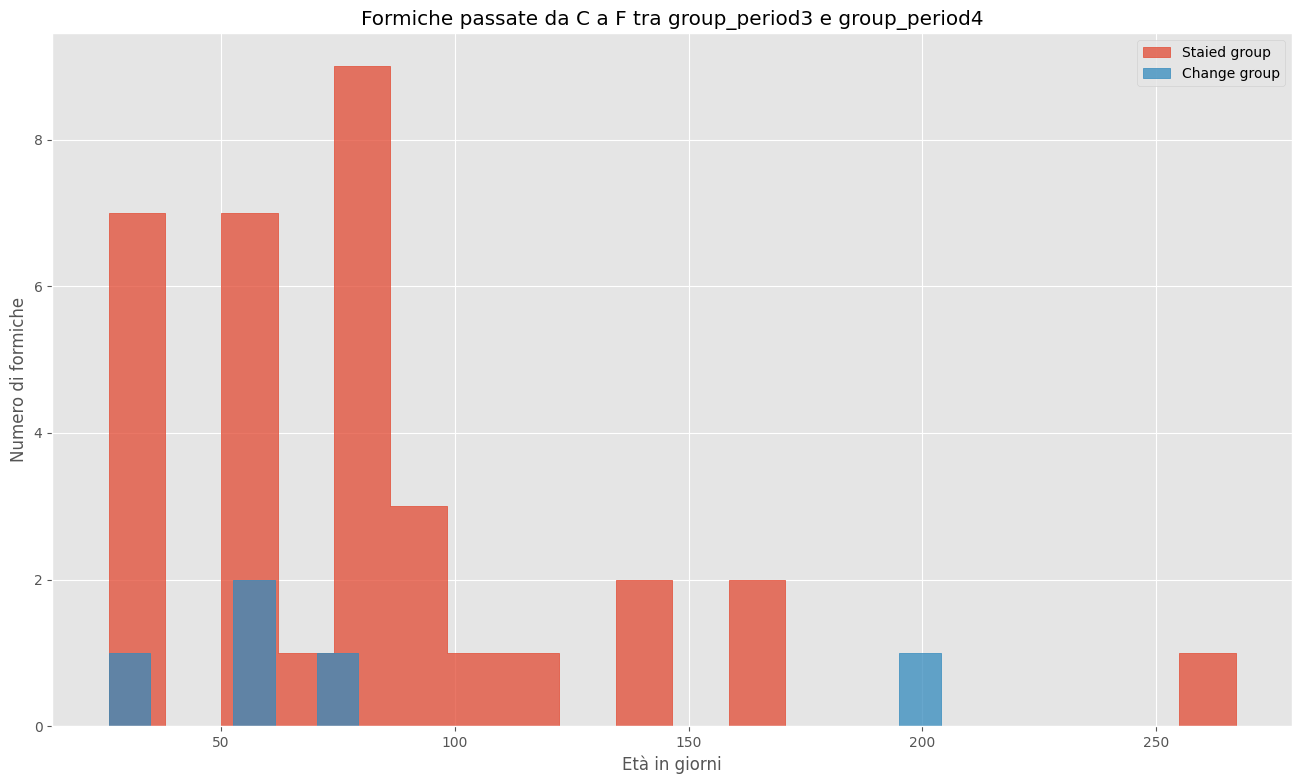


Kolmogorov-Smirnov test otteniamo un p-value di 0.7001234060057588, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.7728299926844475, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



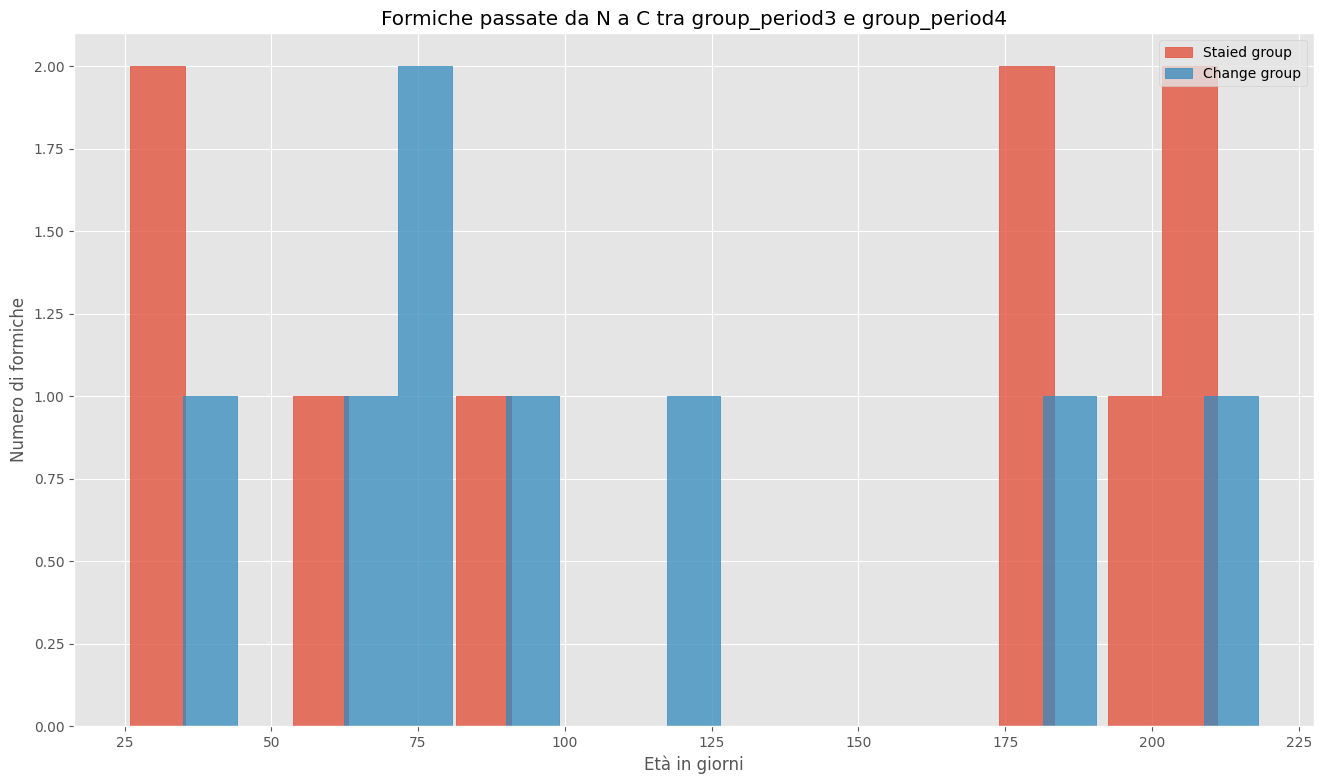

In [ ]:
for i in range(len(list_periods) - 1):
  for tup in [('C', 'F'), ('N', 'C')]:
    if tup[0] != tup[1]:
      changes_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").index)
      if len(changes_ids) > 0:
        start_group_ids = list(ants_period_groups.query(f"{list_periods[i + 1]} == '{tup[1]}'").index)

        start_group_ids = list(set(start_group_ids) ^ set(changes_ids))

        start_group_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(start_group_ids)]['age(days)'] + 1 + (i * 10))
        changes_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(changes_ids)]['age(days)'] + 1 + (i * 10))


        statistic, p_value = ks_2samp(changes_values, start_group_values)
        print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        U, p_value = ranksums(start_group_values, changes_values)
        print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        plt.figure(figsize=(16, 9))

        sns.histplot(start_group_values, stat='count', element="step", bins=20, label='Staied group')
        sns.histplot(changes_values, stat='count', element="step", bins=20, label='Change group')

        plt.ylabel('Numero di formiche')
        plt.xlabel('Età in giorni')
        plt.title(f'Formiche passate da {tup[0]} a {tup[1]} tra {list_periods[i]} e {list_periods[i + 1]}')
        plt.legend()
        plt.show();
        print()

#### **Analisi delle dimensioni**

Kolmogorov-Smirnov test otteniamo un p-value di 0.04324778145260752, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.

Wilcoxon rank-sum test  otteniamo un p-value di 0.0513602155342342, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



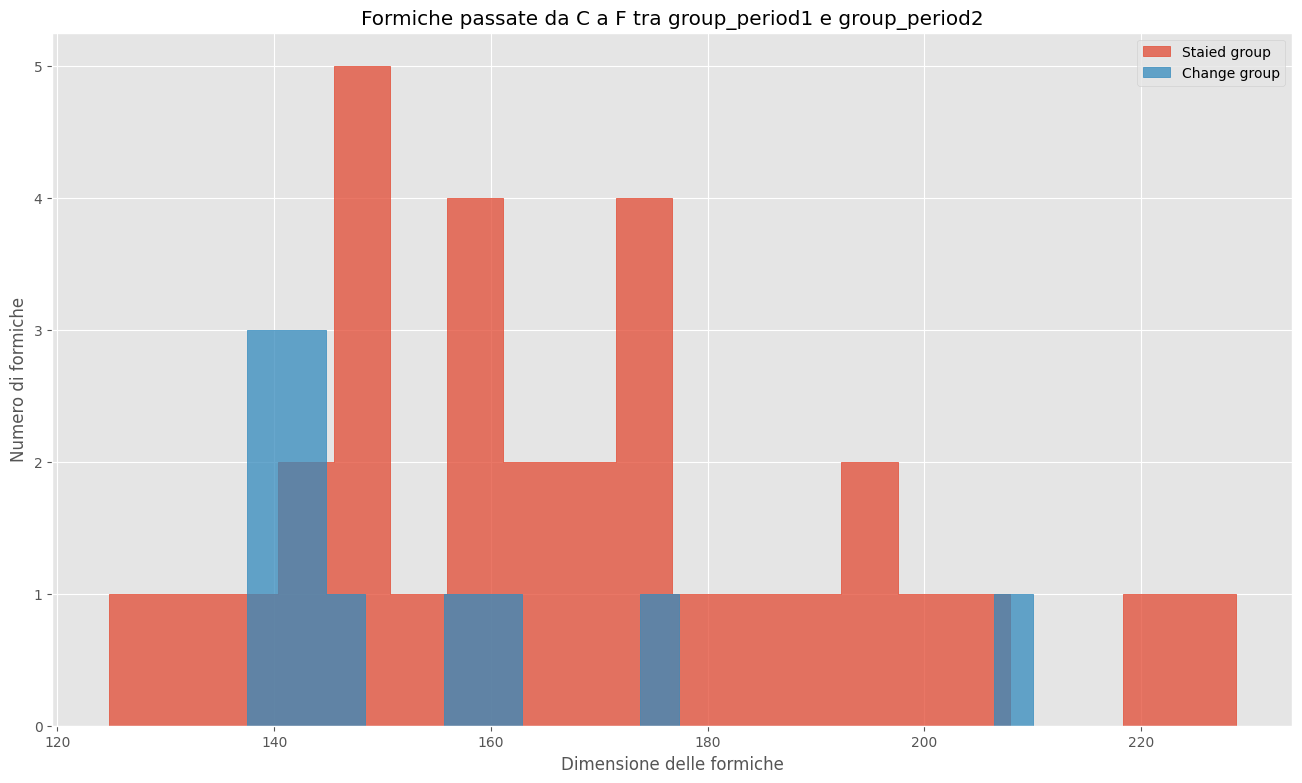


Kolmogorov-Smirnov test otteniamo un p-value di 0.8952716014635519, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 1.0, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



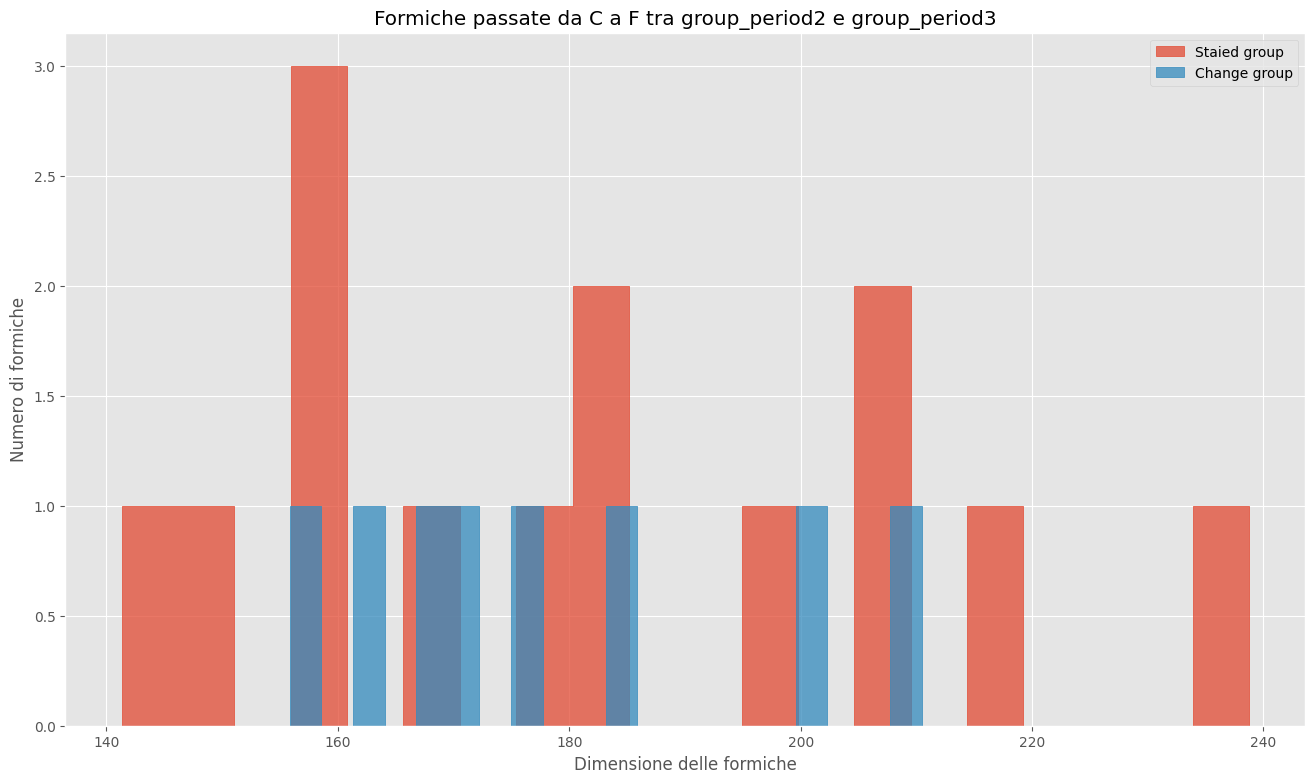


Kolmogorov-Smirnov test otteniamo un p-value di 0.3358851674641149, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.3345942595854855, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



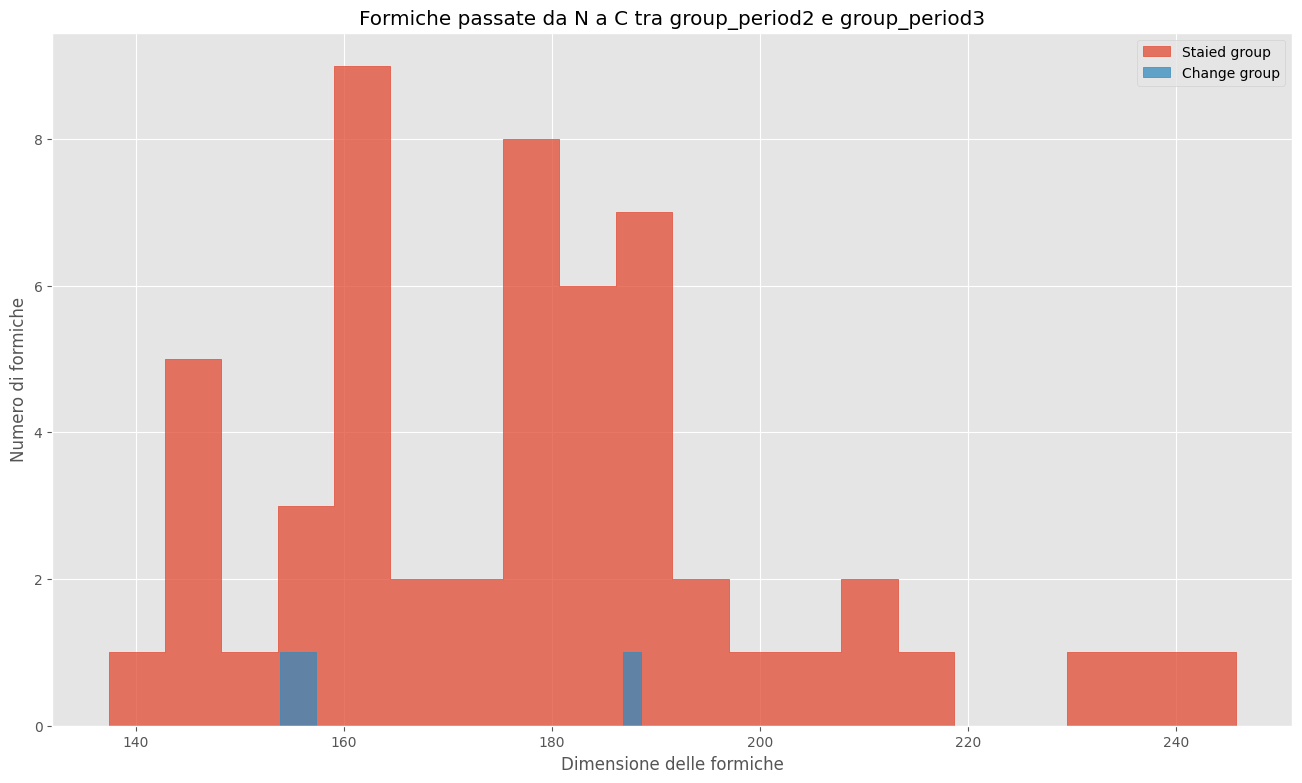


Kolmogorov-Smirnov test otteniamo un p-value di 0.4996114996114996, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 1.0, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



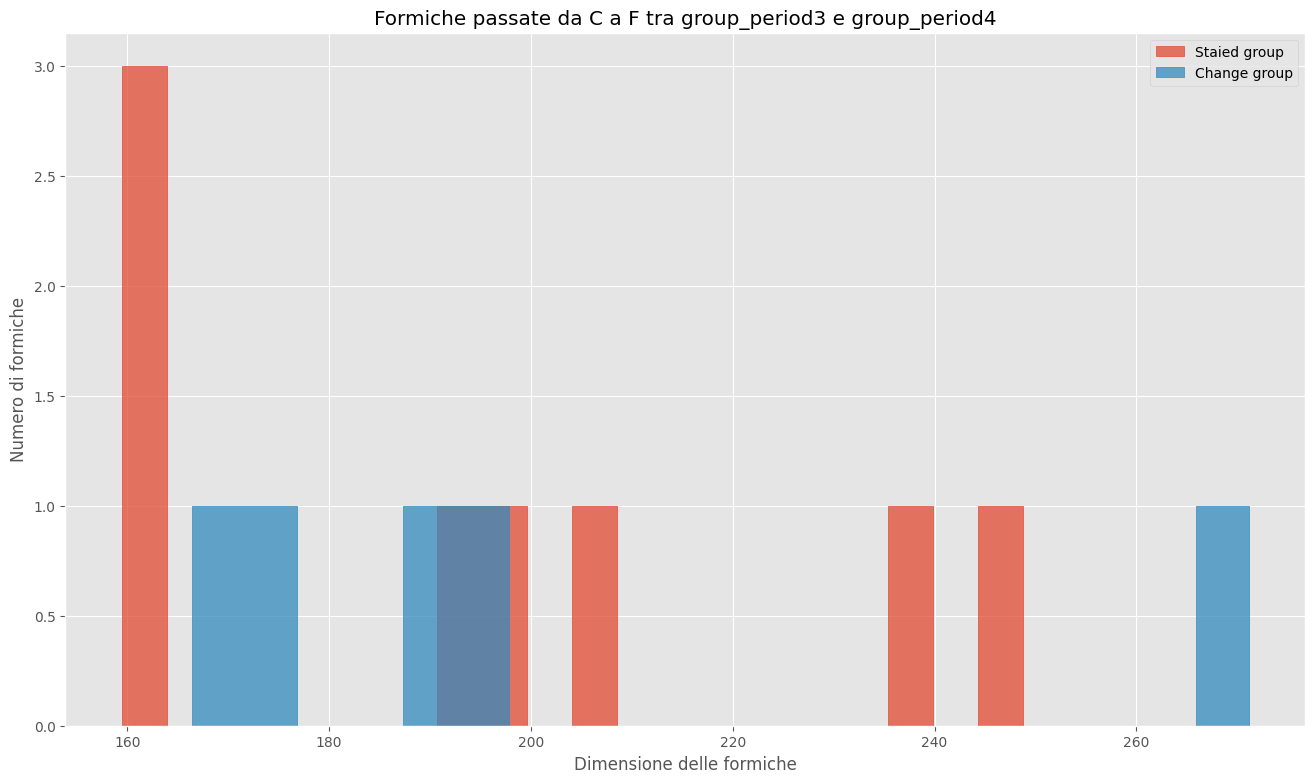


Kolmogorov-Smirnov test otteniamo un p-value di 0.034283474834163184, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.

Wilcoxon rank-sum test  otteniamo un p-value di 0.07819772028453494, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



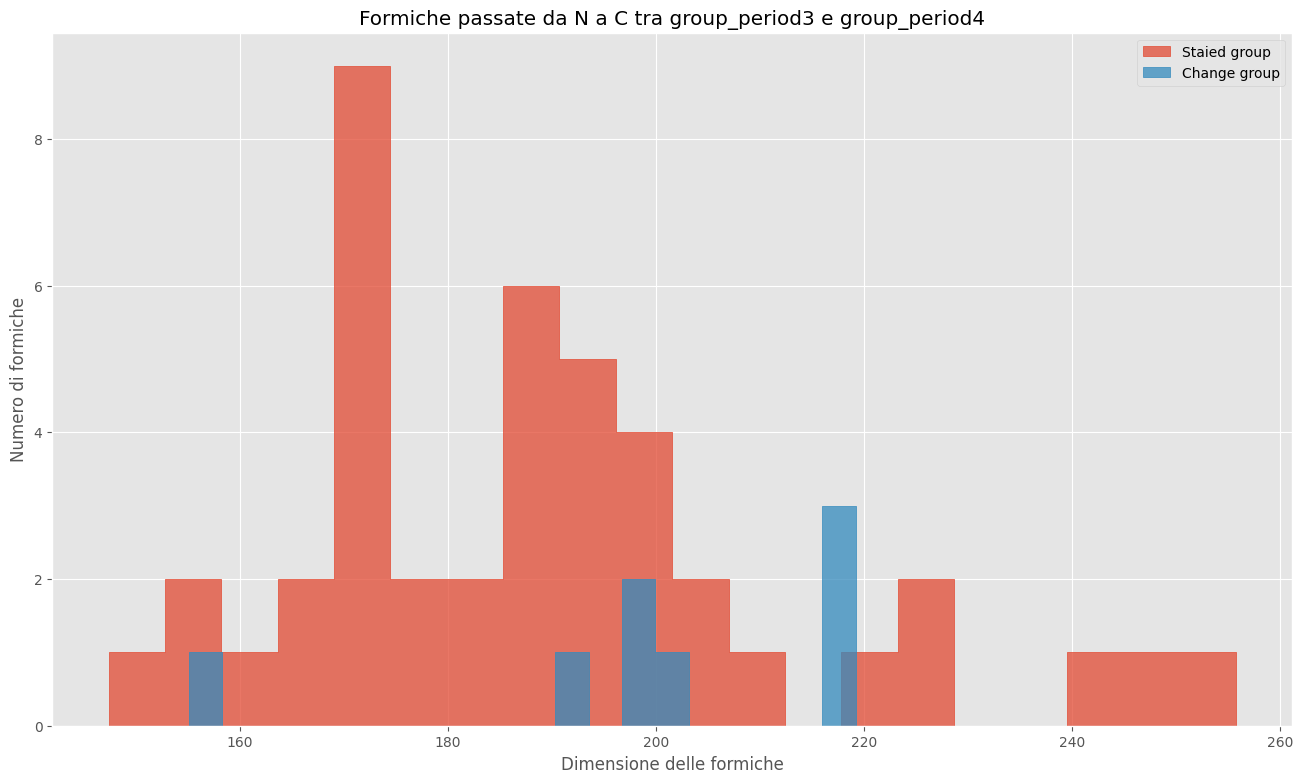

In [ ]:
for i in range(len(list_periods) - 1):
  for tup in [('C', 'F'), ('N', 'C')]:
    if tup[0] != tup[1]:
      changes_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").index)
      if len(changes_ids) > 0:
        start_group_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}'").index)

        start_group_ids = list(set(start_group_ids) ^ set(changes_ids))

        start_group_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(start_group_ids)]['body_size'] + 1 + (i * 10))
        changes_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(changes_ids)]['body_size'] + 1 + (i * 10))


        statistic, p_value = ks_2samp(changes_values, start_group_values)
        print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        U, p_value = ranksums(start_group_values, changes_values)
        print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        plt.figure(figsize=(16, 9))

        sns.histplot(start_group_values, stat='count', element="step", bins=20, label='Staied group')
        sns.histplot(changes_values, stat='count', element="step", bins=20, label='Change group')

        plt.ylabel('Numero di formiche')
        plt.xlabel('Dimensione delle formiche')
        plt.title(f'Formiche passate da {tup[0]} a {tup[1]} tra {list_periods[i]} e {list_periods[i + 1]}')
        plt.legend()
        plt.show();
        print()

#### **Analisi delle interazioni**

Le formiche che cambiano gruppo hanno più interazioni con le formiche del gruppo dove vanno rispetto a quelle del gruppo in cui sono?

Kolmogorov-Smirnov test otteniamo un p-value di 0.832587690946824, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.818225785432995, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



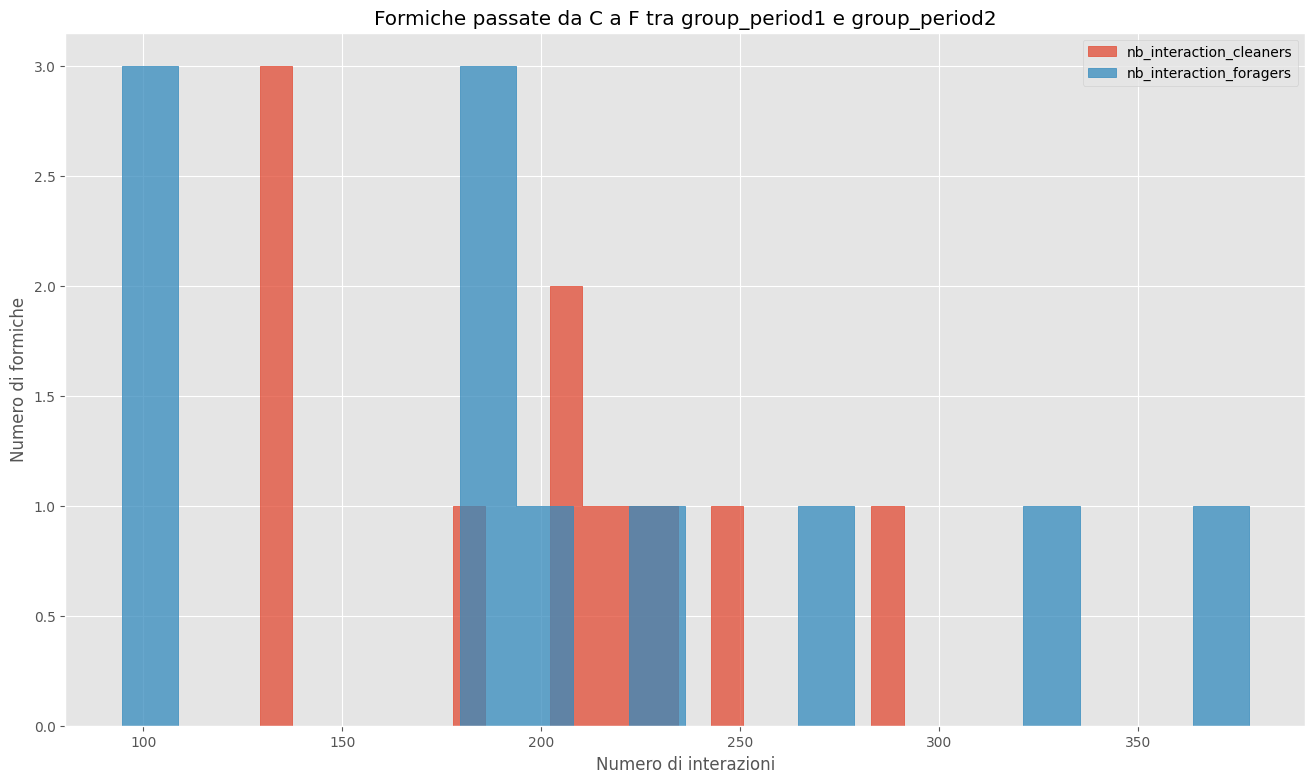


Kolmogorov-Smirnov test otteniamo un p-value di 0.6601398601398599, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.34456236532569795, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



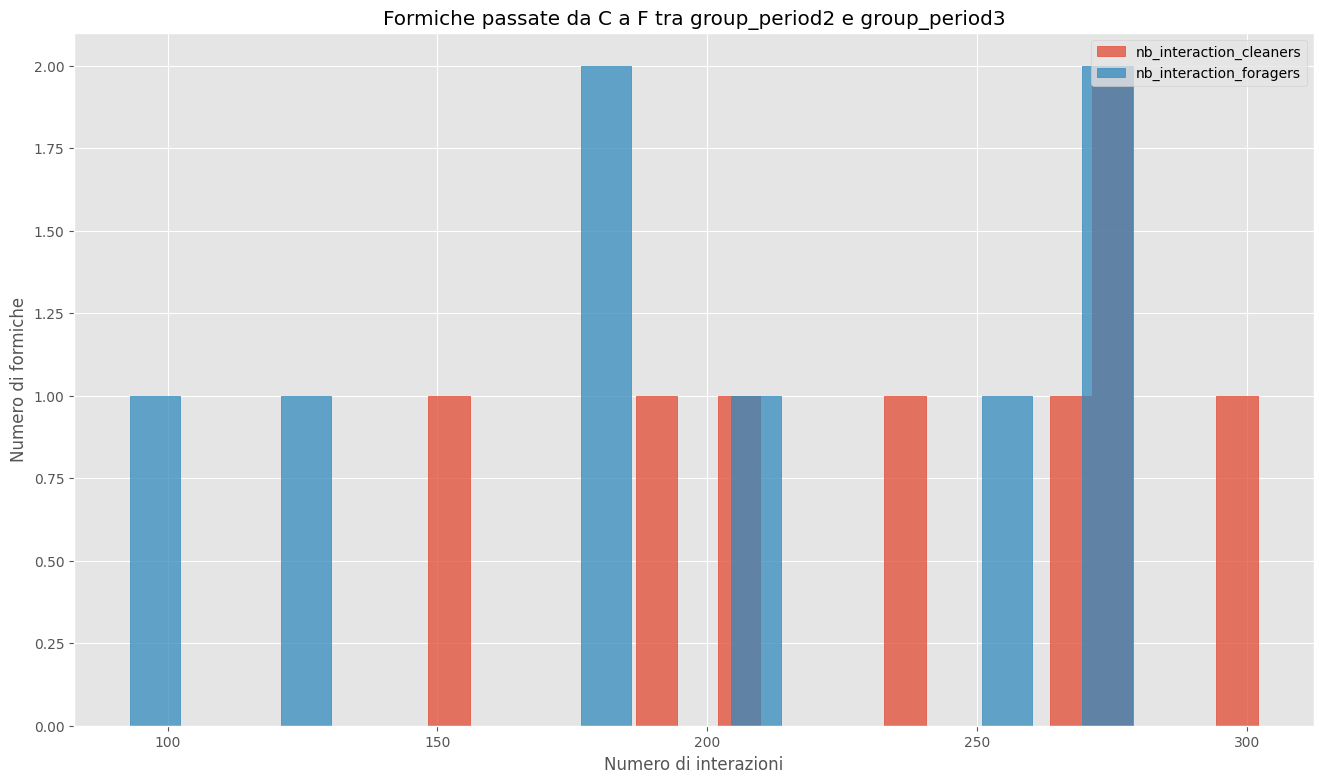


Kolmogorov-Smirnov test otteniamo un p-value di 0.6, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.12663045794761718, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



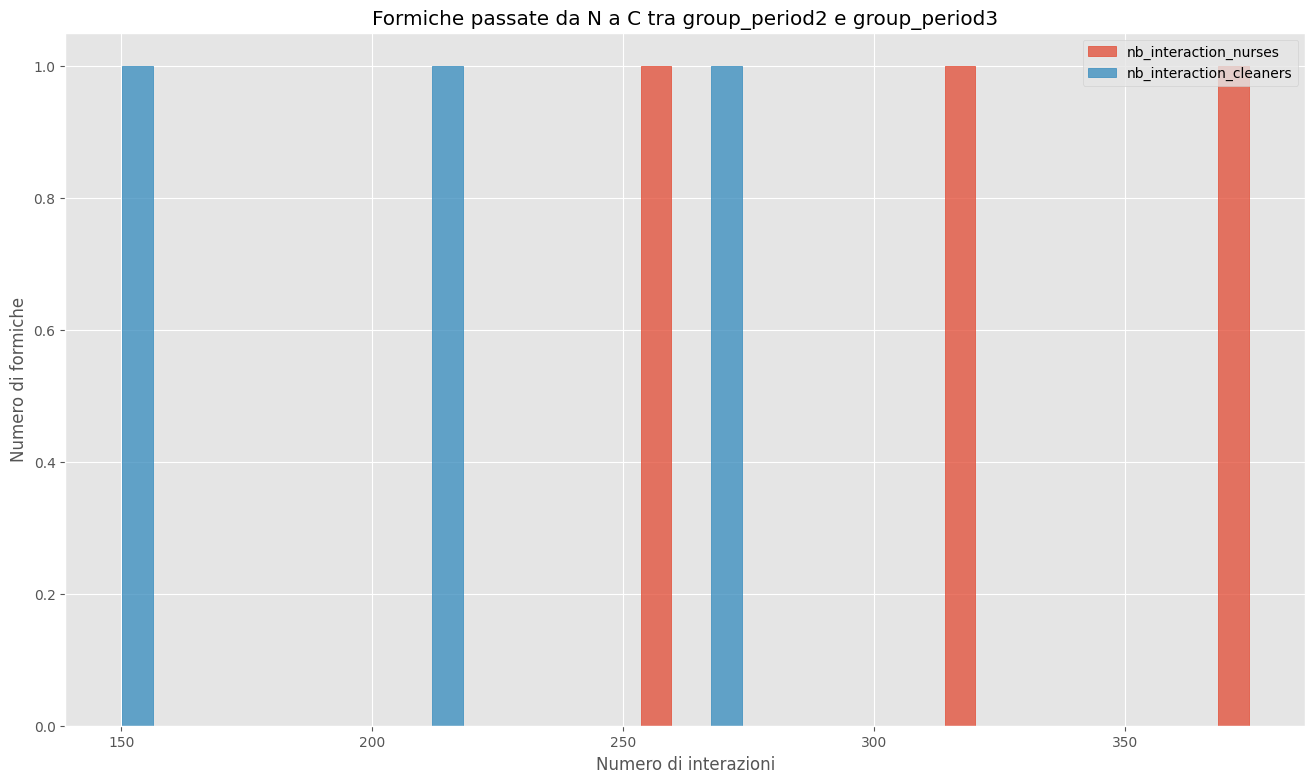


Kolmogorov-Smirnov test otteniamo un p-value di 0.873015873015873, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.7540225300620748, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



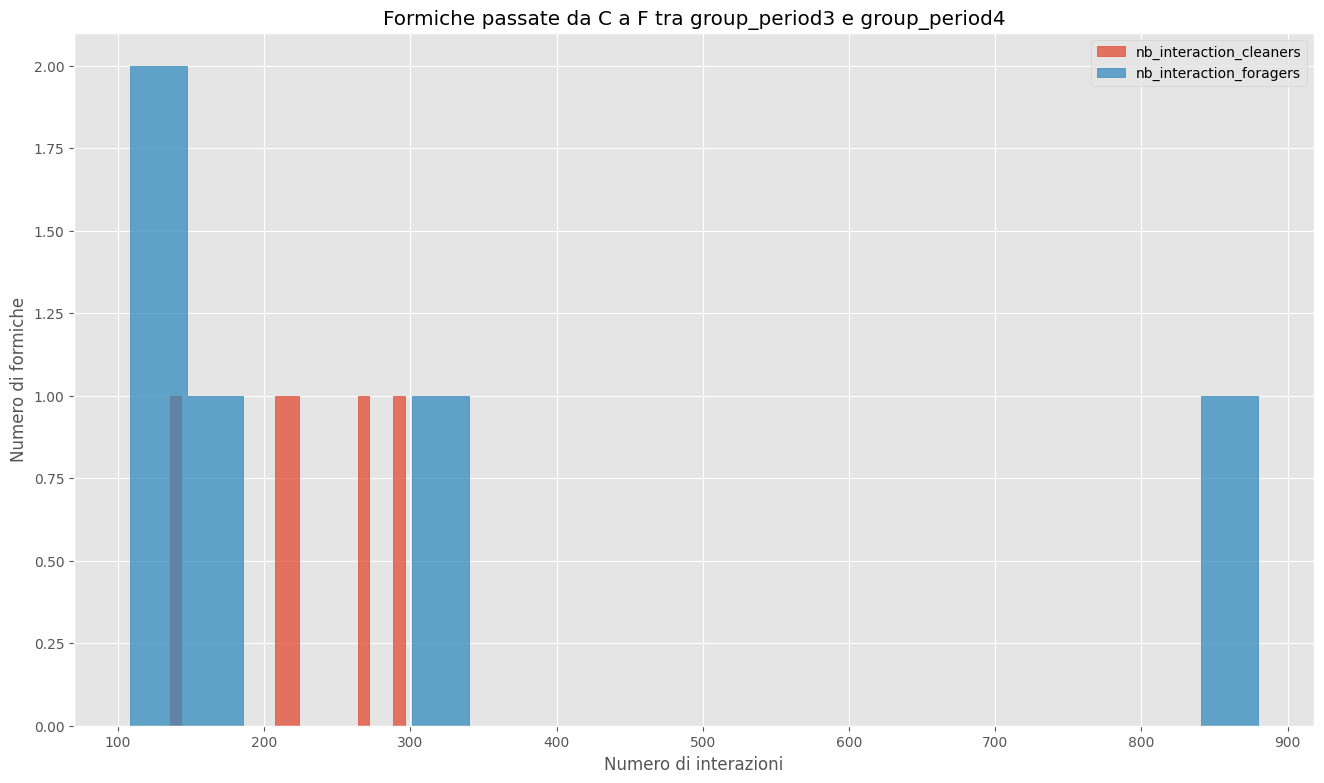


Kolmogorov-Smirnov test otteniamo un p-value di 0.002486402486402486, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.

Wilcoxon rank-sum test  otteniamo un p-value di 0.008651541533947532, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



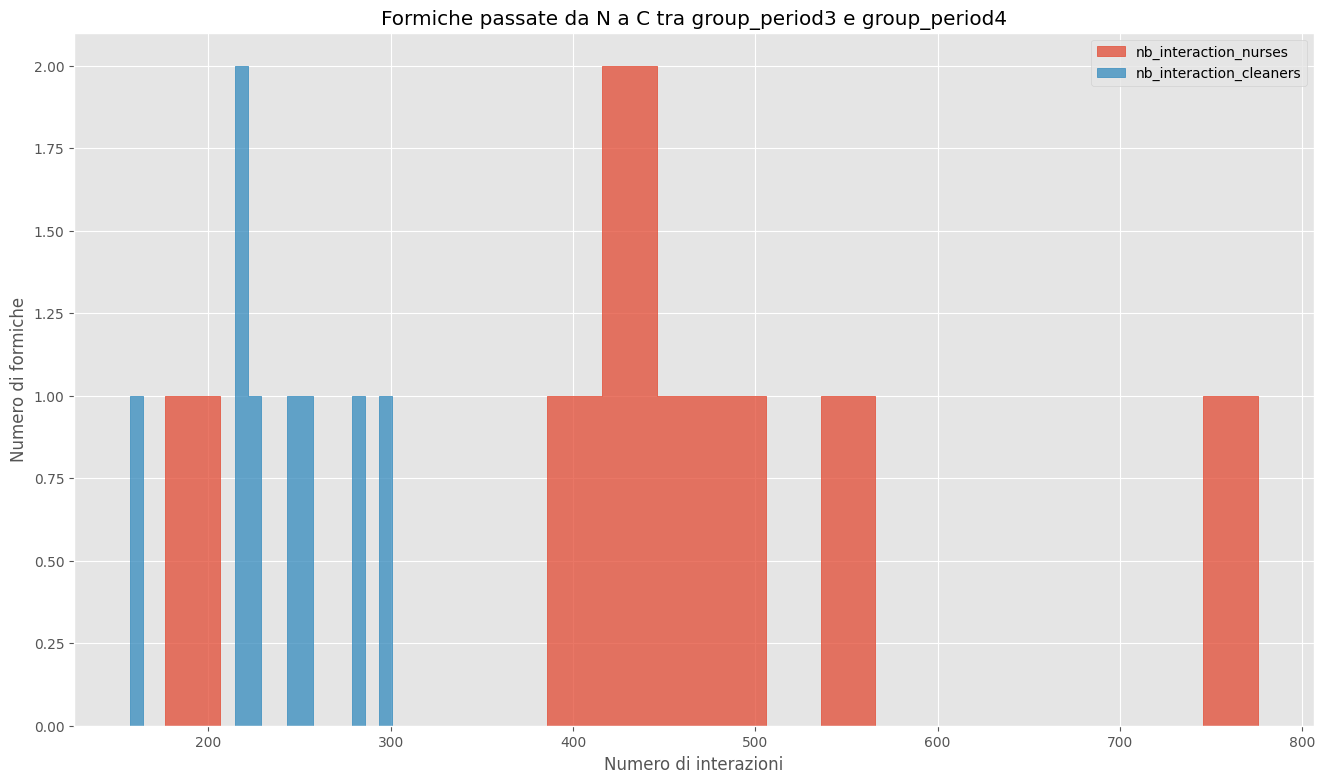

In [ ]:
dict_of_interaction_field = {'F': 'nb_interaction_foragers', 'C': 'nb_interaction_cleaners', 'N': 'nb_interaction_nurses'}

for i in range(len(list_periods) - 1):
  for tup in [('C', 'F'), ('N', 'C')]:
    if tup[0] != tup[1]:
      changes_ids = list(ants_period_groups.query(f"{list_periods[i]} == '{tup[0]}' and {list_periods[i + 1]} == '{tup[1]}'").index)
      if len(changes_ids) > 0:

        start_group_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(changes_ids)][dict_of_interaction_field[tup[0]]] + 1 + (i * 10))
        changes_values = np.array(ants_data_no_queen_df[ants_data_no_queen_df.index.isin(changes_ids)][dict_of_interaction_field[tup[1]]] + 1 + (i * 10))


        statistic, p_value = ks_2samp(changes_values, start_group_values)
        print(f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        U, p_value = ranksums(start_group_values, changes_values)
        print(f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end='')
        test_hypothesis_check(p_value, alpha)
        print()

        plt.figure(figsize=(16, 9))

        sns.histplot(start_group_values, stat='count', element="step", bins=20, label=dict_of_interaction_field[tup[0]])
        sns.histplot(changes_values, stat='count', element="step", bins=20, label=dict_of_interaction_field[tup[1]])

        plt.ylabel('Numero di formiche')
        plt.xlabel('Numero di interazioni')
        plt.title(f'Formiche passate da {tup[0]} a {tup[1]} tra {list_periods[i]} e {list_periods[i + 1]}')
        plt.legend()
        plt.show();
        print()

In [ ]:
def compute_ant_interaction(ant, interaction_dict, period):
    for edge in ant.incident():
        v = (
            edge.source_vertex
            if edge.source_vertex.index != ant.index
            else edge.target_vertex
        )
        if v[period] == " " or v[period] == "":
            interaction_dict["D"].append(edge["weight"])
        elif v[period] == "Q":
            interaction_dict["N"].append(edge["weight"])
        else:
            interaction_dict[v[period]].append(edge["weight"])
    return interaction_dict

In [ ]:
dict_days_period = {
    "group_period1": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11"],
    "group_period2": ["12", "13", "14", "15", "16", "17", "18", "19", "20", "21"],
    "group_period3": ["22", "23", "24", "25", "26", "27", "28", "29", "30", "31"],
    "group_period4": ["32", "33", "34", "35", "36", "37", "38", "39", "40", "41"],
}

periods_list = ["group_period1", "group_period2", "group_period3", "group_period4"]

interaction_dict = {}
interaction_old_group = {}
tup = ("N", "C")
# tup = ("C", "F")


for key in dict_days_period.keys():
    ants_interaction_period_df = pd.DataFrame()
    # Mi interessano solo i primi tre periodi per l'analisi
    if key == "group_period4":
        continue

    i = periods_list.index(key)
    # Prendo gli id delle formiche che cambiano gruppo
    ids = list(
        ants_data_df.query(
            f"{periods_list[i]} == '{tup[0]}' and {periods_list[i + 1]} == '{tup[1]}'"
        ).index
    )

    old_group_ids = list(set(ants_data_df.query(f"{periods_list[i]} == '{tup[0]}'").index).difference(set(ids)))

    interactions_by_ant = {id: {"F": [], "C": [], "N": [], "D": []} for id in ids}
    interactions_old_ant = {id: {"F": [], "C": [], "N": [], "D": []} for id in old_group_ids}

    for day in dict_days_period[key]:
        # Non abbiamo i dati su questi 2 giorni
        if colony_idx == 5 and (day == "40" or day == "41"):
            continue

        path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{day}.graphml"
        # Leggo il grafo
        graph = ig.Graph.Read_GraphML(path)

        # Contare il numero di interazioni tra le formiche in base al tipo
        for vertex in graph.vs:
            if vertex["id"] in ids:
                interactions_by_ant[vertex["id"]] = compute_ant_interaction(
                    vertex, interactions_by_ant[vertex["id"]], key
                )
            elif vertex["id"] in old_group_ids:
              interactions_old_ant[vertex["id"]] = compute_ant_interaction(
                    vertex, interactions_old_ant[vertex["id"]], key
                )

        del graph

    for id in interactions_by_ant.keys():
        for role in interactions_by_ant[id].keys():
            if len(interactions_by_ant[id][role]) == 0:
                interactions_by_ant[id][role] = 0
            else:
                interactions_by_ant[id][role] = round(
                    np.mean(interactions_by_ant[id][role]), 2
                )

    for id in interactions_old_ant.keys():
      for role in interactions_old_ant[id].keys():
            if len(interactions_old_ant[id][role]) == 0:
                interactions_old_ant[id][role] = 0
            else:
                interactions_old_ant[id][role] = round(
                    np.mean(interactions_old_ant[id][role]), 2
                )
    interaction_dict[key] = interactions_by_ant
    interaction_old_group[key] = interactions_old_ant

3 VS 54
Kolmogorov-Smirnov test otteniamo un p-value di 0.16090225563909774, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.

Wilcoxon rank-sum test  otteniamo un p-value di 0.07396105258098759, quindi: Non rifiutiamo l'ipotesi nulla. Non c'è una differenza significativa tra le due distribuzioni.



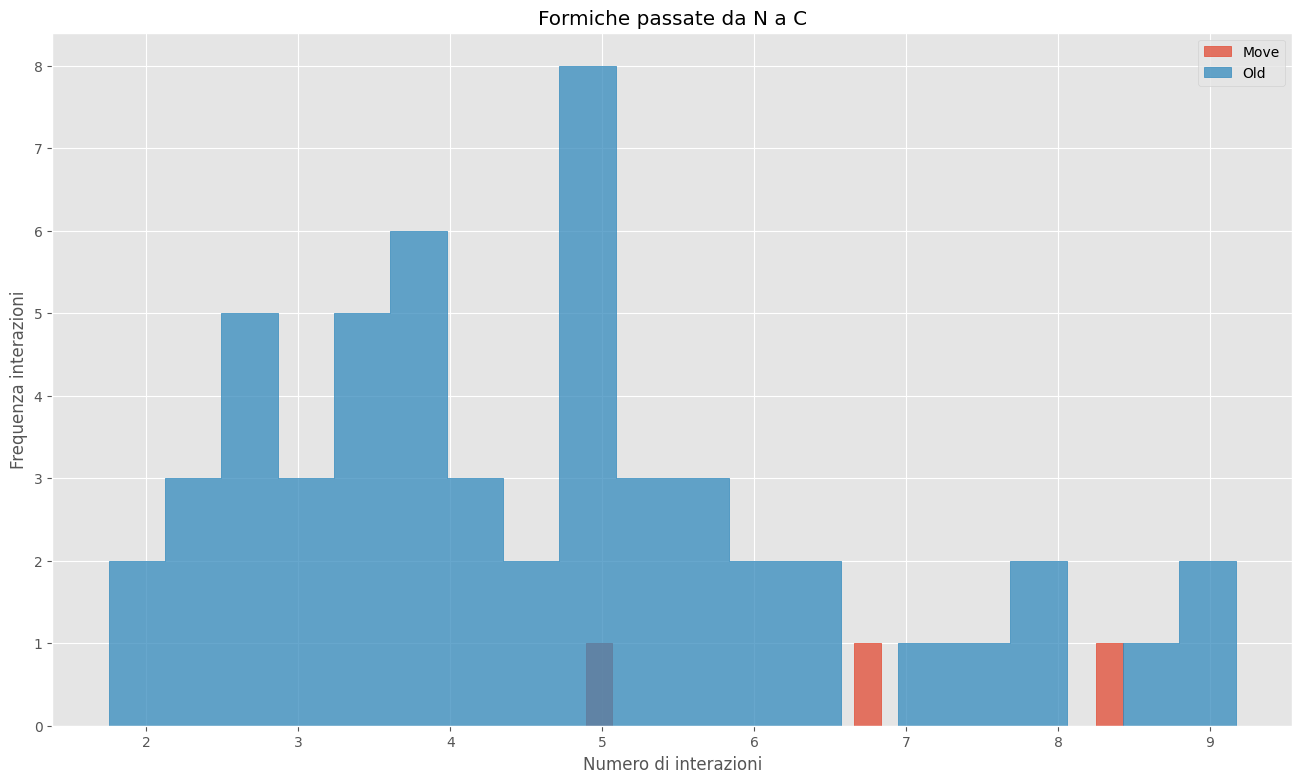


8 VS 43
Kolmogorov-Smirnov test otteniamo un p-value di 0.0007870745640784279, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.

Wilcoxon rank-sum test  otteniamo un p-value di 0.00047126274781807804, quindi: Rifiutiamo l'ipotesi nulla. Le due distribuzioni sono significativamente diverse.



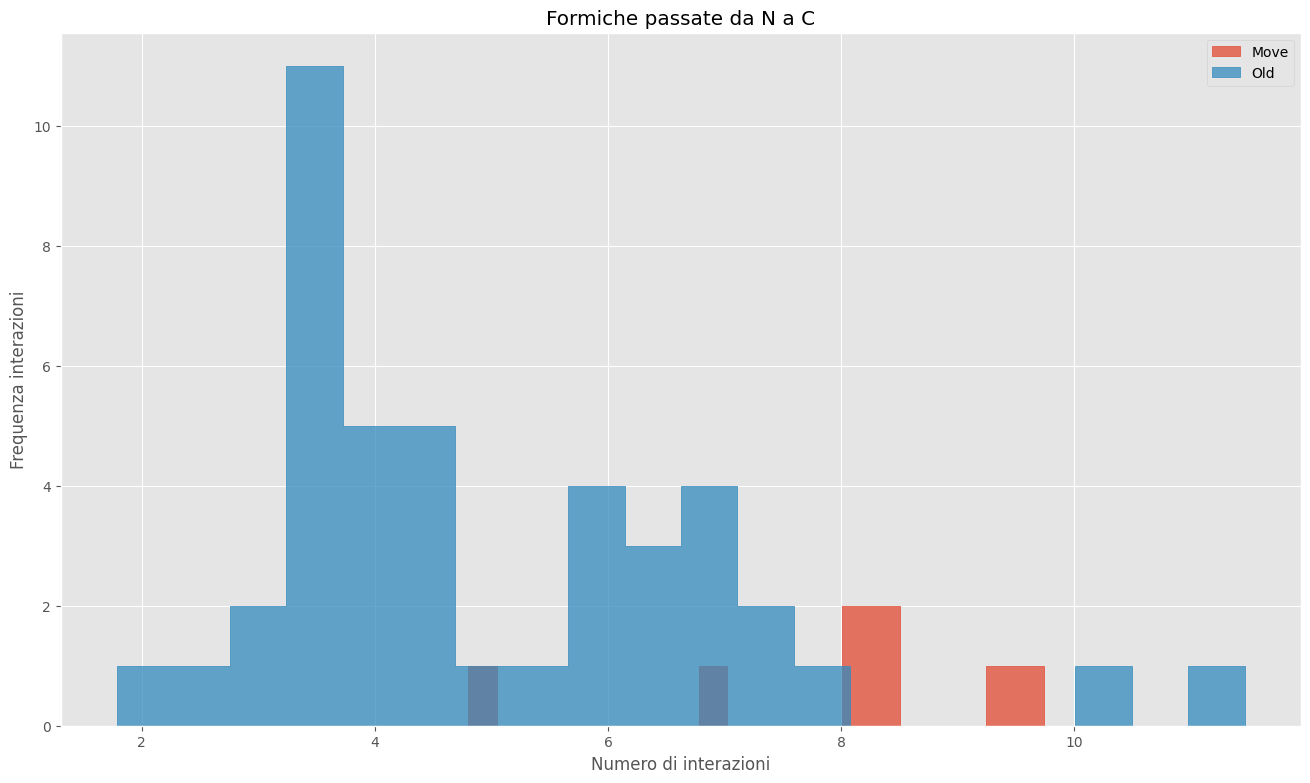

In [ ]:
for key in interaction_dict.keys():
    move_df = pd.DataFrame.from_dict(interaction_dict[key], orient="index")
    old_group_df = pd.DataFrame.from_dict(interaction_old_group[key], orient="index")
    if move_df.shape[0] == 0 or old_group_df.shape[0] == 0:
      continue
    interaction_new_group_move = np.array(move_df[tup[1]])
    interaction_new_group_old = np.array(old_group_df[tup[1]])

    print(len(interaction_new_group_move), 'VS', len(interaction_new_group_old))

    statistic, p_value = ks_2samp(interaction_new_group_move, interaction_new_group_old)
    print(
        f"Kolmogorov-Smirnov test otteniamo un p-value di {p_value}, quindi: ", end=""
    )
    test_hypothesis_check(p_value, alpha)
    print()

    U, p_value = ranksums(interaction_new_group_move, interaction_new_group_old)
    print(
        f"Wilcoxon rank-sum test  otteniamo un p-value di {p_value}, quindi: ", end=""
    )
    test_hypothesis_check(p_value, alpha)
    print()

    plt.figure(figsize=(16, 9))

    sns.histplot(
        interaction_new_group_move,
        stat="count",
        element="step",
        bins=20,
        label="Move",
    )
    sns.histplot(
        interaction_new_group_old,
        stat="count",
        element="step",
        bins=20,
        label="Old",
    )

    plt.ylabel("Frequenza interazioni")
    plt.xlabel("Numero di interazioni")
    plt.title(f"Formiche passate da {tup[0]} a {tup[1]}")
    plt.legend()
    plt.show()
    print()

#### **Assortatività dei sottogruppi con e senza nuovi elementi**



In [ ]:
days_period = {
    'day1': 'group_period1',
    'day11': 'group_period1',
    'day21': 'group_period2',
    'day31': 'group_period3',
    'day39': 'group_period4',
    'day41': 'group_period4',
}

In [ ]:
assortativity_df = pd.DataFrame()

for day in graphs.keys():
  assor_dict = {}
  f_nodes = []
  c_nodes = []
  n_nodes = []
  for node in graphs[day].vs:
    if node[days_period[day]] == 'F':
      f_nodes.append(node.index)
    elif node[days_period[day]] == 'C':
      c_nodes.append(node.index)
    elif node[days_period[day]] == 'N':
      n_nodes.append(node.index)

  assor_dict['Tot'] = graphs[day].assortativity_degree()
  assor_dict['F'] = (graphs[day].induced_subgraph(f_nodes)).assortativity_degree()
  assor_dict['C'] = (graphs[day].induced_subgraph(c_nodes)).assortativity_degree()
  assor_dict['N'] = (graphs[day].induced_subgraph(n_nodes)).assortativity_degree()

  assortativity_df[day] = assor_dict

assortativity_df

day1     day11     day21     day31     day41
Tot -0.034965  0.010596  0.025668  0.025068 -0.008873
F   -0.064859 -0.056975 -0.091572 -0.092535 -0.138726
C   -0.104132 -0.083481 -0.171725 -0.299865 -0.199757
N   -0.035559 -0.063254 -0.075056 -0.078327 -0.084516

In [ ]:
def compute_graph_assortativity(graph, day):
  if int(day) <= 11:
    period = 'group_period1'
  elif int(day) <= 21:
    period = 'group_period2'
  elif int(day) <= 31:
    period = 'group_period3'
  else:
    period = 'group_period4'

  assor_dict = {}
  f_nodes = []
  c_nodes = []
  n_nodes = []
  for node in graph.vs:
    if node[period] == 'F':
      f_nodes.append(node.index)
    elif node[period] == 'C':
      c_nodes.append(node.index)
    elif node[period] == 'N':
      n_nodes.append(node.index)

  assor_dict['Tot'] = graph.assortativity_degree()
  assor_dict['F'] = (graph.induced_subgraph(f_nodes)).assortativity_degree()
  assor_dict['C'] = (graph.induced_subgraph(c_nodes)).assortativity_degree()
  assor_dict['N'] = (graph.induced_subgraph(n_nodes)).assortativity_degree()

  return assor_dict

In [ ]:
days = ['11', '12', '21','22', '31', '32', '39']

assortativity_daily_df = pd.DataFrame()

for day in days:
  path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{day}.graphml"
  daily_graph = ig.Graph.Read_GraphML(path)
  assortativity_daily_df[day] = compute_graph_assortativity(daily_graph, day)
assortativity_daily_df

11        12        21        22        31        32        39
Tot  0.010596  0.037451  0.025668  0.008939  0.025068 -0.016255 -0.045922
F   -0.056975 -0.074691 -0.091572 -0.095171 -0.092535 -0.076354 -0.092679
C   -0.083481 -0.118923 -0.171725 -0.341334 -0.299865 -0.186576 -0.208062
N   -0.063254 -0.063238 -0.075056 -0.056836 -0.078327 -0.082326 -0.091405

## **Community detection**

Proviamo a calcolare la separazione ottimanle tra le community

In [ ]:
graphs_clustering = {}
all_paths = {}

for i in [1, 3, 5, 7, 9]:
    day_key = f'day{i}'
    file_path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{colonies[colony_idx]}/ant_mersch_col{colonies[colony_idx]}_day{i:02d}.graphml"
    all_paths[day_key] = file_path

print(all_paths)

for day, path in all_paths.items():
    print(f"Processing {day}...")
    graph = ig.Graph.Read_GraphML(path)
    print(graph.summary())
    graphs_clustering[day] = graph

{'day1': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day01.graphml', 'day3': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day03.graphml', 'day5': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day05.graphml', 'day7': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day07.graphml', 'day9': '/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony3/ant_mersch_col3_day09.graphml'}
Processing day1...
IGRAPH U-W- 160 11139 -- 
+ attr: age(days) (v), body_size (v), colony (v), group_period1 (v), group_period2 (v), group_period3 (v), group_period4 (v), id (v), nb_foraging_events (v), nb_interaction_cleaners (v), nb_interaction_foragers (v), nb_interaction_nurses (v), nb_interaction_q

Come valutare il numero di runs necessarie tale che il numero di similarità dei cluster non cambia.

In [ ]:
def evaluate_stability(graph, max_runs=1000, step=50):
    stability_scores = []

    for n_runs in range(step, max_runs + 1, step):
        partitions = []

        for _ in tqdm(range(n_runs), desc=f"Evaluating stability for n_runs={n_runs}"):
            partition = graph.community_multilevel(weights='weight')
            partitions.append(partition.membership)

        # Calcola la similarità delle partizioni usando il Jaccard Score
        scores = []
        for i in range(n_runs):
            for j in range(i + 1, n_runs):
                score = jaccard_score(partitions[i], partitions[j], average='macro')
                scores.append(score)

        avg_score = np.mean(scores)
        stability_scores.append((n_runs, avg_score))

    return stability_scores

graph = graphs_clustering['day1']
stability_scores = evaluate_stability(graph)

for n_runs, score in stability_scores:
    print(f"n_runs: {n_runs}, Stability Score: {score}")

Evaluating stability for n_runs=1000: 100%|██████████| 1000/1000 [00:07<00:00, 125.32it/s]


n_runs: 50, Stability Score: 0.8183196765286416
n_runs: 100, Stability Score: 0.7969803927411553
n_runs: 150, Stability Score: 0.7812699366348714
n_runs: 200, Stability Score: 0.7961981943890839
n_runs: 250, Stability Score: 0.8075272188961915
n_runs: 300, Stability Score: 0.8080772597903638
n_runs: 350, Stability Score: 0.7911396692282674
n_runs: 400, Stability Score: 0.790335557715108
n_runs: 450, Stability Score: 0.8049294868654759
n_runs: 500, Stability Score: 0.8072429779226565
n_runs: 550, Stability Score: 0.8160815609769195
n_runs: 600, Stability Score: 0.7997478116862051
n_runs: 650, Stability Score: 0.8024383040947557
n_runs: 700, Stability Score: 0.8047991721837483
n_runs: 750, Stability Score: 0.7974039981475088
n_runs: 800, Stability Score: 0.8033309234305375
n_runs: 850, Stability Score: 0.796723645336871
n_runs: 900, Stability Score: 0.7953607784484935
n_runs: 950, Stability Score: 0.8033939353396674
n_runs: 1000, Stability Score: 0.7997063504429047


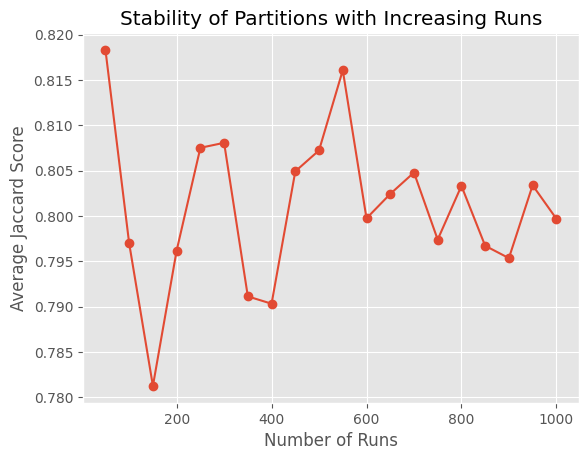

In [ ]:
n_runs_vals, scores = zip(*stability_scores)
plt.plot(n_runs_vals, scores, marker='o')
plt.xlabel('Number of Runs')
plt.ylabel('Average Jaccard Score')
plt.title('Stability of Partitions with Increasing Runs')
plt.show()

In [ ]:
def consensus_partition(graph, n_runs):
    partitions = []
    for _ in range(n_runs):
        partition = graph.community_multilevel(weights='weight')
        partitions.append(partition.membership)

    # Crea un dizionario per contare le co-occorrenze dei nodi nei cluster
    co_occurrences = defaultdict(lambda: defaultdict(int))
    for partition in partitions:
        for i, cluster in enumerate(partition):
            for j in range(i + 1, len(partition)):
                if partition[j] == cluster:
                    co_occurrences[i][j] += 1
                    co_occurrences[j][i] += 1

    # Crea un nuovo grafo di similarità
    similarity_graph = ig.Graph(n=len(graph.vs), directed=graph.is_directed())

    # Copia gli attributi dei nodi
    for attr in graph.vertex_attributes():
        similarity_graph.vs[attr] = graph.vs[attr]

    # Aggiungi gli archi basati sulle co-occorrenze normalizzate
    for i in co_occurrences:
        for j in co_occurrences[i]:
            similarity_graph.add_edge(i, j, weight=co_occurrences[i][j] / n_runs)

    return similarity_graph.community_multilevel(weights='weight')

In [ ]:
all_partition = {}
for key, graph in graphs_clustering.items():
  print(f"Communities {key}: ")
  partition = consensus_partition(graph, n_runs=1000)
  print(partition.summary())
  all_partition[key] = partition

Communities day1: 
Clustering with 160 elements and 2 clusters
Communities day3: 
Clustering with 160 elements and 3 clusters
Communities day5: 
Clustering with 160 elements and 4 clusters
Communities day7: 
Clustering with 160 elements and 3 clusters
Communities day9: 
Clustering with 160 elements and 3 clusters


In [ ]:
for key, par in all_partition.items():
  print(f"For day = {key}, the modularity score is: {par.modularity}")

For day = day1, the modularity score is: 0.49100263840914155
For day = day3, the modularity score is: 0.5327912238435564
For day = day5, the modularity score is: 0.5739155915813136
For day = day7, the modularity score is: 0.5558259952542896
For day = day9, the modularity score is: 0.6131037918310392


In [ ]:
subgraph_visual = {}

subgraph_visual["vertex_label"] = graphs_clustering['day1'].vs["id"]
subgraph_visual["vertex_size"] = 20


ig.plot(all_partition['day1'], **subgraph_visual)

Output hidden; open in https://colab.research.google.com to view.

#### **Estrazione delle community individuate**

Valutazione della suddivisione sfruttando i dati presenti nel file per i giorni considerati

In [ ]:
def plot_partition(day):
  subgraphs = all_partition[day].subgraphs()

  colors = list(sns.color_palette("tab10").as_hex())

  plot = ig.Plot("plot.png", bbox=(len(subgraphs)*300, 300), background="white")

  for id, sg in enumerate(subgraphs):
    subgraph_visual = {}
    subgraph_visual["vertex_label"] = sg.vs["id"]
    subgraph_visual["vertex_color"] = colors[id]
    #subgraph_visual['edge_size'] = [0 if w < edge_threshold else 1 for w in sg.es['weight']]

    x = id * 250 + 25
    y = 25

    plot.add(sg, bbox=(x,y, x + 250, y + 250), **subgraph_visual)
    plot.redraw()

  return plot

In [ ]:
plot_partition('day1')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_partition('day3')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_partition('day5')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_partition('day7')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_partition('day9')

Output hidden; open in https://colab.research.google.com to view.

Analesi dei ruoli delle formiche nelle community su divverenti giorni

In [ ]:
period = "group_period1"

In [ ]:
for key, partition in all_partition.items():
  conf_matrix = pd.DataFrame(columns = ['Q', 'C', 'F', 'N'])
  subgraphs = all_partition[key].subgraphs()
  error = 0
  for sg in subgraphs:
    row = {'Q':0, 'C':0, 'F':0, 'N':0}
    for node in sg.vs():
      if node[period] == '':
        continue
      else:
        row[node[period]] += 1
    row_list = list(row.values())
    error += np.sum(row_list)-np.max(row_list) - 1
    conf_matrix = pd.concat([conf_matrix, pd.Series(row).to_frame().T], ignore_index = True)
  print(key)
  display(conf_matrix)
  print("Error:", error)
  print()

day1


Q   C   F   N
0  0  19  59   0
1  1  24   0  54

Error: 42

day3


Q   C   F   N
0  0  26   2   6
1  1   5   0  48
2  0  12  57   0

Error: 23

day5


Q   C   F   N
0  0  22   7   1
1  1   7   0  52
2  0   2  50   0
3  0  12   2   1

Error: 17

day7


Q   C   F   N
0  0  37   8   7
1  1   0   0  47
2  0   6  51   0

Error: 19

day9


Q   C   F   N
0  0  34   3   4
1  1   3   0  49
2  0   6  56   1

Error: 15



Idealmente dovrebbero esserci 3 cluster(perchè sono 3 i ruoli delle formiche) e le formiche che fanno parte di un cluster dovrebbero avere lo stesso ruolo. Inoltre la regina dovrebbe essere tra le nurses.

L'unica colonia in cui si vericica questa condizione è nella colonia 5, che è esattamente la colonia analizzata nel paper di riferimento.

### **Silhouette**


In [ ]:
all_df = {}
for key, graph in graphs_clustering.items():
  # all_graphs[key].es['weight'] = [w for w in all_graphs[key].es['weight'] if w > edge_threshold]
  attributes = graphs_clustering[key].vs.attribute_names()

  nodes_df = pd.DataFrame(columns=attributes)

  for v in graphs_clustering[key].vs():
    row = {}
    for attr in attributes:
      if v['id'] != 'Ant635':
        row[attr] = v[attr]

    nodes_df = pd.concat([nodes_df, pd.Series(row).to_frame().T], axis=0, ignore_index=True)

  nodes_df = nodes_df.set_index('id')
  nodes_df.head()
  # print(nodes_df.index == 'Ant621')
  all_df[key] = nodes_df

In [ ]:
for key, df in all_df.items():
  all_df[key] = df.sort_index()

I cluster del loro dataset vengono diversi perchè le matrici di adiacenza cambiano da giorno in giorno

id
Ant665    
Name: group_period1, dtype: object
id
Ant663    
Name: group_period1, dtype: object
id
Ant954    
Name: group_period1, dtype: object
For day = day1 The average silhouette_score community is : 0.11580467796708005 The average silhouette_score dataset is : -0.005762887837901096



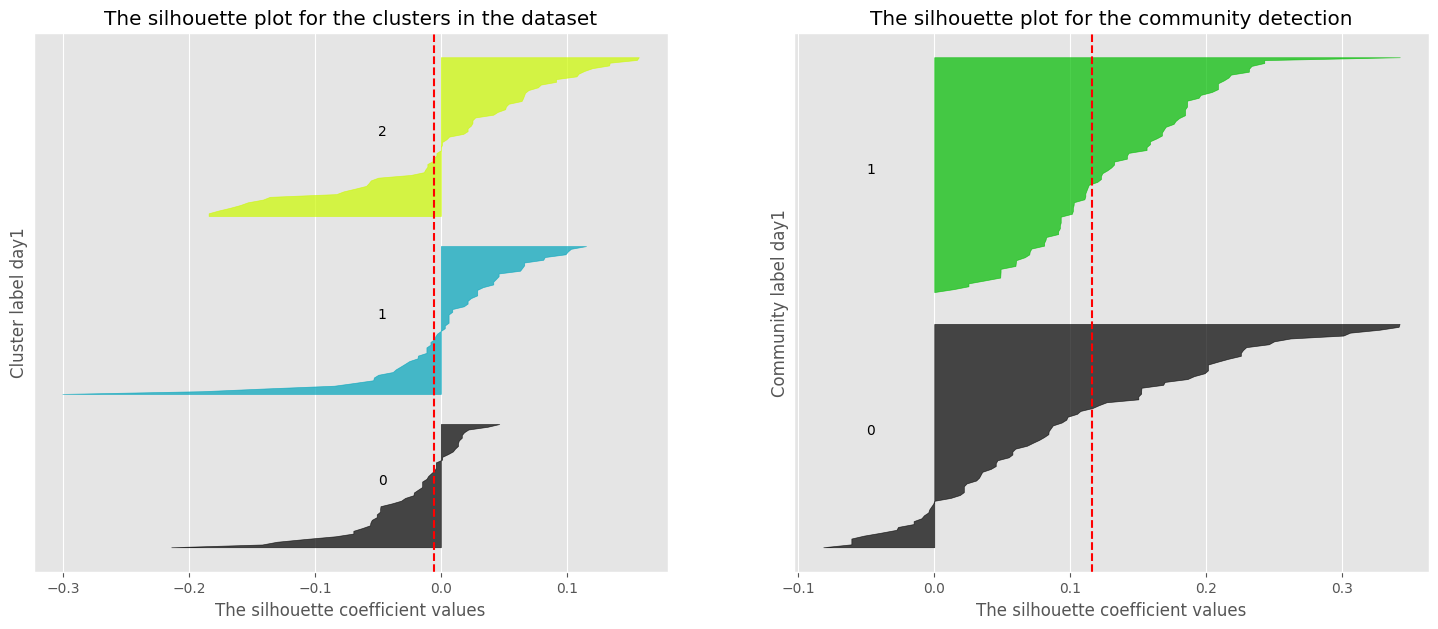

id
Ant665    
Name: group_period1, dtype: object
id
Ant663    
Name: group_period1, dtype: object
id
Ant954    
Name: group_period1, dtype: object
For day = day3 The average silhouette_score community is : 0.10012651594057971 The average silhouette_score dataset is : -0.012701275394223327



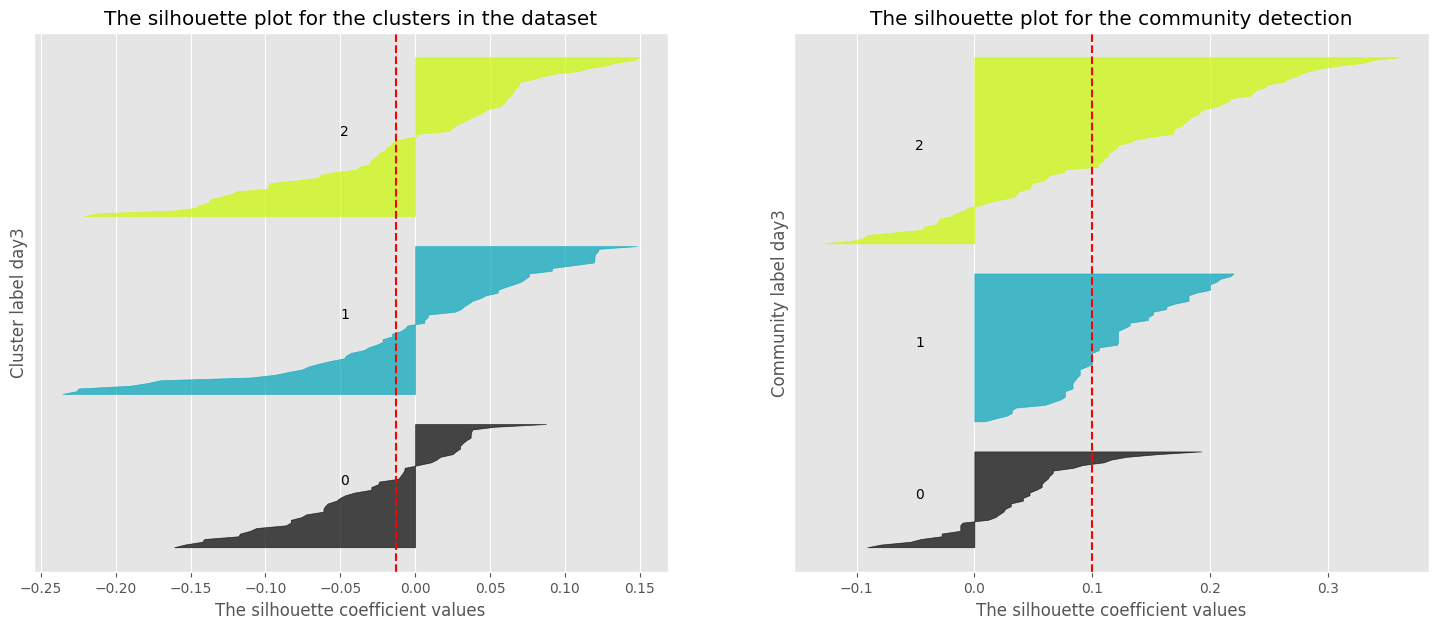

id
Ant665    
Name: group_period1, dtype: object
id
Ant663    
Name: group_period1, dtype: object
id
Ant954    
Name: group_period1, dtype: object
For day = day5 The average silhouette_score community is : 0.09548086779919981 The average silhouette_score dataset is : -0.005375050411569054



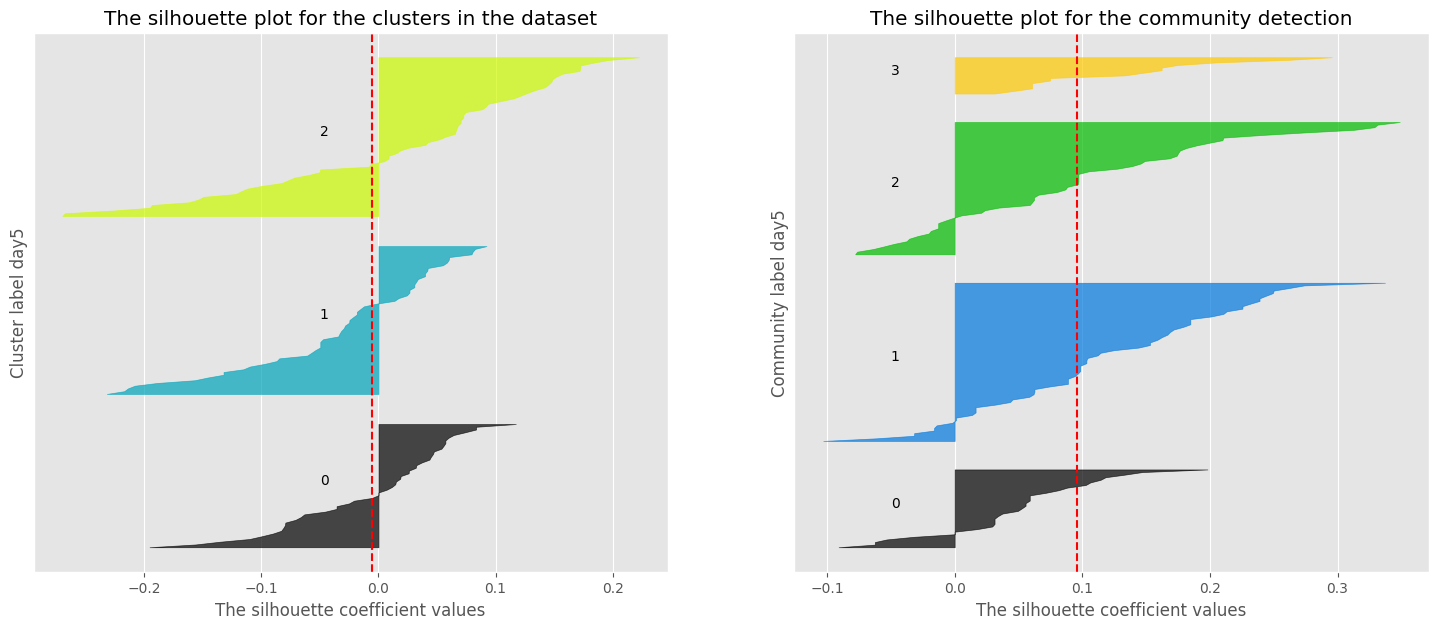

id
Ant665    
Name: group_period1, dtype: object
id
Ant663    
Name: group_period1, dtype: object
id
Ant954    
Name: group_period1, dtype: object
For day = day7 The average silhouette_score community is : 0.11786736019990773 The average silhouette_score dataset is : 0.007126971915648765



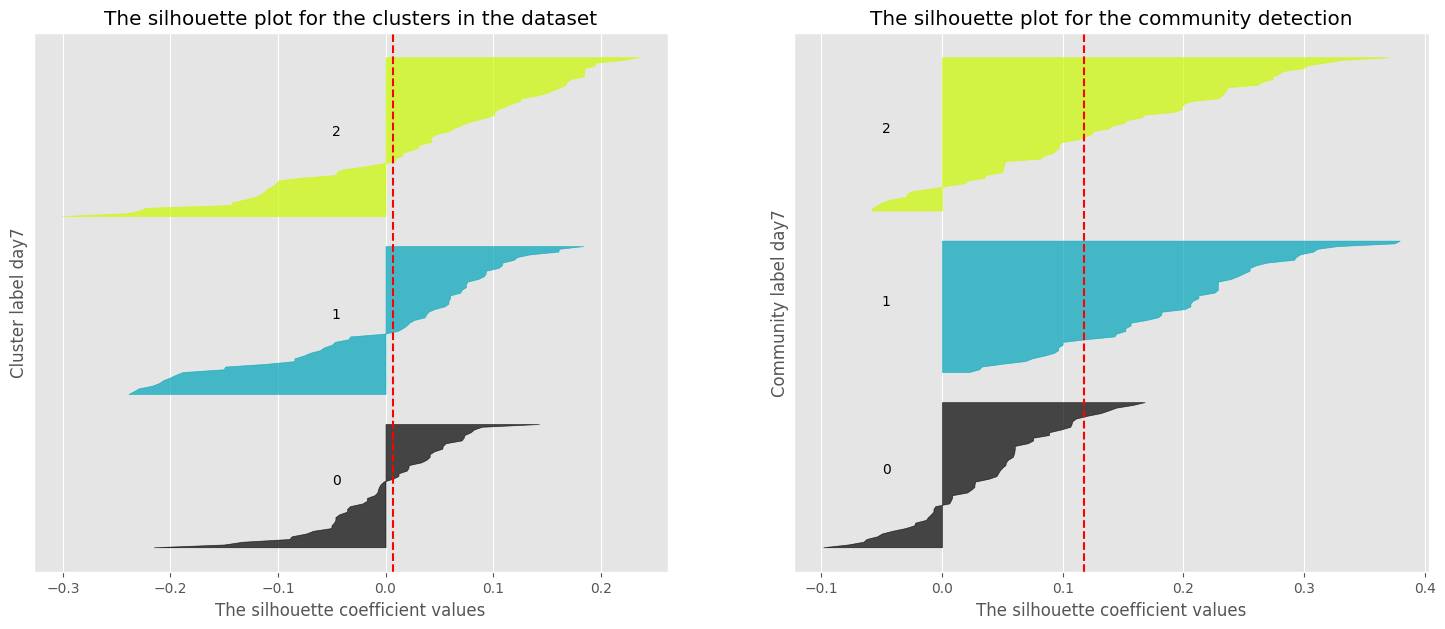

id
Ant665    
Name: group_period1, dtype: object
id
Ant663    
Name: group_period1, dtype: object
id
Ant954    
Name: group_period1, dtype: object
For day = day9 The average silhouette_score community is : 0.12455434270590975 The average silhouette_score dataset is : 0.11144048789350662



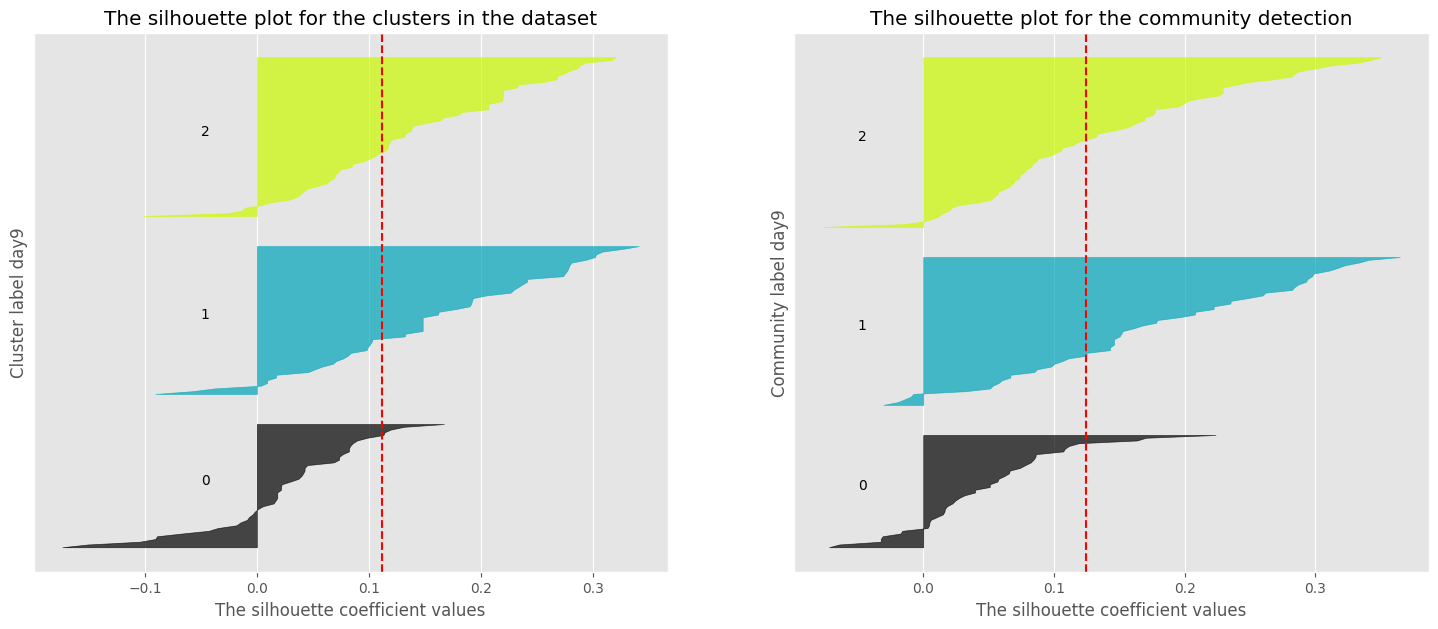

In [ ]:
clusters = {'C': 0, 'N': 1, 'F': 2, 'Q': 1}
silhouette_scores_community = {}
silhouette_scores_label = {}

for key, partition in all_partition.items():
    cluster_labels = []
    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty:
            if p.iloc[0] != '':
                cluster_labels.append(clusters[p.iloc[0]])
            else:
                cluster_labels.append(0)
                print(p)
        else:
            cluster_labels.append(0)
            print(p)

    # Calcola la matrice delle distanze più brevi tra tutti i nodi (shortest_paths)
    distance_matrix = np.array(graphs_clustering[key].distances())

    cluster_community = np.array(all_partition[key].membership)
    cluster_labels = np.array(cluster_labels)

    # adjacency_matrix = np.array(graphs_clustering[key].get_adjacency().data)

    silhouette_scores_community[key] = silhouette_score(distance_matrix, cluster_community, metric="precomputed")
    silhouette_scores_label[key] = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")

    print("For day =", key,
          "The average silhouette_score community is :", silhouette_scores_community[key],
          "The average silhouette_score dataset is :", silhouette_scores_label[key])
    print()

    # Compute the silhouette scores for each sample
    sample_silhouette_values_labels = silhouette_samples(distance_matrix, cluster_labels, metric="precomputed")
    sample_silhouette_values_community = silhouette_samples(distance_matrix, cluster_community, metric="precomputed")

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    y_lower = 10
    n_clusters_labels = len(np.unique(cluster_labels))

    for i in range(n_clusters_labels):
        ith_cluster_silhouette_values_labels = sample_silhouette_values_labels[cluster_labels == i]
        ith_cluster_silhouette_values_labels.sort()

        size_cluster_i = ith_cluster_silhouette_values_labels.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_labels)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_labels,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the clusters in the dataset")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel(f"Cluster label {key}")
    ax1.axvline(x=silhouette_scores_label[key], color="red", linestyle="--")
    ax1.set_yticks([])

    y_lower = 10
    n_clusters_community = len(np.unique(cluster_community))

    for i in range(n_clusters_community):
        ith_cluster_silhouette_values_community = sample_silhouette_values_community[cluster_community == i]
        ith_cluster_silhouette_values_community.sort()

        size_cluster_i = ith_cluster_silhouette_values_community.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_community)
        ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_community,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the community detection")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel(f"Community label {key}")
    ax2.axvline(x=silhouette_scores_community[key], color="red", linestyle="--")
    ax2.set_yticks([])

    plt.show()

### **Misura di similarità**

In [ ]:
for key, df in all_df.items():
  conf_matrix = pd.DataFrame(columns = ['Q', 'C', 'F', 'N'])
  row = {'Q':0, 'C':0, 'F':0, 'N':0}
  for r in list(df['group_period1']):
    r = str(r)
    if r and r != 'nan':
      row[r] += 1
  conf_matrix = pd.concat([conf_matrix, pd.Series(row).to_frame().T], ignore_index = True)
  display(conf_matrix)

Q   C   F   N
0  1  43  59  54

Q   C   F   N
0  1  43  59  54

Q   C   F   N
0  1  43  59  54

Q   C   F   N
0  1  43  59  54

Q   C   F   N
0  1  43  59  54

Indice AMI

In [ ]:
clusters = {'N': 1, 'F': 0, 'C': 2, 'Q': 1}
ami_scores = {}
for key, partition in all_partition.items():
    cluster_community = np.array(partition.membership)
    cluster_labels = []
    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty and p.iloc[0] != '':
            cluster_labels.append(clusters[p.iloc[0]])
        else:
            cluster_labels.append(1)
    cluster_labels = np.array(cluster_labels)
    ami_scores[key] = adjusted_mutual_info_score(cluster_labels, cluster_community)
    print(f"For day = {key}, the AMI score is: {ami_scores[key]}")

For day = day1, the AMI score is: 0.1951189988134659
For day = day3, the AMI score is: 0.09176531816825706
For day = day5, the AMI score is: 0.08047089212604708
For day = day7, the AMI score is: 0.17567081382639108
For day = day9, the AMI score is: 0.6396550216022695


Indice ARI

In [ ]:
clusters = {'N': 1, 'F': 0, 'C': 2, 'Q': 1}
ari_scores = {}
for key, partition in all_partition.items():
    cluster_community = np.array(partition.membership)
    cluster_labels = []
    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty and p.iloc[0] != '':
            cluster_labels.append(clusters[p.iloc[0]])
        else:
            continue
            #cluster_labels.append(0)
    cluster_labels = np.array(cluster_labels)
    counter1 = Counter(cluster_labels)
    counter2 = Counter(cluster_community)
    differenze = {key: counter1[key] - counter2.get(key, 0) for key in counter1.keys()}
    differenze.update({key: counter2[key] - counter1.get(key, 0) for key in counter2.keys() if key not in differenze})
    print(key)
    print("Differenze nelle occorrenze:", differenze)
    print(f"Cunter label: {counter1}")
    print(f"Cunter community: {counter2}")
    print()

day1
Differenze nelle occorrenze: {0: -19, 1: -27, 2: 43}
Cunter label: Counter({0: 59, 1: 55, 2: 43})
Cunter community: Counter({1: 82, 0: 78})

day3
Differenze nelle occorrenze: {0: 23, 1: 0, 2: -26}
Cunter label: Counter({0: 59, 1: 55, 2: 43})
Cunter community: Counter({2: 69, 1: 55, 0: 36})

day5
Differenze nelle occorrenze: {0: 28, 1: -7, 2: -9, 3: 15}
Cunter label: Counter({0: 59, 1: 55, 2: 43})
Cunter community: Counter({1: 62, 2: 52, 0: 31, 3: 15})

day7
Differenze nelle occorrenze: {0: 5, 1: 6, 2: -14}
Cunter label: Counter({0: 59, 1: 55, 2: 43})
Cunter community: Counter({2: 57, 0: 54, 1: 49})

day9
Differenze nelle occorrenze: {0: 17, 1: 0, 2: -20}
Cunter label: Counter({0: 59, 1: 55, 2: 43})
Cunter community: Counter({2: 63, 1: 55, 0: 42})



Jaccard similarity

In [ ]:
clusters = {'N': 1, 'F': 0, 'C': 2, 'Q': 1}
jaccard_scores = {}
for key, partition in all_partition.items():
    cluster_community = np.array(partition.membership)
    cluster_labels = []

    if key == "day3" or key == "day5":
      clusters = {'N': 1, 'F': 2, 'C': 0, 'Q': 1}
    else:
      clusters = {'N': 1, 'F': 2, 'C': 0, 'Q': 1}

    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty and p.iloc[0] != '':
            cluster_labels.append(clusters[p.iloc[0]])
        else:
            cluster_labels.append(1)
    cluster_labels = np.array(cluster_labels)

    # Calculate the Jaccard similarity
    print(cluster_labels)
    print(cluster_community)
    jaccard = jaccard_score(cluster_labels, cluster_community, average='macro')
    jaccard_scores[key] = jaccard
    print(f"For day = {key}, the Jaccard score is: {jaccard_scores[key]}")

[2 1 1 0 1 0 2 0 2 0 0 2 1 2 2 1 1 0 1 2 1 2 0 2 0 0 0 2 0 1 1 0 2 2 1 0 1
 1 1 2 0 1 0 1 0 1 0 0 1 0 0 2 0 0 2 2 1 2 1 2 0 1 2 2 2 0 1 0 1 2 2 1 1 1
 0 1 2 2 1 1 1 2 0 2 0 2 2 0 2 2 2 0 2 0 0 2 1 1 1 0 1 0 2 1 1 1 1 2 1 1 2
 0 2 2 2 2 2 1 0 2 2 1 1 1 1 1 2 0 1 1 2 1 2 0 1 0 2 1 2 1 1 1 2 0 2 2 2 1
 1 2 0 2 0 2 2 1 2 2 1 0]
[0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 1 0]
For day = day1, the Jaccard score is: 0.22294596084918664
[2 1 1 0 1 0 2 0 2 0 0 2 1 2 2 1 1 0 1 2 1 2 0 2 0 0 0 2 0 1 1 0 2 2 1 0 1
 1 1 2 0 1 0 1 0 1 0 0 1 0 0 2 0 0 2 2 1 2 1 2 0 1 2 2 2 0 1 0 1 2 2 1 1 1
 0 1 2 2 1 1 1 2 0 2 0 2 2 0 2 2 2 0 2 0 0 2 1 1 1 0 1 0 2 1 1 1 1 2 1 1 2
 0 2 2 2 2 2 1 0 2 2 1 1 1 1 1 2 0 1 1 2 1 2 0 1 0 2 1 2 1 1 1 2 

In [ ]:
clusters = {'N': 1, 'F': 2, 'C': 0, 'Q': 1}
jaccard_scores = {}
for key, partition in all_partition.items():
    cluster_community = np.array(partition.membership)
    cluster_labels = []

    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty and p.iloc[0] != '':
            cluster_labels.append(clusters[p.iloc[0]])
        else:
            cluster_labels.append(1)
    cluster_labels = np.array(cluster_labels)

    # Transform the labels to binary indicator matrix
    lb_cluster_labels = label_binarize(cluster_labels, classes=[0, 1, 2])
    lb_cluster_community = label_binarize(cluster_community, classes=[0, 1, 2])

    # Calculate the Jaccard similarity
    jaccard = jaccard_score(lb_cluster_labels, lb_cluster_community, average='macro')
    jaccard_scores[key] = jaccard
    print(f"For day = {key}, the Jaccard score is: {jaccard_scores[key]}")

For day = day1, the Jaccard score is: 0.22294596084918664
For day = day3, the Jaccard score is: 0.36743493709785846
For day = day5, the Jaccard score is: 0.33182398699640075
For day = day7, the Jaccard score is: 0.46728909071205593
For day = day9, the Jaccard score is: 0.7892035105149859


For day = day1 The average silhouette_score community is : -0.03865930536969436 The average silhouette_score dataset is : -0.024060195656770745



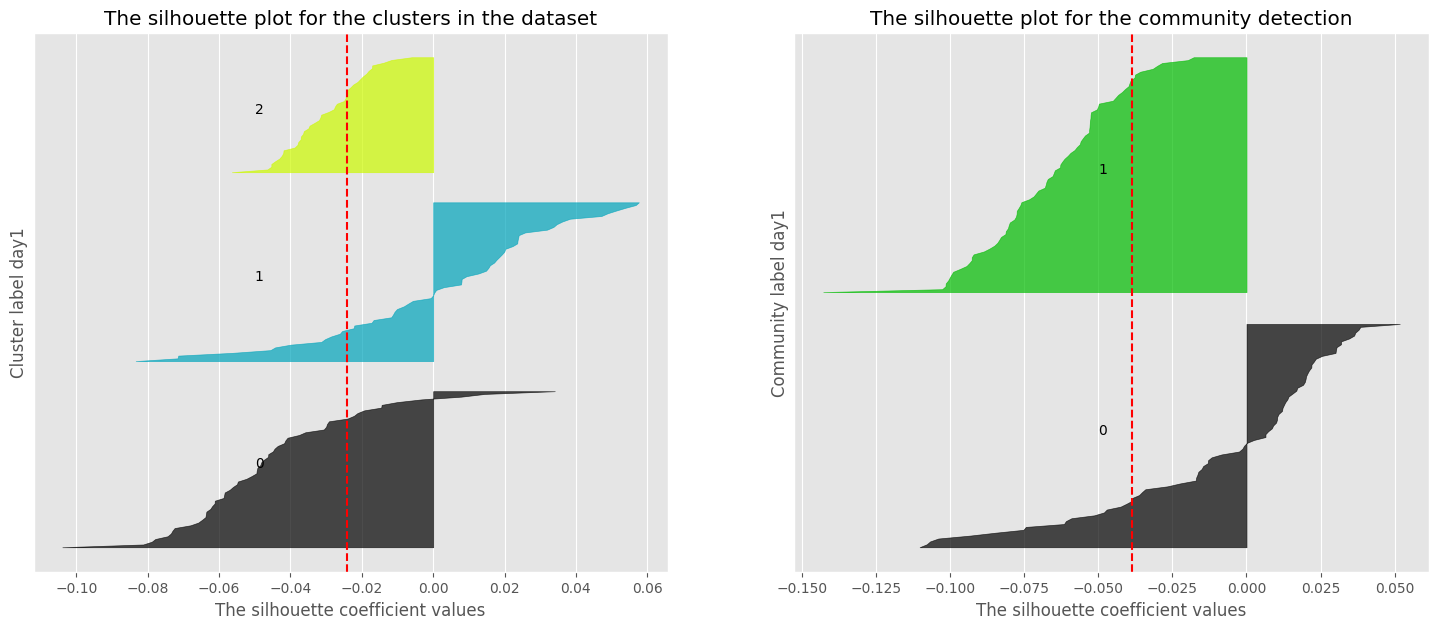

For day = day3 The average silhouette_score community is : -0.22536274705249673 The average silhouette_score dataset is : -0.054647324104488824



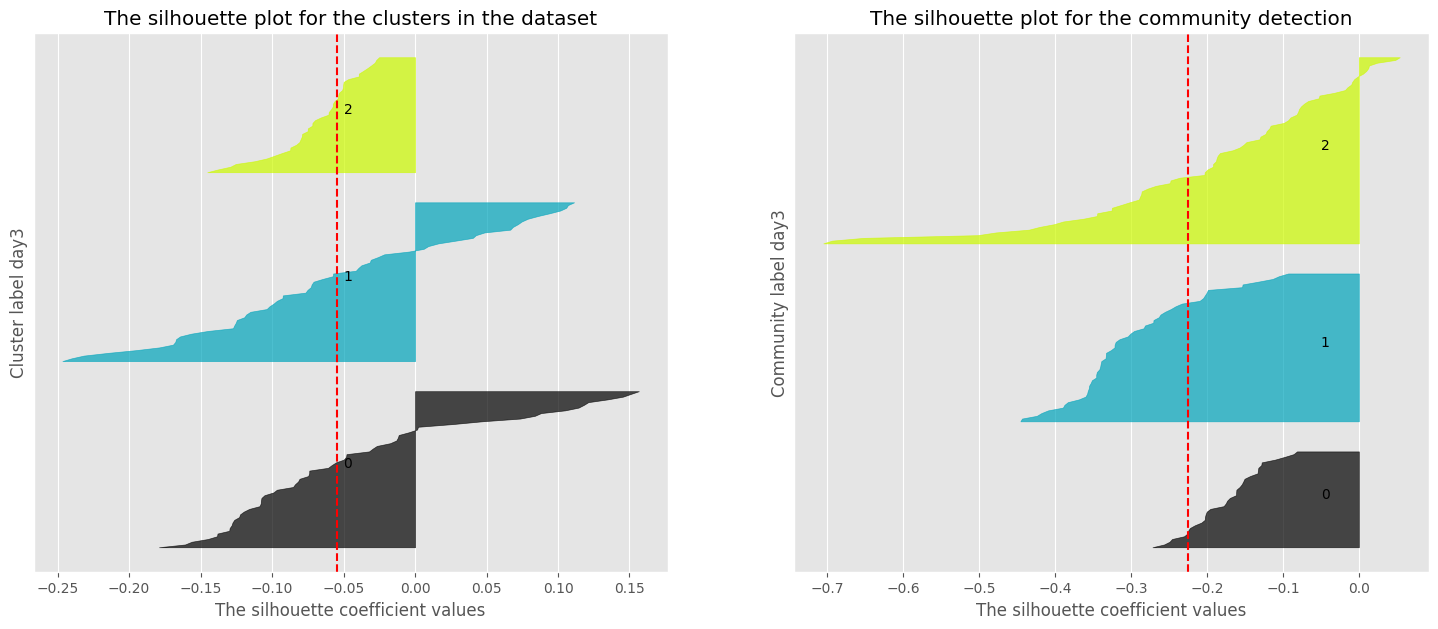

For day = day5 The average silhouette_score community is : -0.2774223958274279 The average silhouette_score dataset is : -0.08784662081536249



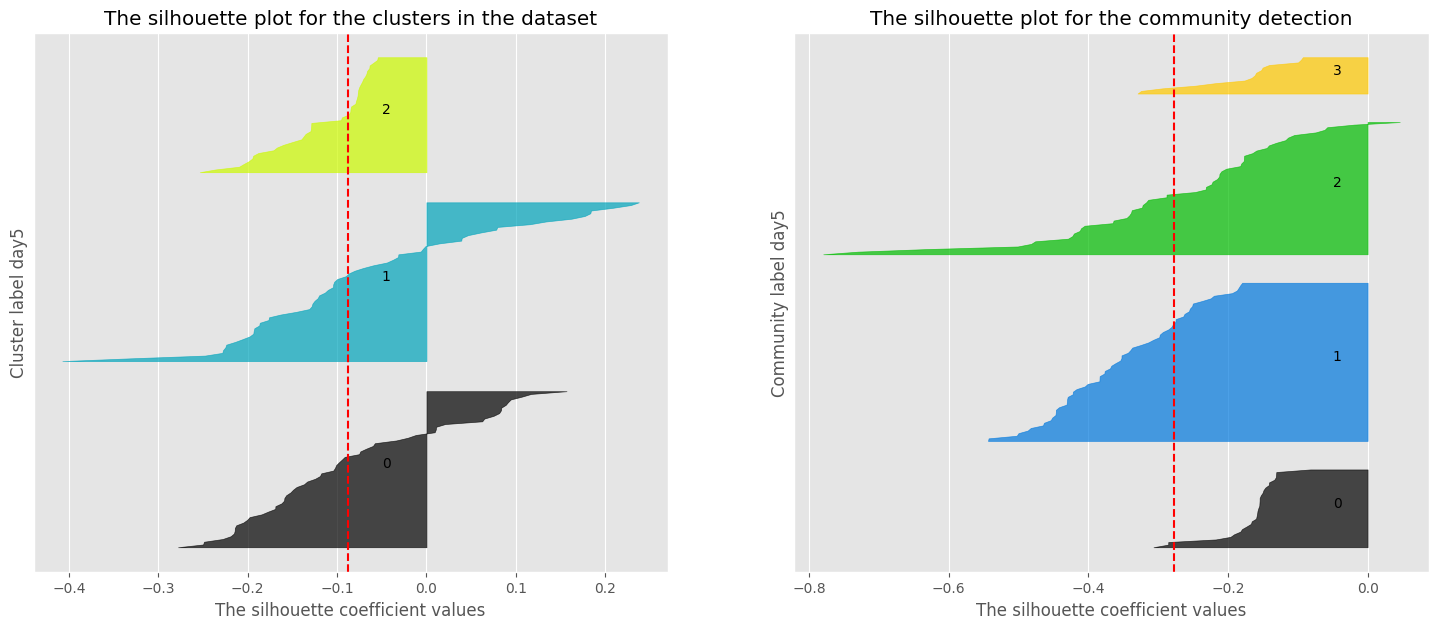

For day = day7 The average silhouette_score community is : -0.28332261868496245 The average silhouette_score dataset is : -0.10542227496528982



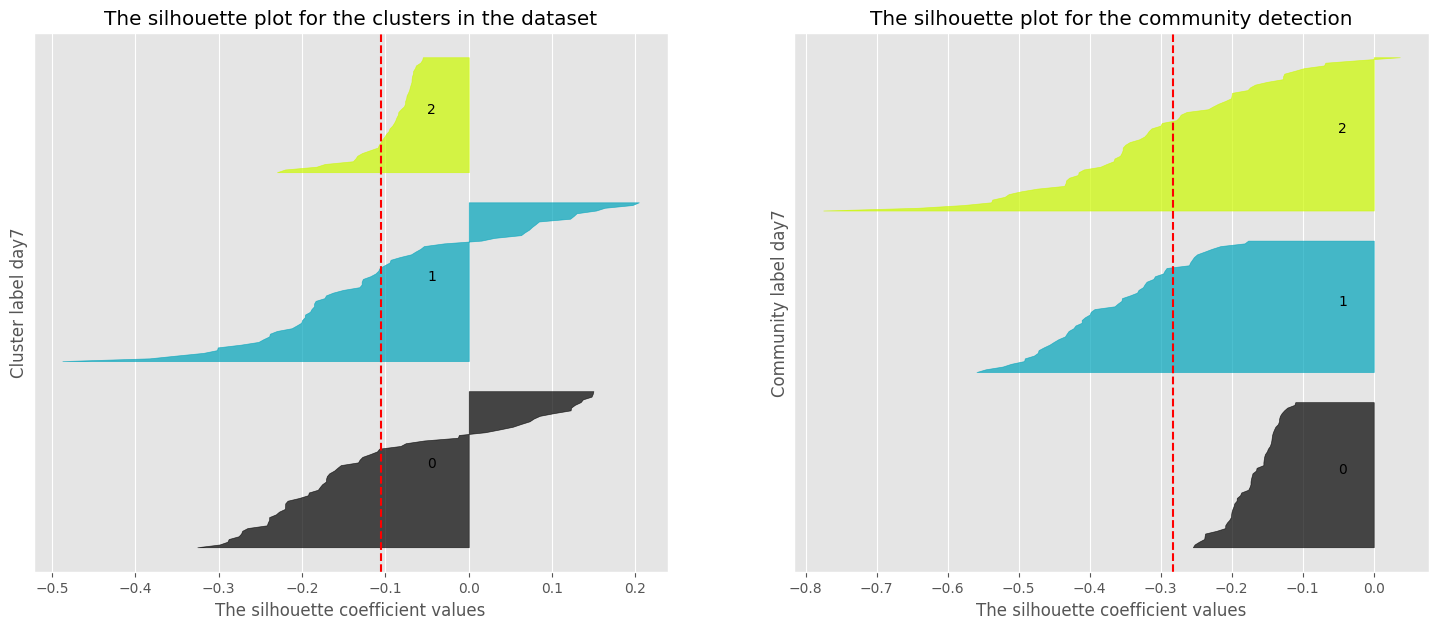

For day = day9 The average silhouette_score community is : -0.26537540897037176 The average silhouette_score dataset is : -0.2573784890584488



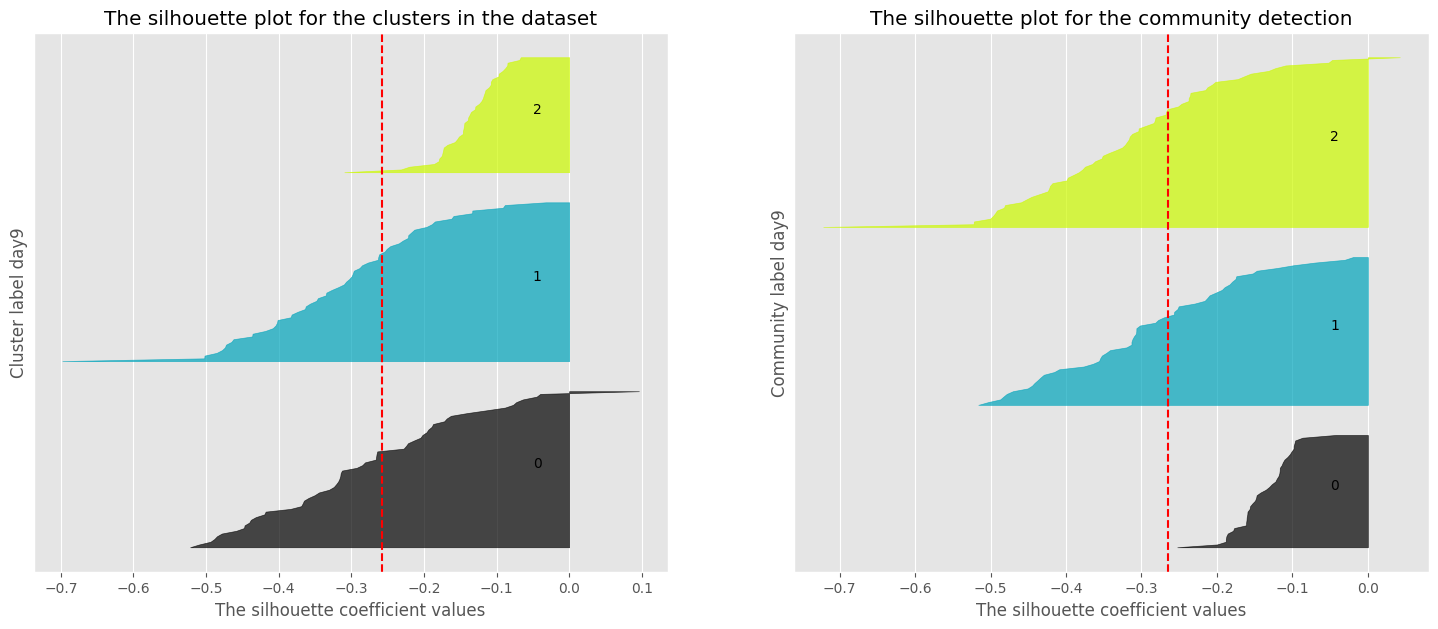

In [ ]:
def jaccard_similarity(graph):
    """Calculate the Jaccard similarity matrix for the given graph."""
    adjacency_matrix = np.array(graph.get_adjacency().data)
    num_vertices = adjacency_matrix.shape[0]
    jaccard_matrix = np.zeros((num_vertices, num_vertices))

    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j:
                intersection = np.sum(np.logical_and(adjacency_matrix[i], adjacency_matrix[j]))
                union = np.sum(np.logical_or(adjacency_matrix[i], adjacency_matrix[j]))
                if union != 0:
                    jaccard_matrix[i][j] = intersection / union
                else:
                    jaccard_matrix[i][j] = 0
            else:
                jaccard_matrix[i][j] = 1  # Similarity of a node with itself is 1

    np.fill_diagonal(jaccard_matrix, 0)  # Set diagonal elements to 0
    return jaccard_matrix

clusters = {'N': 0, 'F': 1, 'C': 2, 'Q': 0}
silhouette_scores_community = {}
silhouette_scores_label = {}

for key, partition in all_partition.items():
    cluster_labels = []
    for ant in graph.vs['id']:
        p = all_df[key][all_df[key].index == ant][period]
        if not p.empty:
            if p.iloc[0] != '':
                cluster_labels.append(clusters[p.iloc[0]])
            else:
                cluster_labels.append(0)
        else:
            cluster_labels.append(0)

    cluster_community = np.array(all_partition[key].membership)
    cluster_labels = np.array(cluster_labels)

    jaccard_matrix = jaccard_similarity(graphs_clustering[key])

    silhouette_scores_community[key] = silhouette_score(jaccard_matrix, cluster_community, metric="precomputed")
    silhouette_scores_label[key] = silhouette_score(jaccard_matrix, cluster_labels, metric="precomputed")

    print("For day =", key,
          "The average silhouette_score community is :", silhouette_scores_community[key],
          "The average silhouette_score dataset is :", silhouette_scores_label[key])
    print()

    # Compute the silhouette scores for each sample
    sample_silhouette_values_labels = silhouette_samples(jaccard_matrix, cluster_labels, metric="precomputed")
    sample_silhouette_values_community = silhouette_samples(jaccard_matrix, cluster_community, metric="precomputed")

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    y_lower = 10
    n_clusters_labels = len(np.unique(cluster_labels))

    for i in range(n_clusters_labels):
        ith_cluster_silhouette_values_labels = sample_silhouette_values_labels[cluster_labels == i]
        ith_cluster_silhouette_values_labels.sort()

        size_cluster_i = ith_cluster_silhouette_values_labels.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_labels)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_labels,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the clusters in the dataset")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel(f"Cluster label {key}")
    ax1.axvline(x=silhouette_scores_label[key], color="red", linestyle="--")
    ax1.set_yticks([])

    y_lower = 10
    n_clusters_community = len(np.unique(cluster_community))

    for i in range(n_clusters_community):
        ith_cluster_silhouette_values_community = sample_silhouette_values_community[cluster_community == i]
        ith_cluster_silhouette_values_community.sort()

        size_cluster_i = ith_cluster_silhouette_values_community.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_community)
        ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_community,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the community detection")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel(f"Community label {key}")
    ax2.axvline(x=silhouette_scores_community[key], color="red", linestyle="--")
    ax2.set_yticks([])

    plt.show()

### **k-means**

In [ ]:
s = pd.Series(Graph.es['weight'])
t = s.describe()['25%']

edge_to_remove = []

for edge in Graph.es():
  if edge['weight'] <= t:
    edge_to_remove.append(edge.index)

print("Before:", Graph.ecount())

Graph.delete_edges(edge_to_remove)

print("After:", Graph.ecount())

Before: 11139
After: 8189


In [ ]:
def cosine_kmeans(adj_matrix, k, max_iter=500_000):
    n = adj_matrix.shape[0]

    # Calcolare la similarità del coseno tra tutte le coppie di nodi
    cosine_sim_matrix = cosine_similarity(adj_matrix)

    # Inizializzare i centroidi scegliendo k nodi casualmente
    centroids_idx = random.sample(range(n), k)
    centroids = adj_matrix[centroids_idx]

    for _ in range(max_iter):
        # Assegnare i nodi al cluster con la massima similarità del coseno
        clusters = {i: [] for i in range(k)}
        for i in range(n):
            similarities = cosine_similarity([adj_matrix[i]], centroids)
            cluster_idx = np.argmax(similarities)
            clusters[cluster_idx].append(i)

        # Calcolare nuovi centroidi
        new_centroids = []
        for cluster_idx in range(k):
            if clusters[cluster_idx]:  # Se il cluster non è vuoto
                cluster_vectors = adj_matrix[clusters[cluster_idx]]
                new_centroid = np.mean(cluster_vectors, axis=0)
                new_centroid /= np.linalg.norm(
                    new_centroid
                )  # Normalizzare il nuovo centroide
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(
                    centroids[cluster_idx]
                )  # Se il cluster è vuoto, mantenere il vecchio centroide

        new_centroids = np.array(new_centroids)

        # Se i nuovi centroidi sono uguali ai vecchi, fermarsi
        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return clusters, centroids

In [ ]:
X = np.array(Graph.get_adjacency().data)
vertex = Graph.vs["id"]
k = 3
clusters, centroids = cosine_kmeans(X, k)

In [ ]:
conf_matrix = pd.DataFrame(columns = ['Q', 'C', 'F', 'N'])

for key in clusters.keys():
    cluster = clusters[key]
    row = {'Q':0, 'C':0, 'F':0, 'N':0}
    for idx in cluster:
        role = Graph.vs.find(id = vertex[idx])['group_period1']
        if role == '':
            continue
        row[role] += 1

    conf_matrix = pd.concat([conf_matrix, pd.Series(row).to_frame().T], ignore_index = True)

print(conf_matrix)

   Q   C   F   N
0  1  29   0  54
1  0  14  37   0
2  0   0  22   0


### **Community to file**

In [ ]:
def select_cluster(graph, partitions, comm_df):
  role_by_partition = []
  for partition in partitions:
    sub_graph = graph.subgraph(partition)
    cluster_ids = sub_graph.vs['id']

    roles = comm_df.loc[cluster_ids]
    dict_role_freq = Counter(roles['group_period1'])
    role_by_partition.append(max(dict_role_freq, key=dict_role_freq.get))

  return role_by_partition

In [ ]:
community_days = ['01', '03', '05', '07', '09']

for col in colonies:
  for d in community_days:
    path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{d}.graphml"
    graph_comm = ig.Graph.Read_GraphML(path)
    comm_df = pd.DataFrame.from_dict({v.index: v.attributes() for v in graph_comm.vs}, orient='index').set_index('id')[['group_period1']]
    partition = graph_comm.community_multilevel(weights='weight')
    roles = select_cluster(graph_comm, partition, comm_df)
    for i, p in enumerate(partition):
      for v in p:
        graph_comm.vs[v]['community_label'] = roles[i]
    path = f"/content/drive/MyDrive/Magistrale/Data Analytics/Progetto - Formiche/datasets/insecta-ant-colony{col}/ant_mersch_col{col}_day{d}_community.graphml"
    graph_comm.write_graphml(path)

Counter({'F': 37, '': 1, 'C': 1})
Counter({'N': 25, 'C': 23, '': 1, 'Q': 1})
Counter({'F': 16, 'C': 7, '': 1})
Counter({'F': 33, '': 2})
Counter({'C': 31, 'N': 25, 'F': 3, '': 1, 'Q': 1})
Counter({'F': 17})
Counter({'F': 27, '': 1})
Counter({'C': 26, 'N': 25, 'F': 1, '': 1, 'Q': 1})
Counter({'F': 25, 'C': 5, '': 1})
Counter({'F': 38, '': 1, 'C': 1})
Counter({'N': 25, 'C': 25, '': 1, 'Q': 1})
Counter({'F': 15, 'C': 5, '': 1})
Counter({'F': 44, 'C': 2, '': 1})
Counter({'N': 25, 'C': 24, 'F': 5, '': 2, 'Q': 1})
Counter({'C': 5, 'F': 4})
Counter({'C': 11, 'N': 11, '': 1})
Counter({'N': 59, '': 2, 'C': 1, 'Q': 1})
Counter({'C': 23, 'F': 22})
Counter({'C': 12, 'N': 8})
Counter({'N': 60, '': 3, 'Q': 1})
Counter({'C': 23, 'F': 22, 'N': 2})
Counter({'C': 31, 'F': 22, 'N': 1})
Counter({'N': 59, '': 3, 'Q': 1, 'C': 1})
Counter({'N': 10, 'C': 3})
Counter({'C': 21, 'N': 11})
Counter({'N': 57, '': 3, 'Q': 1})
Counter({'F': 22, 'C': 14, 'N': 2})
Counter({'C': 17, 'N': 7})
Counter({'N': 46, '': 3, 'C'